## Project Title:            Algerian Forest Project
### Technology:              Machine Learning Technology
### Domain:                  Agriculture
### Project Difficulty Level: Intermediate

> Problem Statement:

The Goal is to predict the temperature of the forest. This is basically a Regression problem where the forest has recorded from June 2012 to September 2012.

> Dataset to downloaded from the below link:

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

In [981]:
# Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None) # to disply all columns

In [982]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is BE09-1442

 Directory of d:\Data Scientist\1_iNeuron\02 Full Stack Data Science ineuron\03 Machine Learning\Algerian Forest\EDA-on-Algerian-Forest-Fires-Dataset

23-05-2023  20:09    <DIR>          .
22-05-2023  16:24    <DIR>          ..
19-05-2023  12:08            14,759 Algerian_forest_fires_dataset_UPDATE.csv
19-05-2023  14:40           137,819 Cleaning_Split.ipynb
19-05-2023  15:50           707,627 Data Preparation_test.ipynb
24-05-2023  17:32         3,668,992 Data Preparation_train.ipynb
24-05-2023  12:47           565,158 Exploratoty Data Analysis.ipynb
24-05-2023  14:35         1,126,730 Feature Selection.ipynb
19-05-2023  12:08            35,823 LICENSE
19-05-2023  15:50             8,131 prepared_data_test.csv
19-05-2023  15:44            16,596 prepared_data_train.csv
22-05-2023  16:22           126,812 prepared_tranformed_data_train.csv
23-05-2023  20:09           103,364 prepared_tranformed_nofs_data_train.csv
19

In [983]:
dataset = pd.read_csv("train.csv")
# Finding the shape of dataset
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in the dataset\n")
dataset.head()

There are 162 rows and 15 columns in the dataset



day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0   11      7  2012           33  76  14   0.0  81.1   8.1  18.7  2.6   8.1   
1   14      6  2012           30  78  20   0.5  59.0   4.6   7.8  1.0   4.4   
2    4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
3   16      6  2012           29  87  15   0.4  47.4   4.2   8.0  0.2   4.1   
4   25      6  2012           31  64  15   0.0  86.7  14.2  63.8  5.7  18.3   

   FWI  Classes  Region  
0  2.2  notfire     0.0  
1  0.4  notfire     0.0  
2  0.0  notfire     0.0  
3  0.1  notfire     1.0  
4  8.4     fire     0.0

In [984]:
# Finding the information about the dataset:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          162 non-null    int64  
 1   month        162 non-null    int64  
 2   year         162 non-null    int64  
 3   Temperature  162 non-null    int64  
 4   RH           162 non-null    int64  
 5   Ws           162 non-null    int64  
 6   Rain         162 non-null    float64
 7   FFMC         162 non-null    float64
 8   DMC          162 non-null    float64
 9   DC           162 non-null    float64
 10  ISI          162 non-null    float64
 11  BUI          162 non-null    float64
 12  FWI          162 non-null    float64
 13  Classes      162 non-null    object 
 14  Region       162 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 19.1+ KB


In [986]:
dataset.describe(include = 'all').T

count unique   top freq       mean        std     min     25%  \
day          162.0    NaN   NaN  NaN  16.296296   8.934467     1.0     9.0   
month        162.0    NaN   NaN  NaN   7.450617   1.098008     6.0    6.25   
year         162.0    NaN   NaN  NaN     2012.0        0.0  2012.0  2012.0   
Temperature  162.0    NaN   NaN  NaN  32.234568   3.737577    22.0    30.0   
RH           162.0    NaN   NaN  NaN  61.462963  15.164169    21.0   51.25   
Ws           162.0    NaN   NaN  NaN  15.450617   2.895815     8.0    14.0   
Rain         162.0    NaN   NaN  NaN   0.764198   2.184861     0.0     0.0   
FFMC         162.0    NaN   NaN  NaN   78.43642  13.955763    28.6    72.9   
DMC          162.0    NaN   NaN  NaN       15.1  12.575165     0.7    5.85   
DC           162.0    NaN   NaN  NaN  50.557407  47.780233     6.9    15.2   
ISI          162.0    NaN   NaN  NaN   4.917901   4.298547     0.0   1.425   
BUI          162.0    NaN   NaN  NaN  17.224074  14.492092     1.1    6.05   
FWI          162.0    NaN   NaN  NaN   7.305556   7.530289     0.0     0.7   
Classes        162      2  fire   91        NaN        NaN     NaN     NaN   
Region       162.0    NaN   NaN  NaN        0.5    0.50155     0.0     0.0   

                50%     75%     max  
day            17.0    24.0    31.0  
month           7.0     8.0     9.0  
year         2012.0  2012.0  2012.0  
Temperature    32.0    35.0    42.0  
RH             62.0    74.5    90.0  
Ws             15.0    17.0    29.0  
Rain            0.0   0.475    16.8  
FFMC           83.9  88.525    96.0  
DMC           11.75    20.9    65.9  
DC            34.95   67.15   210.4  
ISI             3.8   7.475    19.0  
BUI            13.0    22.4    68.0  
FWI            5.05   12.15    31.1  
Classes         NaN     NaN     NaN  
Region          0.5     1.0     1.0

In [989]:
dataset.nunique()

day             31
month            4
year             1
Temperature     19
RH              57
Ws              17
Rain            30
FFMC           124
DMC            125
DC             140
ISI             90
BUI            127
FWI            102
Classes          2
Region           2
dtype: int64

In [990]:
unique_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())==len(dataset)]
print("Unique feature Count {} out of {} features".format(len(unique_feature),len(dataset.columns)))
print(unique_feature)
# seperating the Numerical and Categorical Variables:
numerical_features = [fea for fea in dataset.columns if dataset[fea].dtype != 'O']
print("\n Numerical feature Count {}".format(len(numerical_features)))
print(numerical_features)
unique_feature=[feature for feature in numerical_features if len(dataset[feature].unique())==len(dataset)]
print("\n Unique feature Count {} out of {} features".format(len(unique_feature),len(numerical_features)))
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<5 and feature not in unique_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+unique_feature]
print("\n Continuous feature Count {} out of {} features".format(len(continuous_feature),len(numerical_features)))
print(continuous_feature)
print("\n Discrete Variables Count: {} out of {} features".format(len(discrete_feature),len(numerical_features)))
print(discrete_feature)
data = dataset.copy()
pd.DataFrame(list(zip(discrete_feature,[len(data[feature].unique()) for feature in discrete_feature], [data[str(feature)].unique() for feature in discrete_feature])), columns=['Discrete Features','No of Unique Values', 'Unique Values'])



Unique feature Count 0 out of 15 features
[]

 Numerical feature Count 14
['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']

 Unique feature Count 0 out of 14 features

 Continuous feature Count 11 out of 14 features
['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

 Discrete Variables Count: 3 out of 14 features
['month', 'year', 'Region']


Discrete Features  No of Unique Values Unique Values
0             month                    4  [7, 6, 9, 8]
1              year                    1        [2012]
2            Region                    2    [0.0, 1.0]

In [991]:
categorical_features = [fea for fea in dataset.columns if dataset[fea].dtype == 'O']
print("Categorical feature Count {}".format(len(categorical_features)))
print(categorical_features)
data = dataset.copy()
pd.DataFrame(list(zip(categorical_features,[len(data[feature].unique()) for feature in categorical_features], [data[str(feature)].unique() for feature in categorical_features])), columns=['Categorical Features','No. of Categories', 'Categories'])

Categorical feature Count 1
['Classes']


Categorical Features  No. of Categories       Categories
0              Classes                  2  [notfire, fire]

In [992]:
[data[str(feature)].unique() for feature in categorical_features]


[array(['notfire', 'fire'], dtype=object)]

In [993]:
data.describe().T

count         mean        std     min       25%      50%  \
day          162.0    16.296296   8.934467     1.0     9.000    17.00   
month        162.0     7.450617   1.098008     6.0     6.250     7.00   
year         162.0  2012.000000   0.000000  2012.0  2012.000  2012.00   
Temperature  162.0    32.234568   3.737577    22.0    30.000    32.00   
RH           162.0    61.462963  15.164169    21.0    51.250    62.00   
Ws           162.0    15.450617   2.895815     8.0    14.000    15.00   
Rain         162.0     0.764198   2.184861     0.0     0.000     0.00   
FFMC         162.0    78.436420  13.955763    28.6    72.900    83.90   
DMC          162.0    15.100000  12.575165     0.7     5.850    11.75   
DC           162.0    50.557407  47.780233     6.9    15.200    34.95   
ISI          162.0     4.917901   4.298547     0.0     1.425     3.80   
BUI          162.0    17.224074  14.492092     1.1     6.050    13.00   
FWI          162.0     7.305556   7.530289     0.0     0.700     5.05   
Region       162.0     0.500000   0.501550     0.0     0.000     0.50   

                  75%     max  
day            24.000    31.0  
month           8.000     9.0  
year         2012.000  2012.0  
Temperature    35.000    42.0  
RH             74.500    90.0  
Ws             17.000    29.0  
Rain            0.475    16.8  
FFMC           88.525    96.0  
DMC            20.900    65.9  
DC             67.150   210.4  
ISI             7.475    19.0  
BUI            22.400    68.0  
FWI            12.150    31.1  
Region          1.000     1.0

### 1.6 Info about dataset and its attributes

1. The dataset includes 243 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for Bejaia region and 121 for Sidi Bel-abbes region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (class)
5. The 243 instances have been classified into fire (137 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

# Checking the correlation between features and Target feature

In [994]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [995]:
data.corr()['Temperature'].sort_values(ascending=True)

RH            -0.640282
Rain          -0.355614
Ws            -0.343245
month         -0.053159
day            0.069888
Region         0.265069
DC             0.357109
BUI            0.446710
DMC            0.476180
FWI            0.574131
ISI            0.609251
FFMC           0.681888
Temperature    1.000000
year                NaN
Name: Temperature, dtype: float64

In [996]:
correlated_features = ['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
pd.DataFrame(list(zip(correlated_features,[len(data[feature].unique()) for feature in correlated_features], [data[str(feature)].unique() for feature in correlated_features])), columns=['Correlated Features','No. of Categories', 'Categories'])


Correlated Features  No. of Categories  \
0                  RH                 57   
1                  Ws                 17   
2                Rain                 30   
3                FFMC                124   
4                 DMC                125   
5                  DC                140   
6                 ISI                 90   
7                 BUI                127   
8                 FWI                102   
9             Classes                  2   

                                          Categories  
0  [76, 78, 89, 87, 64, 68, 58, 48, 52, 60, 80, 5...  
1  [14, 20, 13, 15, 19, 12, 17, 16, 18, 10, 22, 1...  
2  [0.0, 0.5, 2.5, 0.4, 1.0, 4.1, 0.2, 0.1, 1.3, ...  
3  [81.1, 59.0, 28.6, 47.4, 86.7, 59.9, 66.1, 87....  
4  [8.1, 4.6, 1.3, 4.2, 14.2, 2.5, 4.0, 31.9, 22....  
5  [18.7, 7.8, 6.9, 8.0, 63.8, 8.6, 8.4, 145.7, 1...  
6  [2.6, 1.0, 0.0, 0.2, 5.7, 1.1, 6.8, 8.7, 2.0, ...  
7  [8.1, 4.4, 1.7, 4.1, 18.3, 2.9, 3.9, 41.2, 29....  
8  [2.2, 0.4, 0.0, 0.1, 8.4, 15.7, 15.3, 0.8, 0.9...  
9                                    [notfire, fire]

In [997]:
data[correlated_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RH       162 non-null    int64  
 1   Ws       162 non-null    int64  
 2   Rain     162 non-null    float64
 3   FFMC     162 non-null    float64
 4   DMC      162 non-null    float64
 5   DC       162 non-null    float64
 6   ISI      162 non-null    float64
 7   BUI      162 non-null    float64
 8   FWI      162 non-null    float64
 9   Classes  162 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 12.8+ KB


# Checking For Outliers in the dataset:
## Identifying outliers with visualization
1. Using Scatterplot
2. Using BoxPlot
3. Using Histogram

## 1. Visualizing Scatterplot of features which are correlated with Target Feature

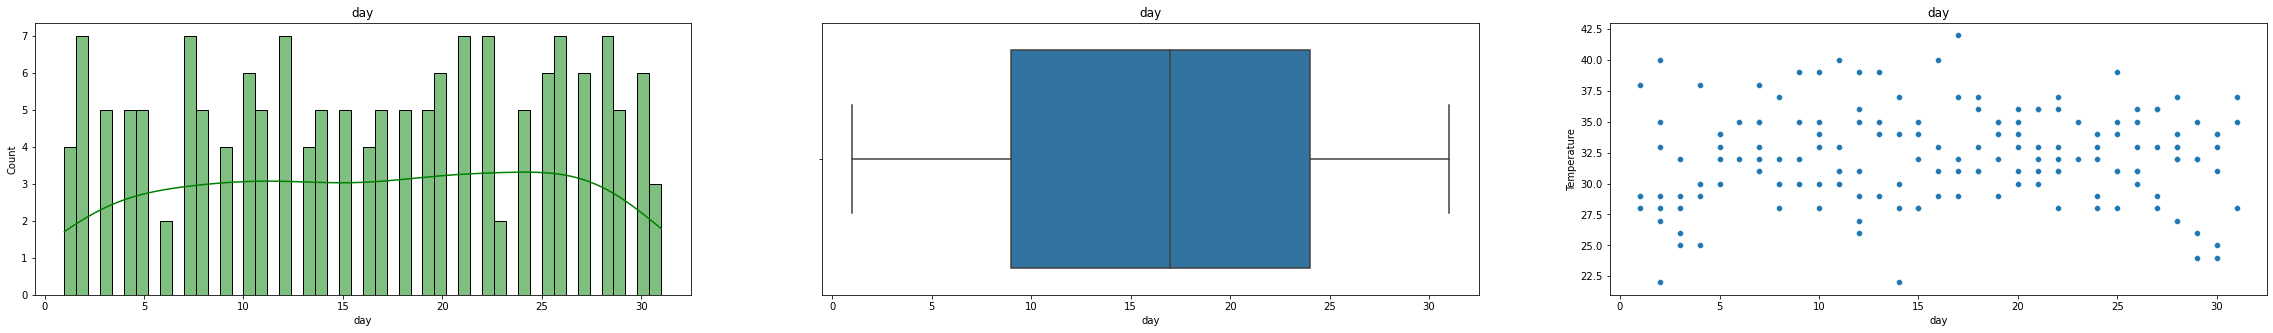

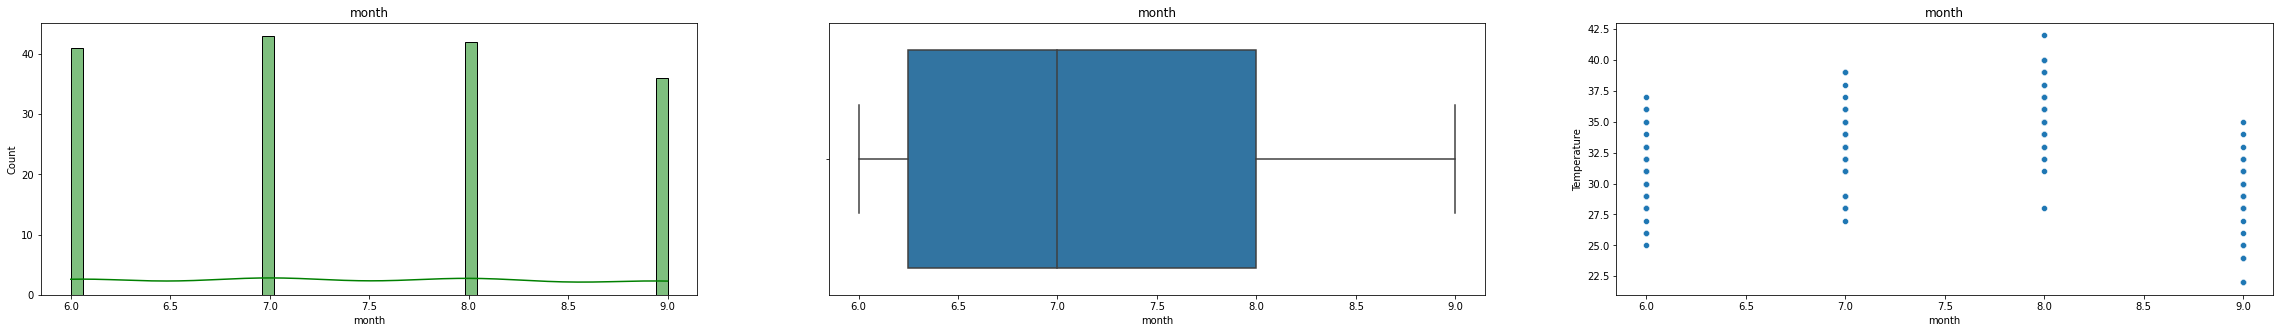

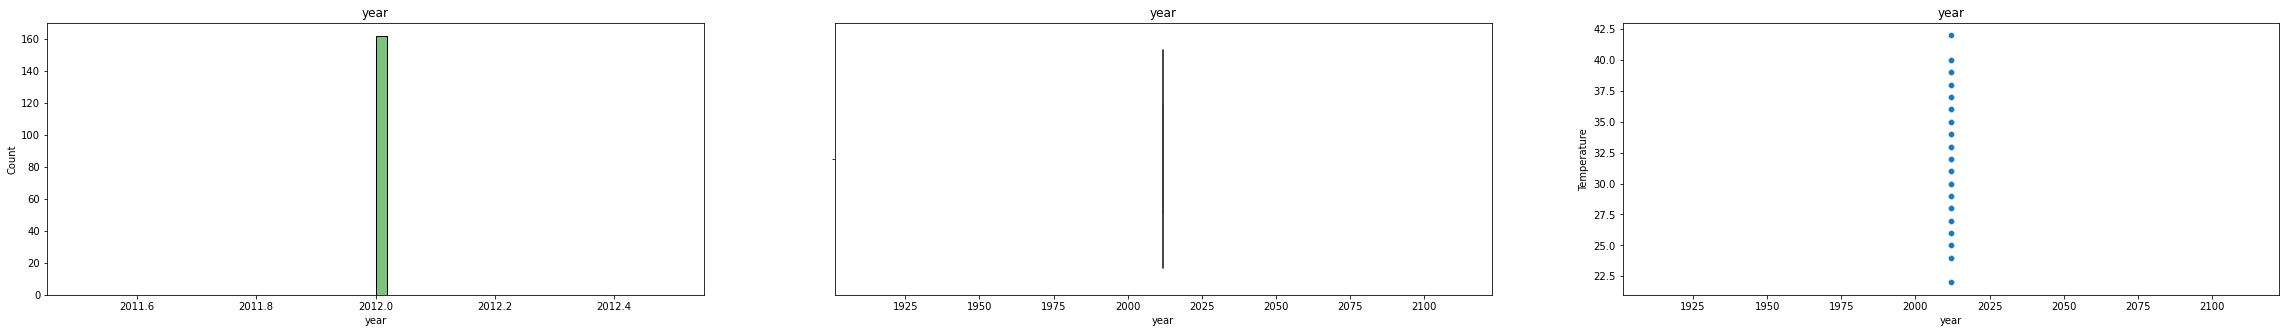

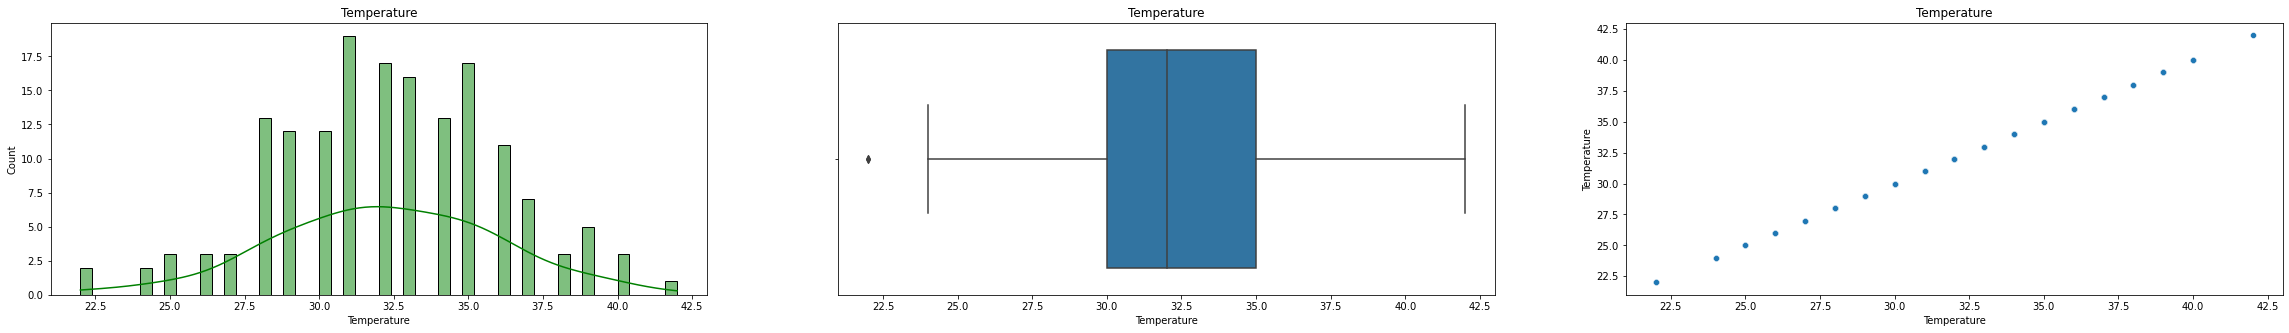

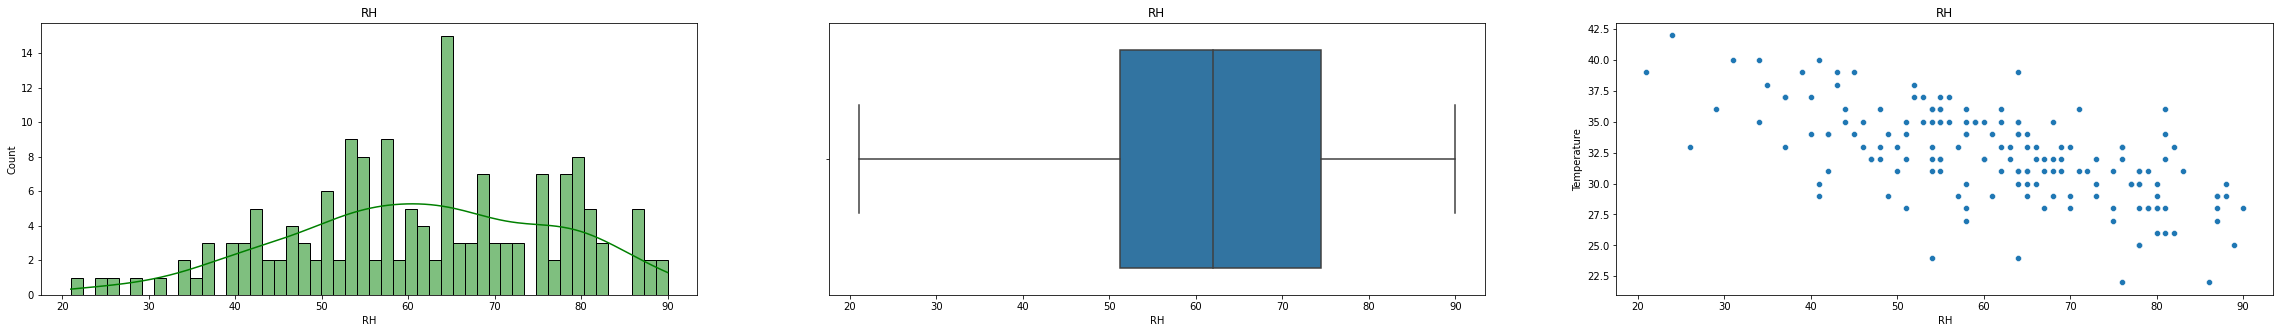

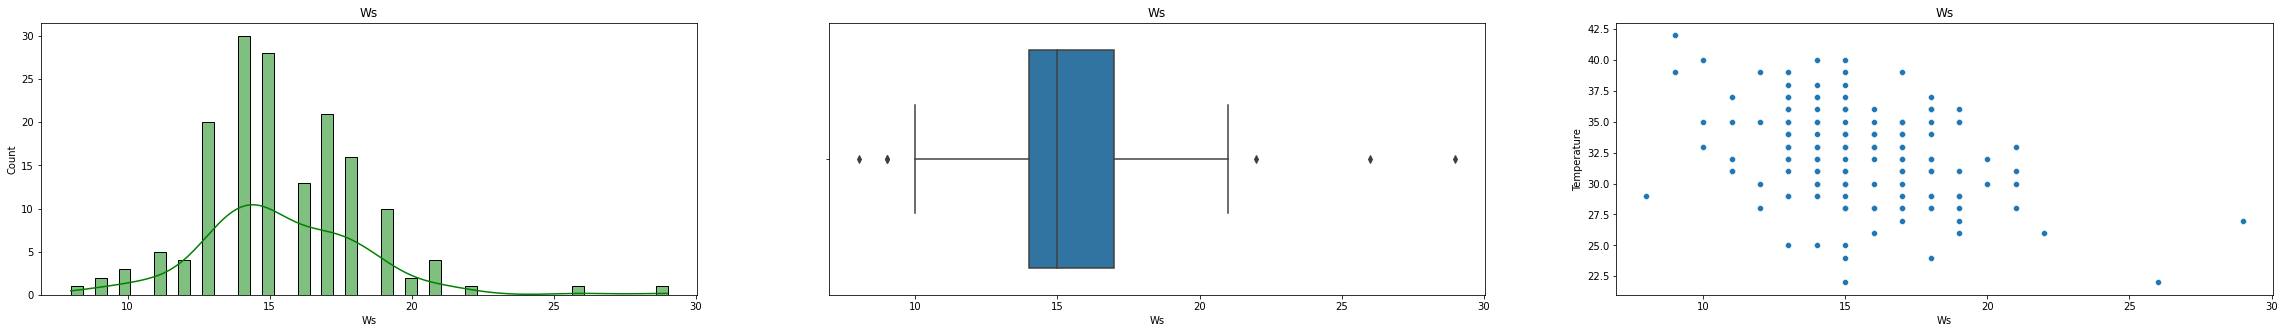

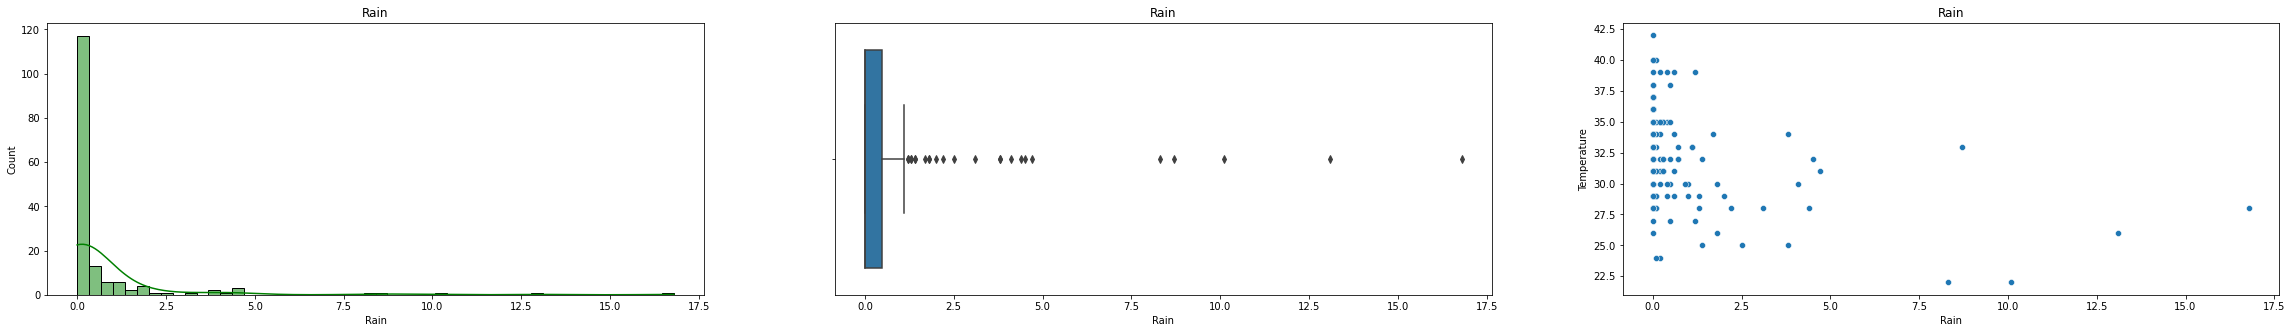

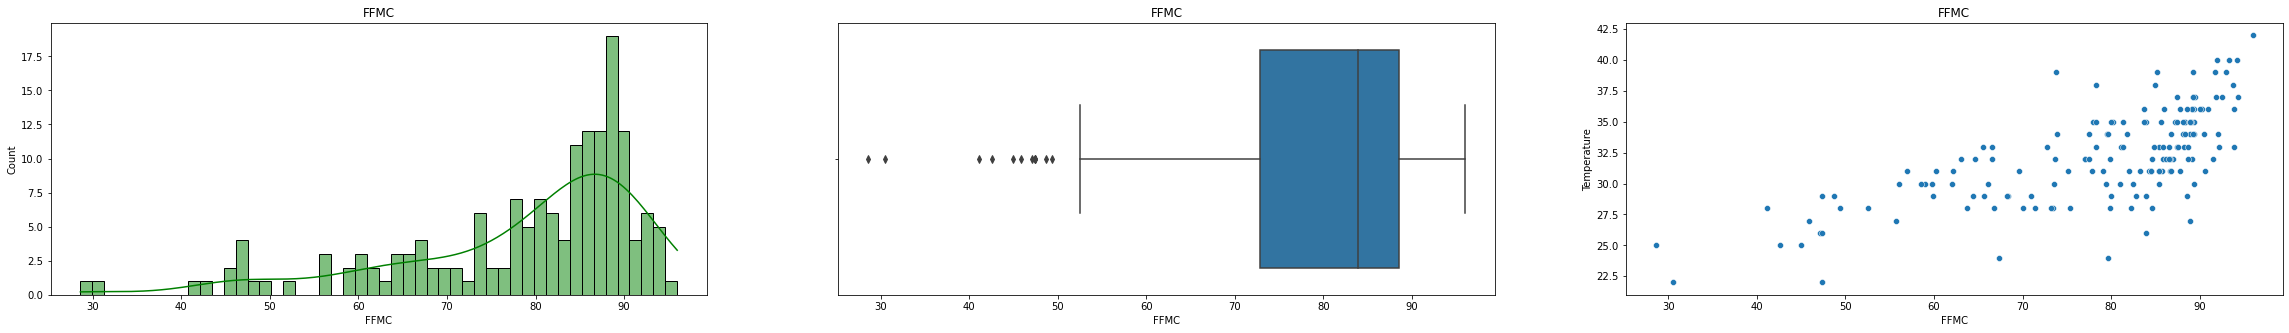

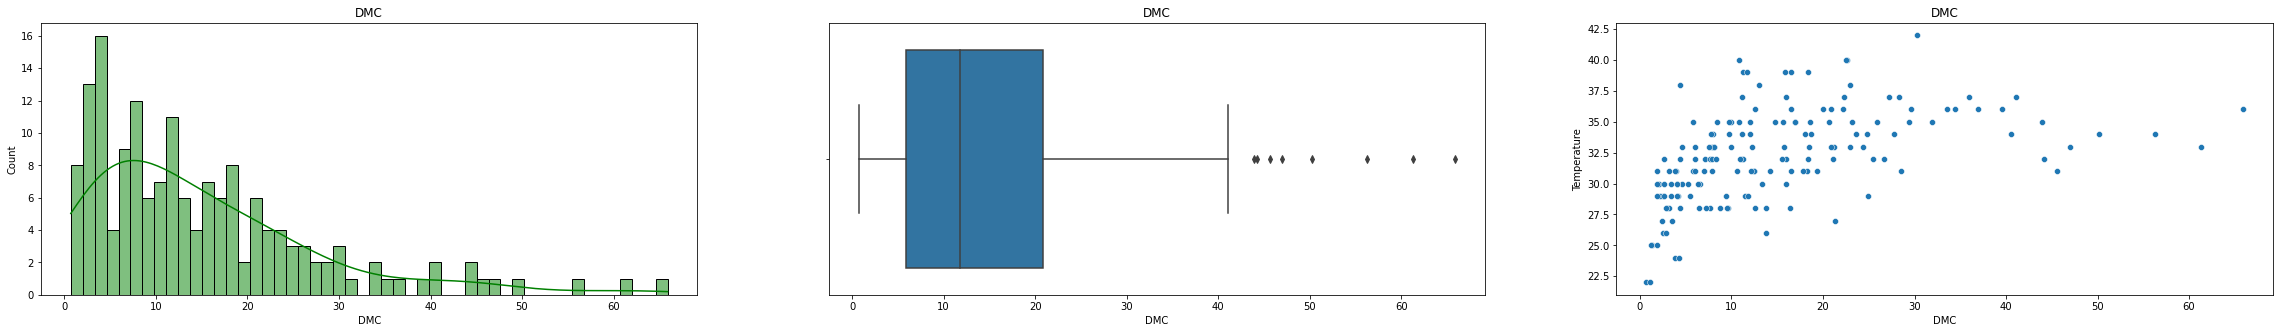

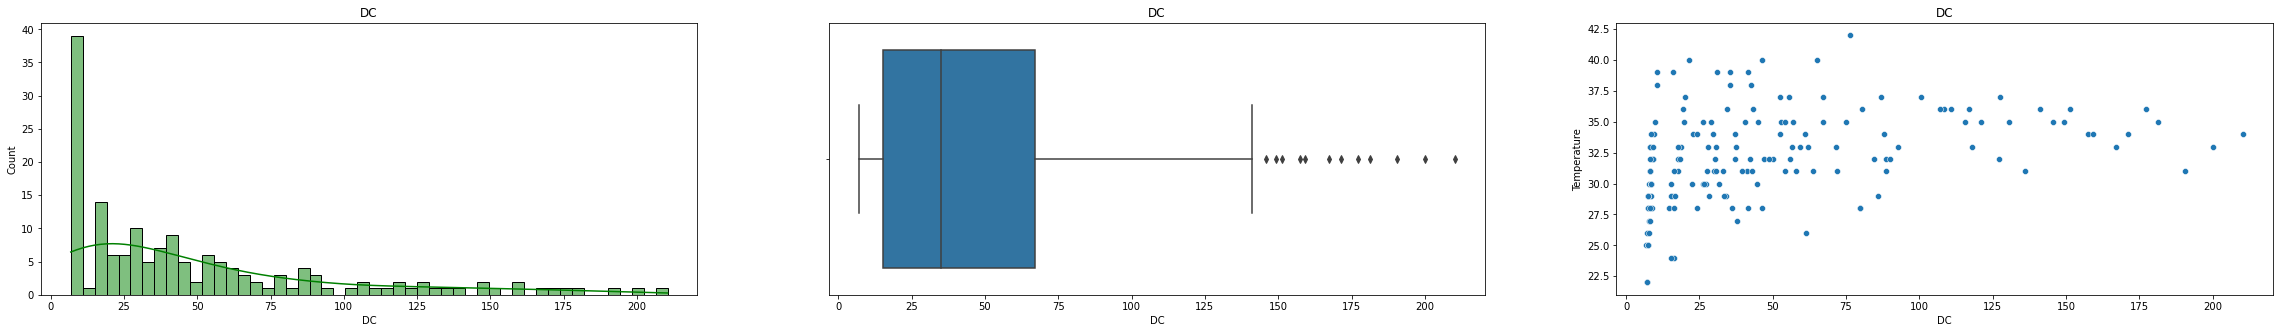

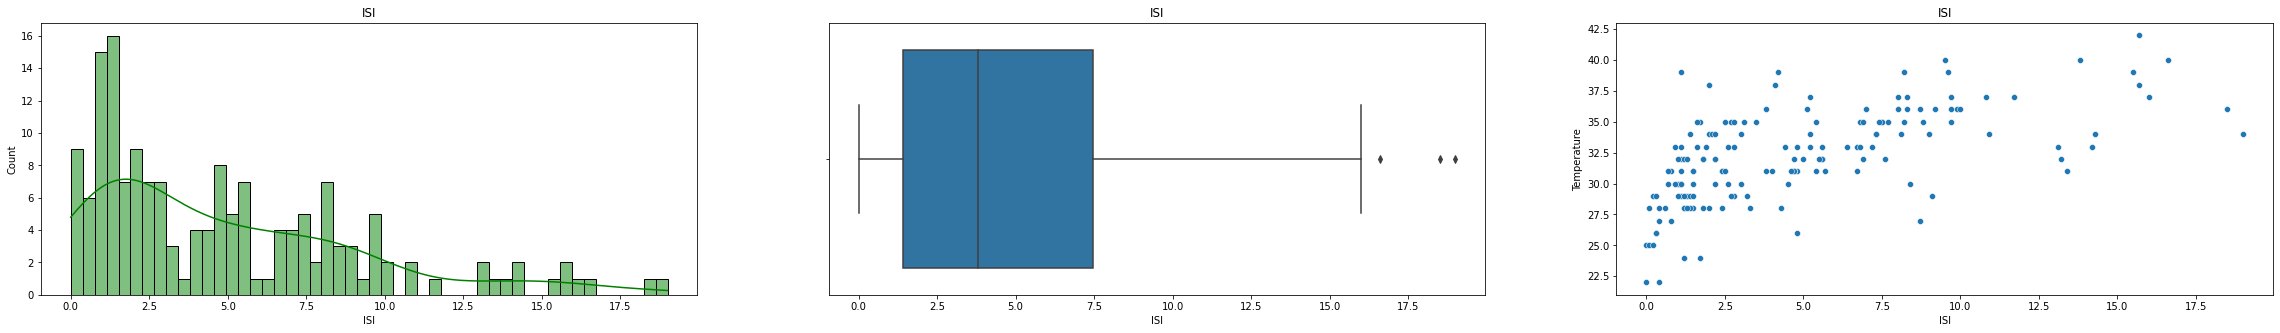

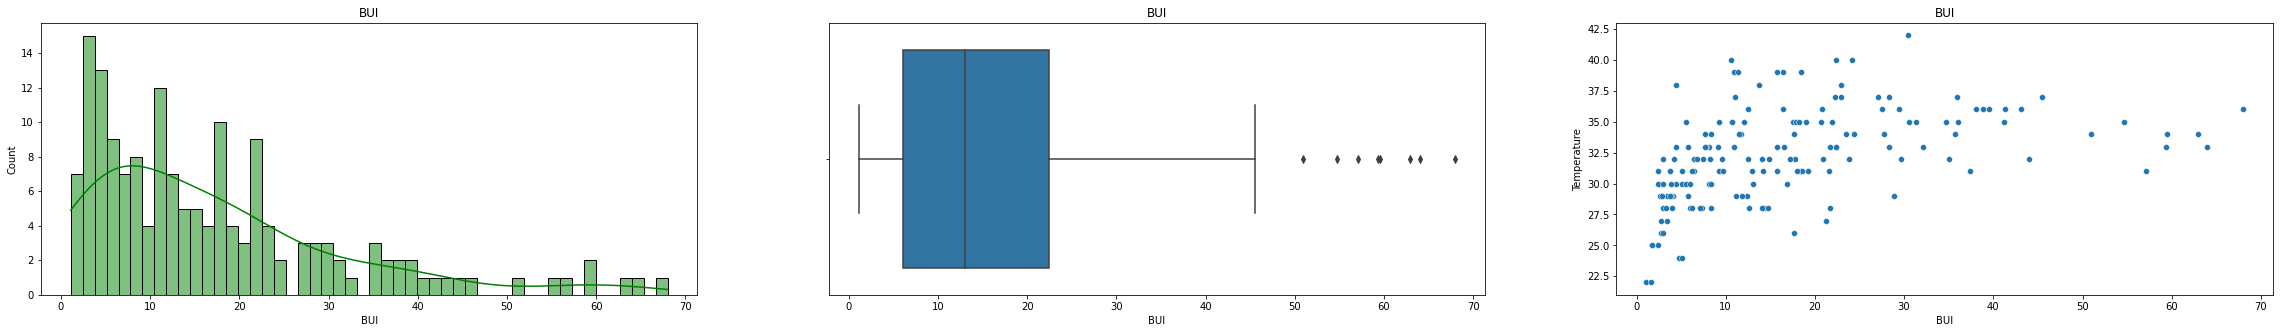

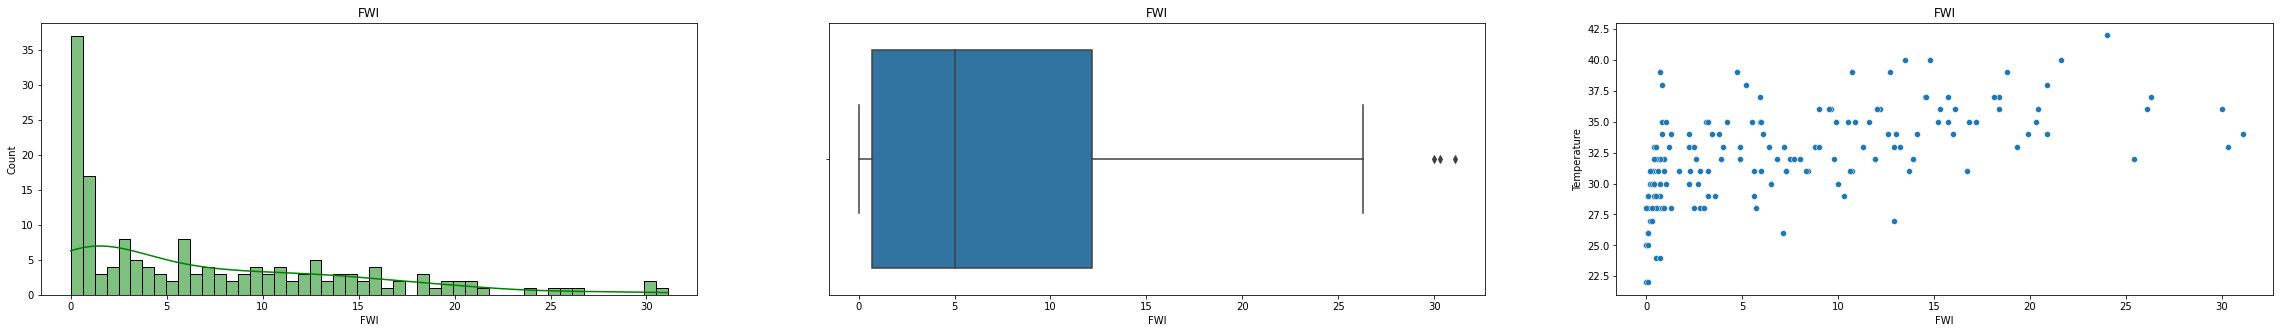

TypeError: Horizontal orientation requires numeric `x` variable.

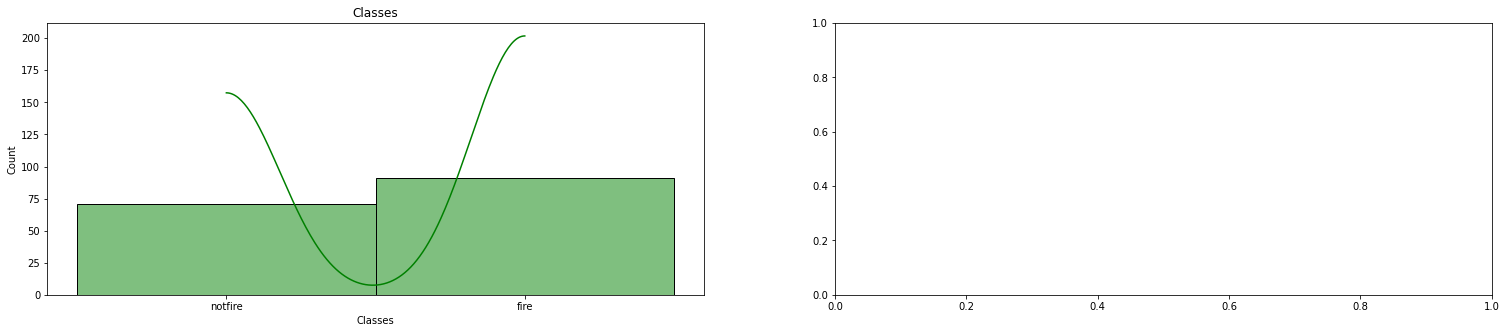

In [998]:
# Compairing plots
def create_comparison_plot(df,col1):
    '''
    This function compairs the distribution of the features with or without outliers.
    '''
    plt.figure(figsize=(40,5))
    plt.subplot(1,3,1)
    sns.histplot(df[col1], bins=50, kde=True,color='g')
    plt.title(col1,loc='center')

    plt.subplot(1,3,2)
    sns.boxplot(df[col1])
    plt.title(col1)

    plt.subplot(1,3,3)
    sns.scatterplot(x=data[col1], y = data['Temperature'])
    plt.title(col1)



    plt.show()



for col in data.columns:
    create_comparison_plot(df = data,col1= col)


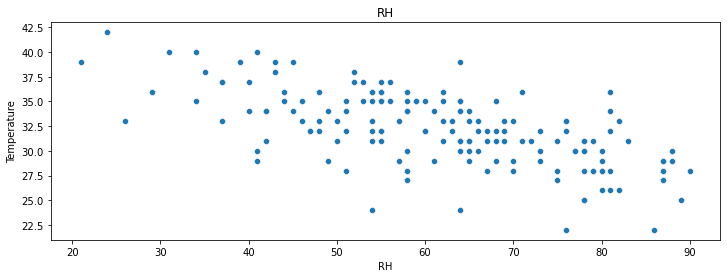

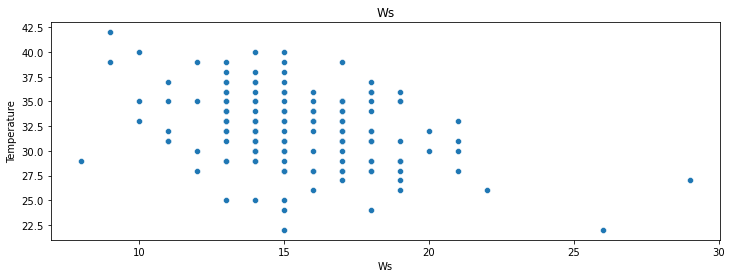

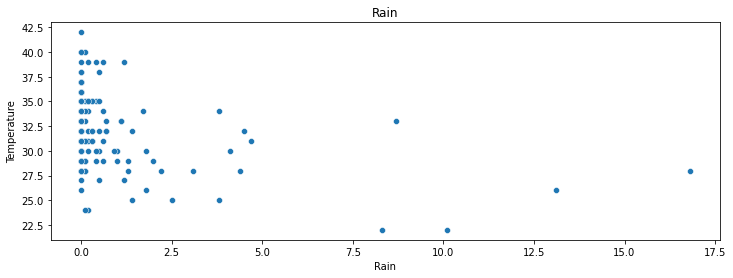

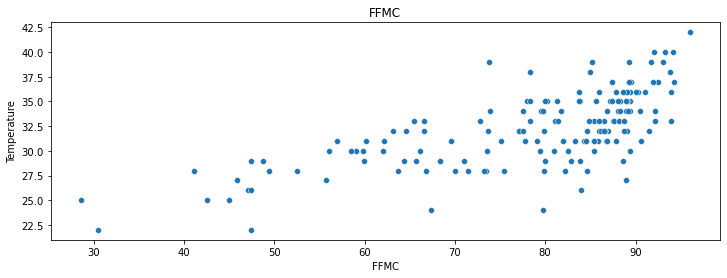

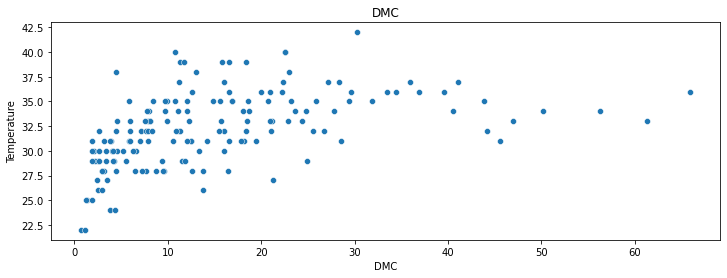

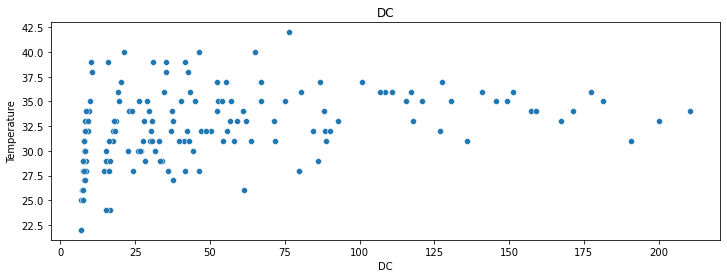

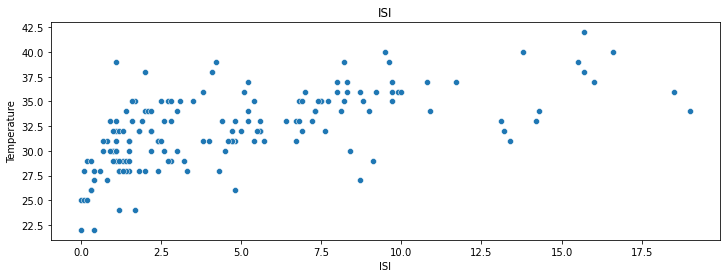

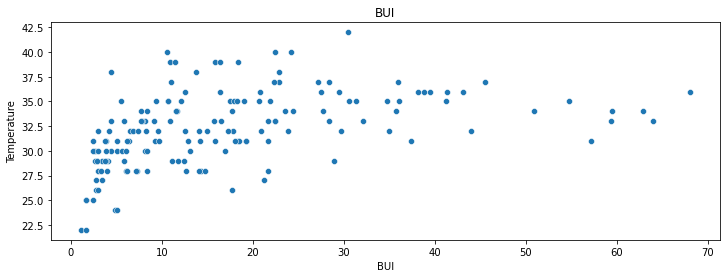

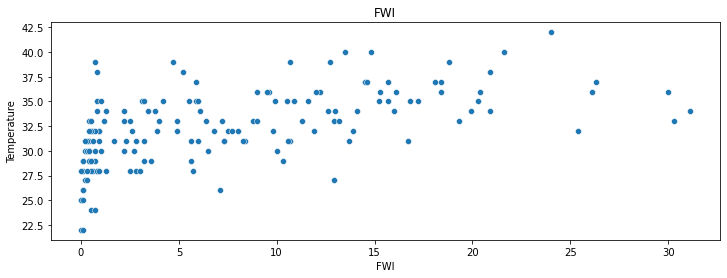

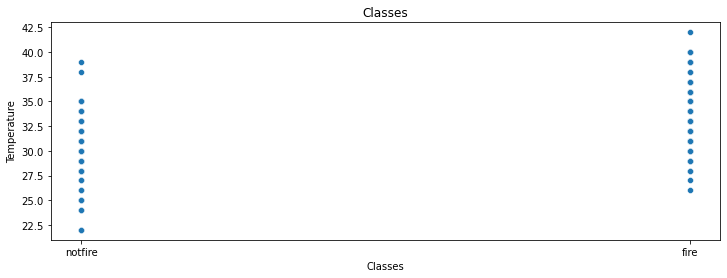

In [838]:
for col in correlated_features:
    plt.figure(figsize=(12,4))
    sns.scatterplot(x=data[col], y = data['Temperature'])
    plt.title(col)

### Observation:
- 'RH': Linear with Target
- 'Ws': Linear with Target
- 'Rain': Non-Linear with Target
- 'FFMC': Linear with Target
- 'DMC': Linear with Target
- 'DC': Linear with Target
- 'ISI': Linear with Target
- 'BUI': Linear with Target
- 'FWI': Linear with Target
- 'Classes'

## 2. Visualizing Boxplot of features which are correlated with Target Feature

TypeError: Horizontal orientation requires numeric `x` variable.

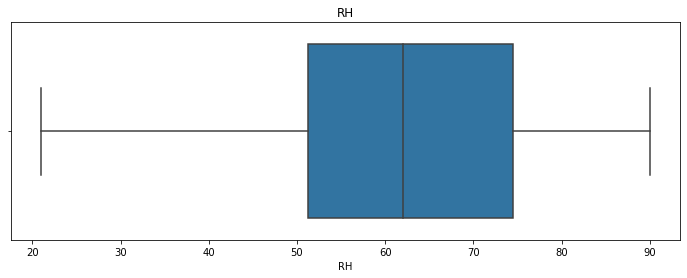

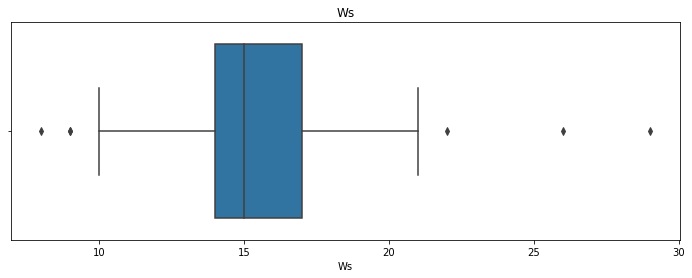

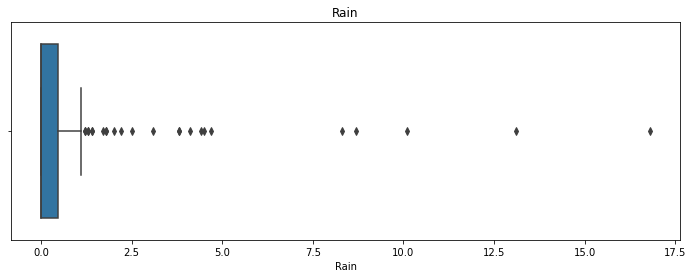

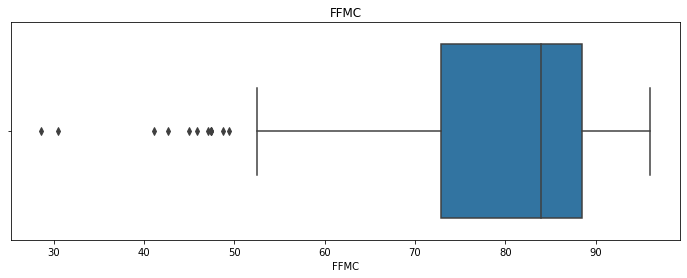

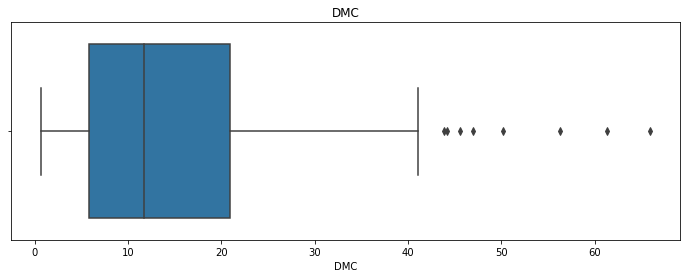

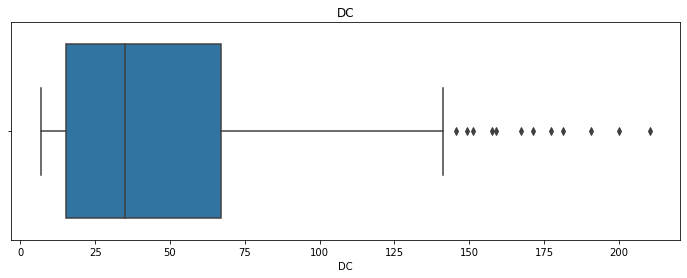

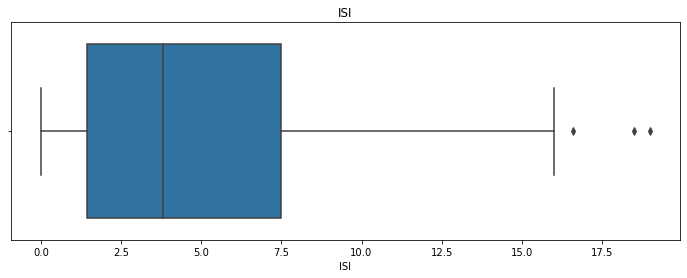

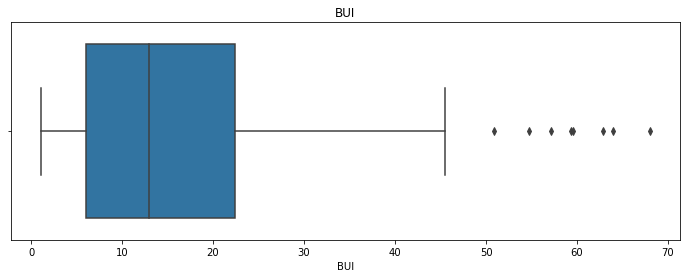

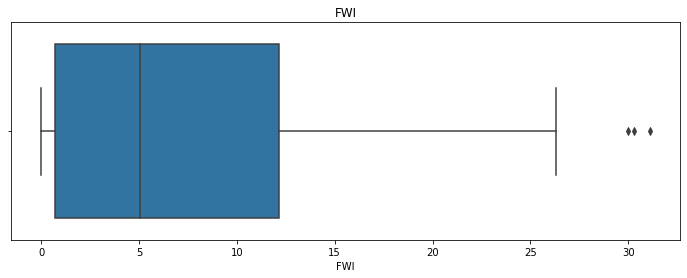

<Figure size 864x288 with 0 Axes>

In [839]:
### excluding 'day', 'month','year', 'Region'.

for col in correlated_features:
    plt.figure(figsize=(12,4))
    sns.boxplot(data = data, x=col)
    plt.title(col)

### Observation:
- 'RH': Linear with Target, No Outliers
- 'Ws': Linear with Target, Outliers in Bothside,
- 'Rain': Non-Linear with Target, Highly Right Skewed-Outliers in Right,
- 'FFMC': Linear with Target, Outliers in LEFT,
- 'DMC': Linear with Target, Outliers in Right,
- 'DC': Linear with Target, Outliers in Right,
- 'ISI': Linear with Target, Outliers in Right,
- 'BUI': Linear with Target, Outliers in Right,
- 'FWI': Linear with Target, Outliers in Right,

## 3. Visualizing Histogramplot of features which are correlated with Target Feature

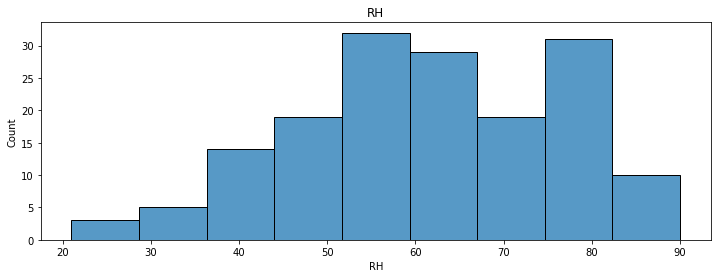

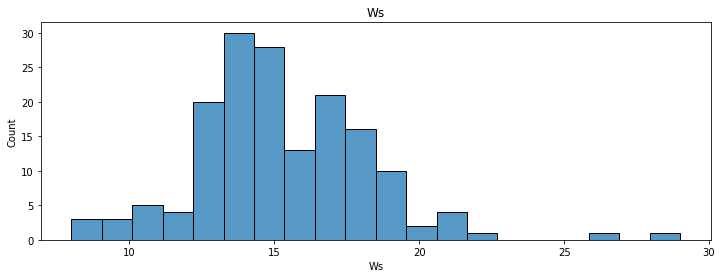

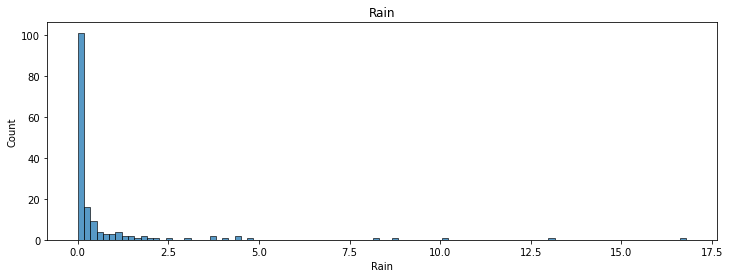

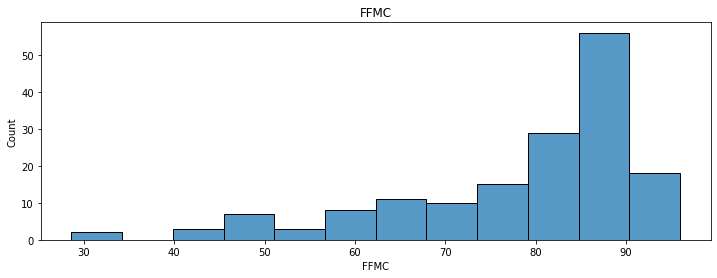

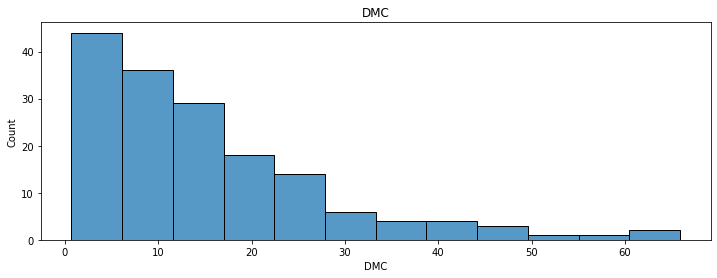

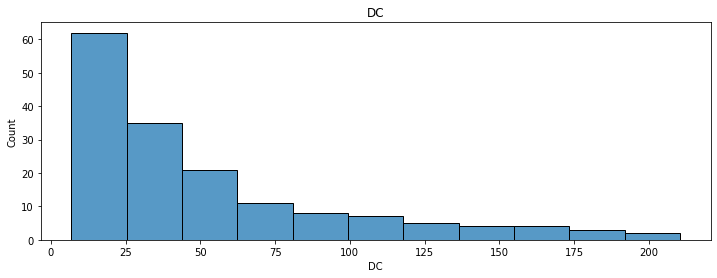

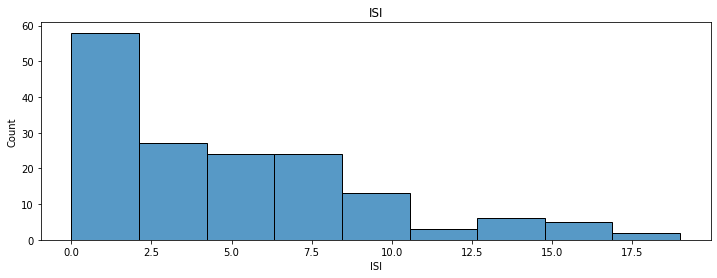

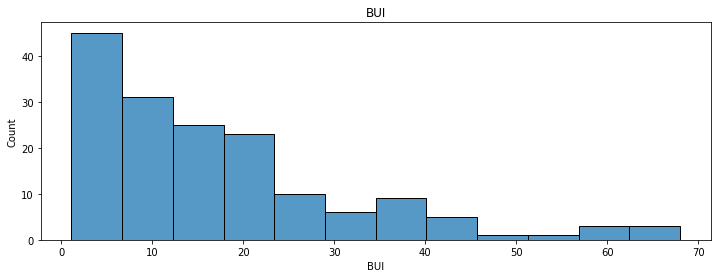

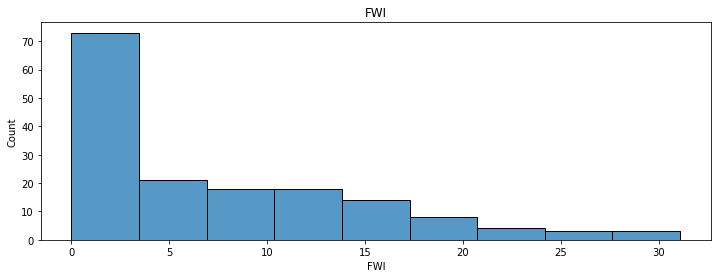

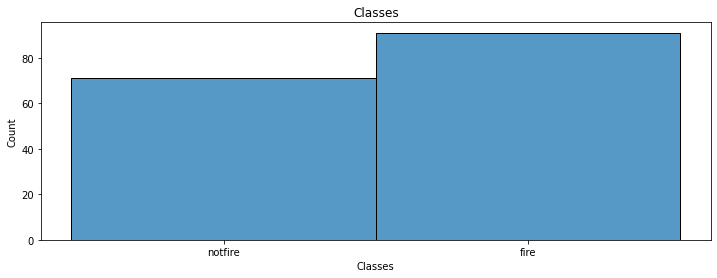

In [ ]:
for col in correlated_features:
    plt.figure(figsize=(12,4))
    sns.histplot(data[col])
    plt.title(col)

### Observation:
- 'RH': Linear with Target, No Outliers
- 'Ws': Linear with Target, Outliers in Bothside,
- 'Rain': Non-Linear with Target, Highly Right Skewed-Outliers in Right,
- 'FFMC': Linear with Target, Left Skewed- Outliers in LEFT,
- 'DMC': Linear with Target, Right Skewed- Outliers in Right,
- 'DC': Linear with Target, Right Skewed- Outliers in Right,
- 'ISI': Linear with Target, Right Skewed- Outliers in Right,
- 'BUI': Linear with Target, Right Skewed- Outliers in Right,
- 'FWI': Linear with Target, Right Skewed- Outliers in Right,


# Handling Outliers in Dataset:

* [Handling outliers on the IQR if distribution is assumed tobe gaussian](#handling-outliers-in-dataset)
* [Handling outliers on the Extreme Outliers if distribution is NOT assumed tobe gaussian](#function-handling-outliers-on-the-extreme-outliers-if-distribution-is-not-assumed-tobe-gaussian)
* [Compairing features with and without outliers](#function-to-compair-distribution-with-or-without-outlier)
* [Compare Skewness](#compairing-skewness-of-features-with-outliers-and-features-without-outliers)



## Function handling outliers on the IQR if distribution is assumed tobe gaussian


In [999]:
def handle_outliers_IQR(df1, col):
    '''
    This Function handles outliers on the basis of the IQR
    '''
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    #finding upper and lower limit
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    # identify outliers
    outliers = [x for x in df1[col] if x < lower_limit or x > upper_limit]
    print('Identified outliers: %d' % len(outliers))
    # non-outliers
    outliers_removed = [x for x in df1[col] if x >= lower_limit and x <= upper_limit]
    print('Non-outlier observations: %d' % len(outliers_removed))
    #
    df1[col+'iqrO'] = numpy.where(df1[col]>upper_limit, upper_limit, numpy.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col+"iqrO"] > upper_limit]

## Function handling outliers on the Extreme Outliers if distribution is NOT assumed tobe gaussian

In [1000]:
def handle_extreme_outliers(df1, col):
    '''
    This Function handles outliers on the basis of the extreme outliers.
    '''
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    #finding upper and lower limit
    upper_limit = percentile75 + 3 * iqr
    lower_limit = percentile25 - 3 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    # identify outliers
    outliers = [x for x in df1[col] if x < lower_limit or x > upper_limit]
    print('Identified outliers: %d' % len(outliers))
    # non-outliers
    outliers_removed = [x for x in df1[col] if x >= lower_limit and x <= upper_limit]
    print('Non-outlier observations: %d' % len(outliers_removed))
    df1[col+"extO"] = numpy.where(df1[col]>upper_limit, upper_limit, numpy.where(df1[col]<lower_limit,lower_limit, df1[col]))
    return df1[df1[col+"extO"] > upper_limit]

## Function to Compair Distribution with or without Outlier:

In [842]:
# Compairing Features with or without Outliers
def create_comparison_plot(df,col1,col2):
    '''
    This function compairs the distribution of the features with or without outliers.
    '''
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,1)
    sns.histplot(df[col1], bins=50, kde=True,color='g')
    plt.title("Feature with Outliers",loc='center')

    plt.subplot(2,2,2)
    sns.boxplot(df[col1])

    plt.subplot(2,2,3)
    plt.title("Feature without Outliers",loc='center')
    sns.histplot(df[col2], bins=50, kde=True)

    plt.subplot(2,2,4)
    sns.boxplot(df[col2])

    plt.show()

In [1001]:
# Compairing Features with or without Outliers
def create_comparison_plot(df,col1,col2):
    '''
    This function compairs the distribution of the features with or without outliers.
    '''
    plt.figure(figsize=(40,10))
    plt.subplot(2,3,1)
    sns.histplot(df[col1], bins=50, kde=True,color='g')
    plt.title("Feature with Outliers",loc='center')

    plt.subplot(2,3,2)
    sns.boxplot(df[col1])
    plt.title(col1)

    plt.subplot(2,3,3)
    sns.scatterplot(x=data[col1], y = data['Temperature'])
    plt.title(col1)



    plt.subplot(2,3,4)
    plt.title("Feature without Outliers",loc='center')
    sns.histplot(df[col2], bins=50, kde=True)
    plt.title(col2)

    plt.subplot(2,3,5)
    sns.boxplot(df[col2])
    plt.title(col2)

    plt.subplot(2,3,6)
    sns.scatterplot(x=data[col2], y = data['Temperature'])
    plt.title(col2)

    plt.show()


    
    

In [1002]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [1003]:
handle_extreme_outliers(data,'Ws')

percentile25 14.0
percentile75 17.0
Upper limit 26.0
Lower limit 5.0
Identified outliers: 1
Non-outlier observations: 161


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, WsextO]
Index: []

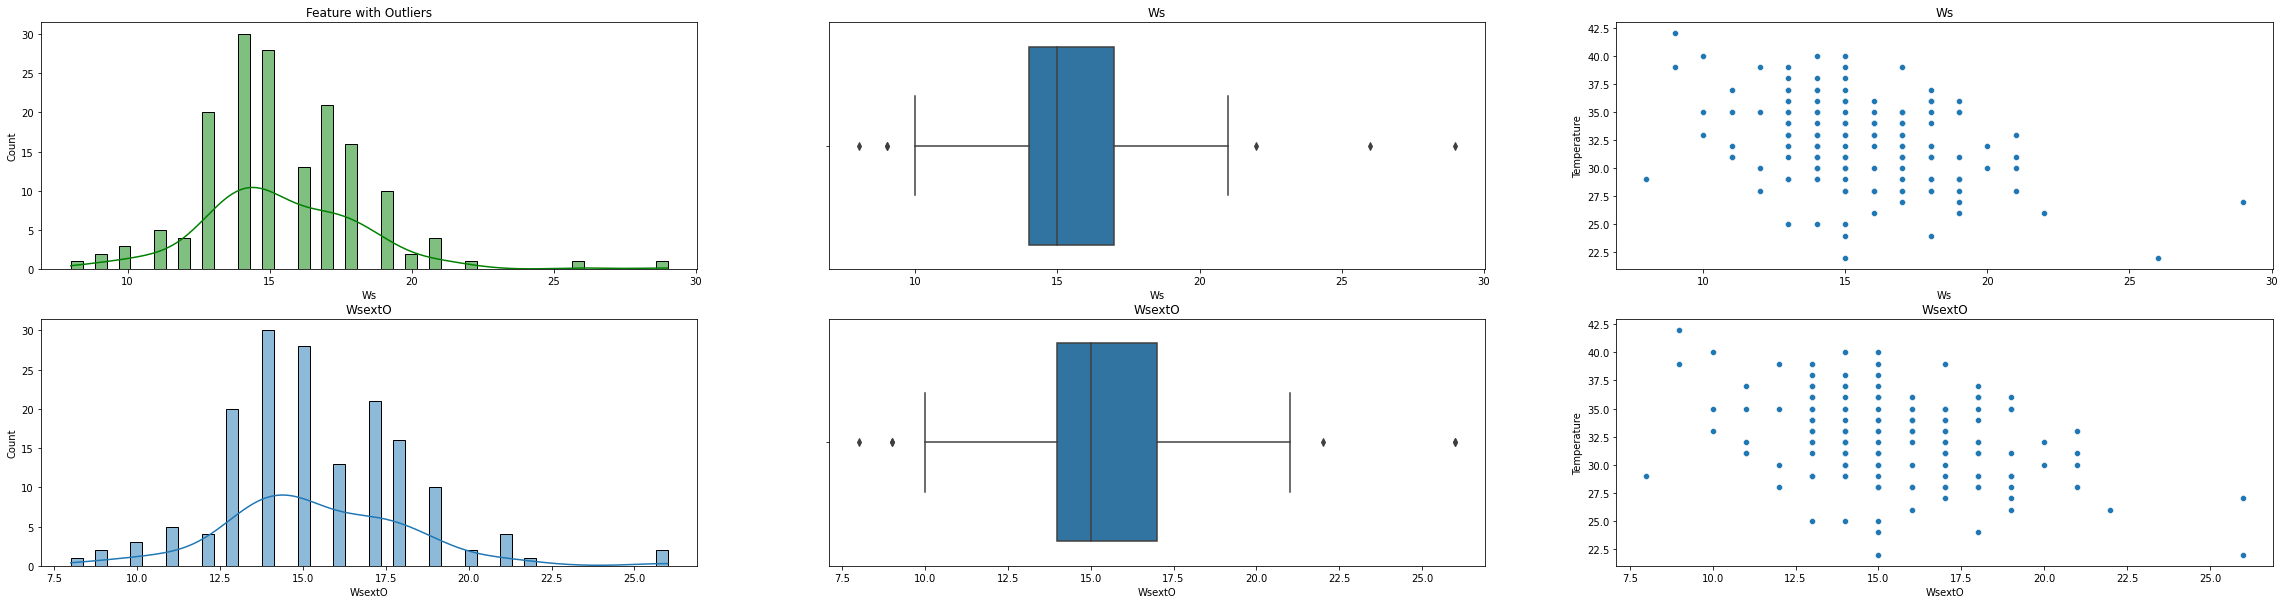

In [1004]:
create_comparison_plot(data,col1="Ws", col2="WsextO")

In [1005]:
data.drop('WsextO',axis=1,inplace=True)

In [1006]:
handle_outliers_IQR(data,'Ws')

percentile25 14.0
percentile75 17.0
Upper limit 21.5
Lower limit 9.5
Identified outliers: 6
Non-outlier observations: 156


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, WsiqrO]
Index: []

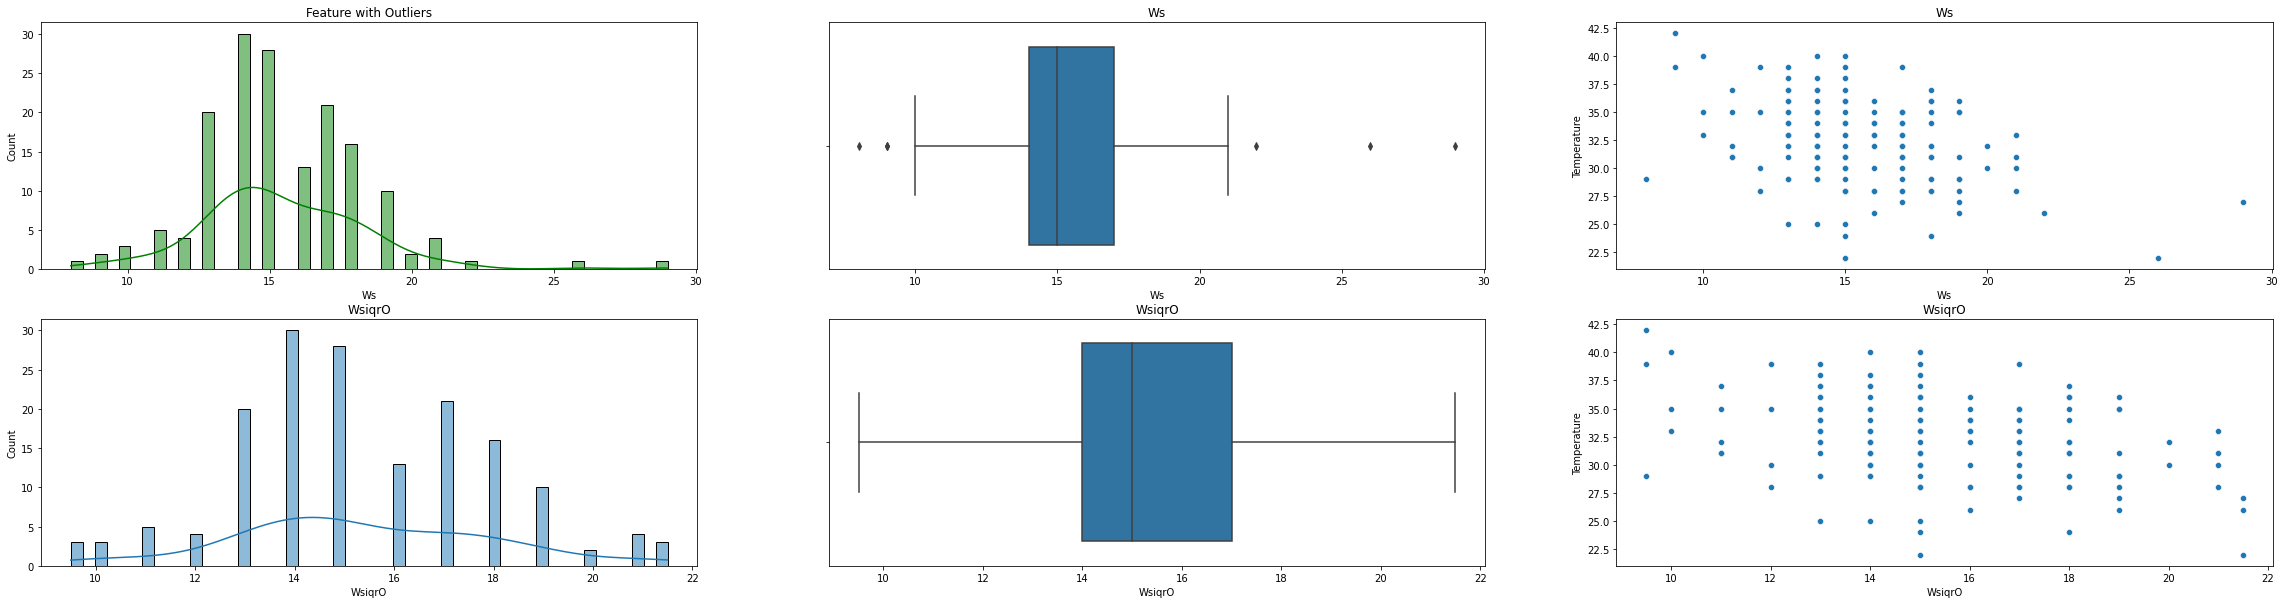

In [1007]:
create_comparison_plot(data,col1="Ws", col2="WsiqrO")

In [1008]:
data.drop('Ws',axis=1,inplace=True)

In [1009]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [1010]:
handle_extreme_outliers(data,'Rain')

percentile25 0.0
percentile75 0.475
Upper limit 1.9
Lower limit -1.4249999999999998
Identified outliers: 15
Non-outlier observations: 147


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO]
Index: []

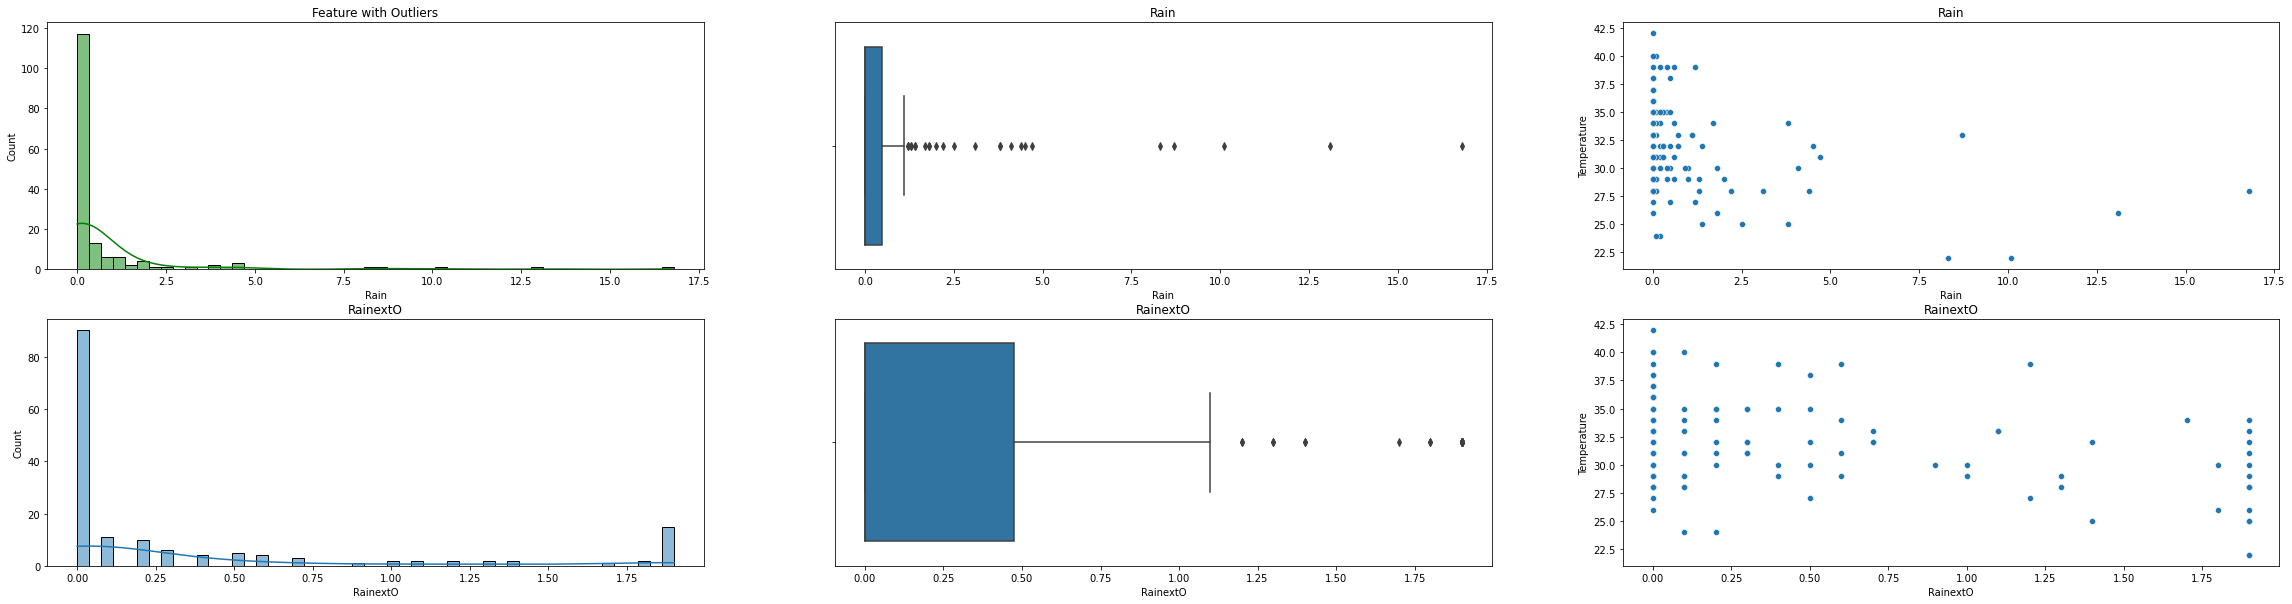

In [1011]:
create_comparison_plot(data,col1="Rain", col2="RainextO")

In [1012]:
handle_outliers_IQR(data,'Rain')

percentile25 0.0
percentile75 0.475
Upper limit 1.1875
Lower limit -0.7124999999999999
Identified outliers: 24
Non-outlier observations: 138


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO]
Index: []

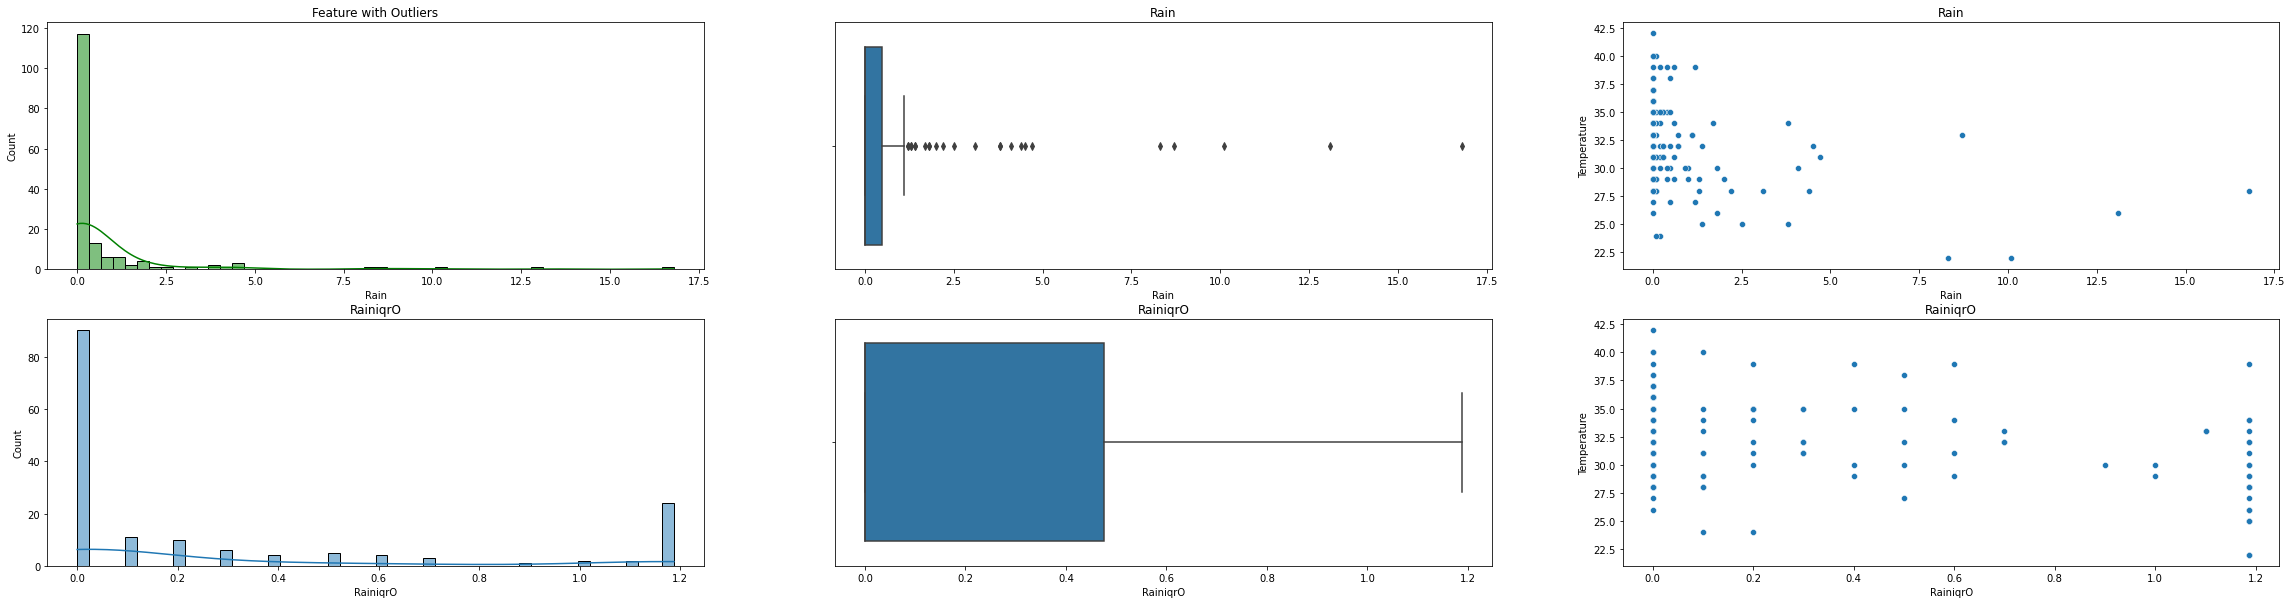

In [1013]:
create_comparison_plot(data,col1="Rain", col2="RainiqrO")

In [1014]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'WsiqrO', 'RainextO',
       'RainiqrO'],
      dtype='object')

In [1015]:
#data.drop(['RainextO','RainiqrO'],axis=1,inplace=True)

In [1016]:
handle_extreme_outliers(data,'FFMC')

percentile25 72.9
percentile75 88.52499999999999
Upper limit 135.39999999999995
Lower limit 26.02500000000005
Identified outliers: 0
Non-outlier observations: 162


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCextO]
Index: []

In [1017]:
data.drop('FFMCextO',axis =1, inplace = True)

In [1018]:
handle_outliers_IQR(data,'FFMC')

percentile25 72.9
percentile75 88.52499999999999
Upper limit 111.96249999999998
Lower limit 49.46250000000003
Identified outliers: 12
Non-outlier observations: 150


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO]
Index: []

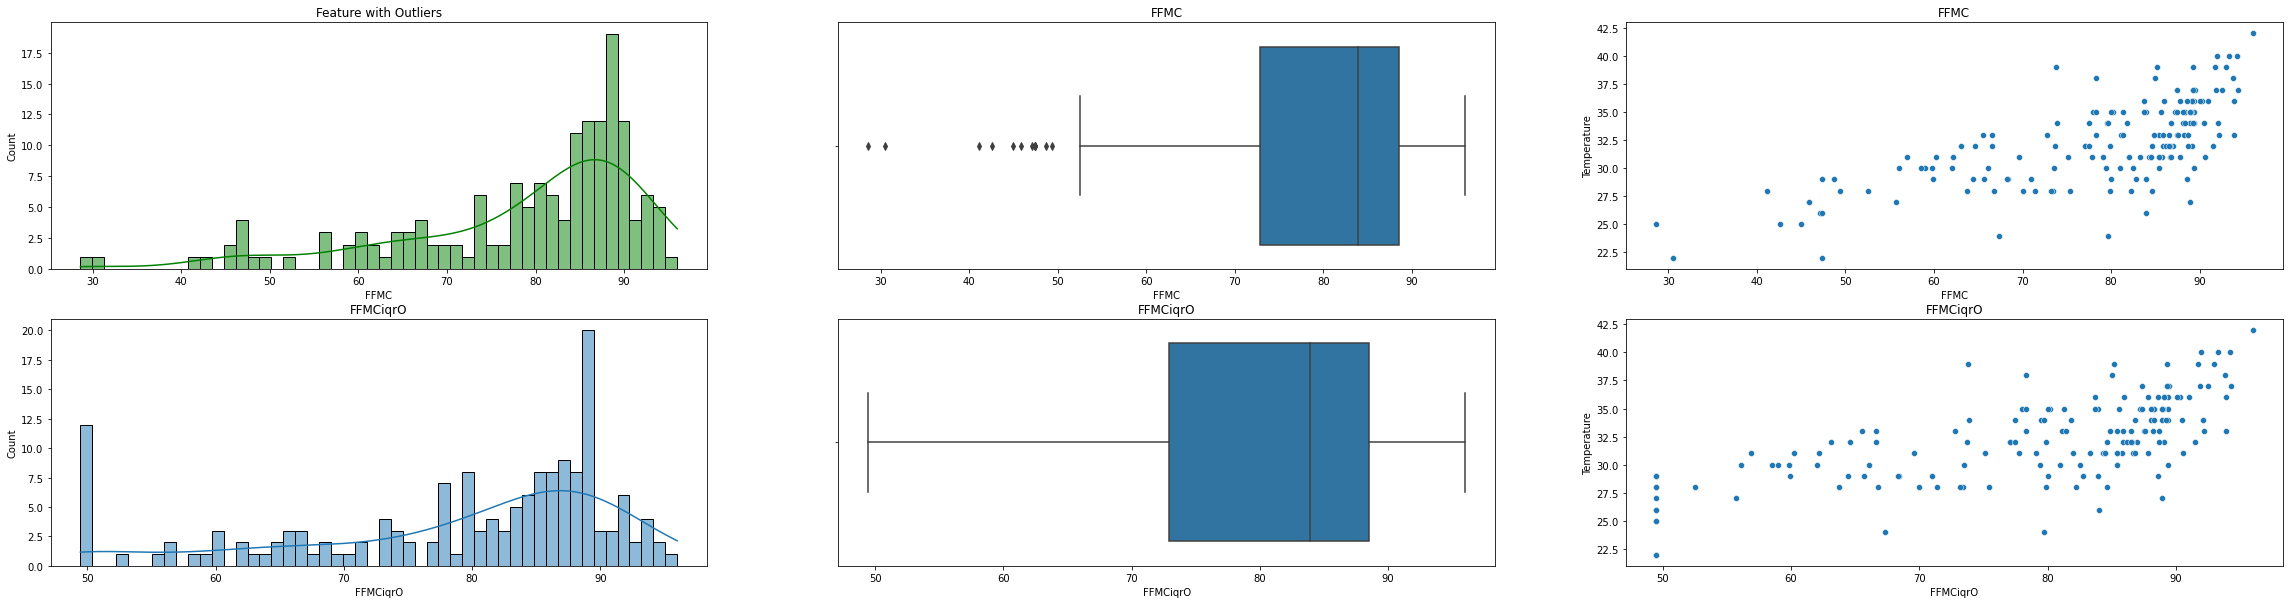

In [1019]:
create_comparison_plot(data,col1="FFMC", col2="FFMCiqrO")

In [1020]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'WsiqrO', 'RainextO',
       'RainiqrO', 'FFMCiqrO'],
      dtype='object')

In [1021]:
data.drop('FFMC',axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region', 'WsiqrO', 'RainextO', 'RainiqrO',
       'FFMCiqrO'],
      dtype='object')

In [1022]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [1023]:
handle_extreme_outliers(data,'DMC')

percentile25 5.85
percentile75 20.9
Upper limit 66.05
Lower limit -39.3
Identified outliers: 0
Non-outlier observations: 162


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, DMC, DC, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCextO]
Index: []

In [1024]:
data.drop("DMCextO",axis=1,inplace=True)

In [1025]:
handle_outliers_IQR(data,'DMC')

percentile25 5.85
percentile75 20.9
Upper limit 43.474999999999994
Lower limit -16.725
Identified outliers: 8
Non-outlier observations: 154


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, DMC, DC, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO]
Index: []

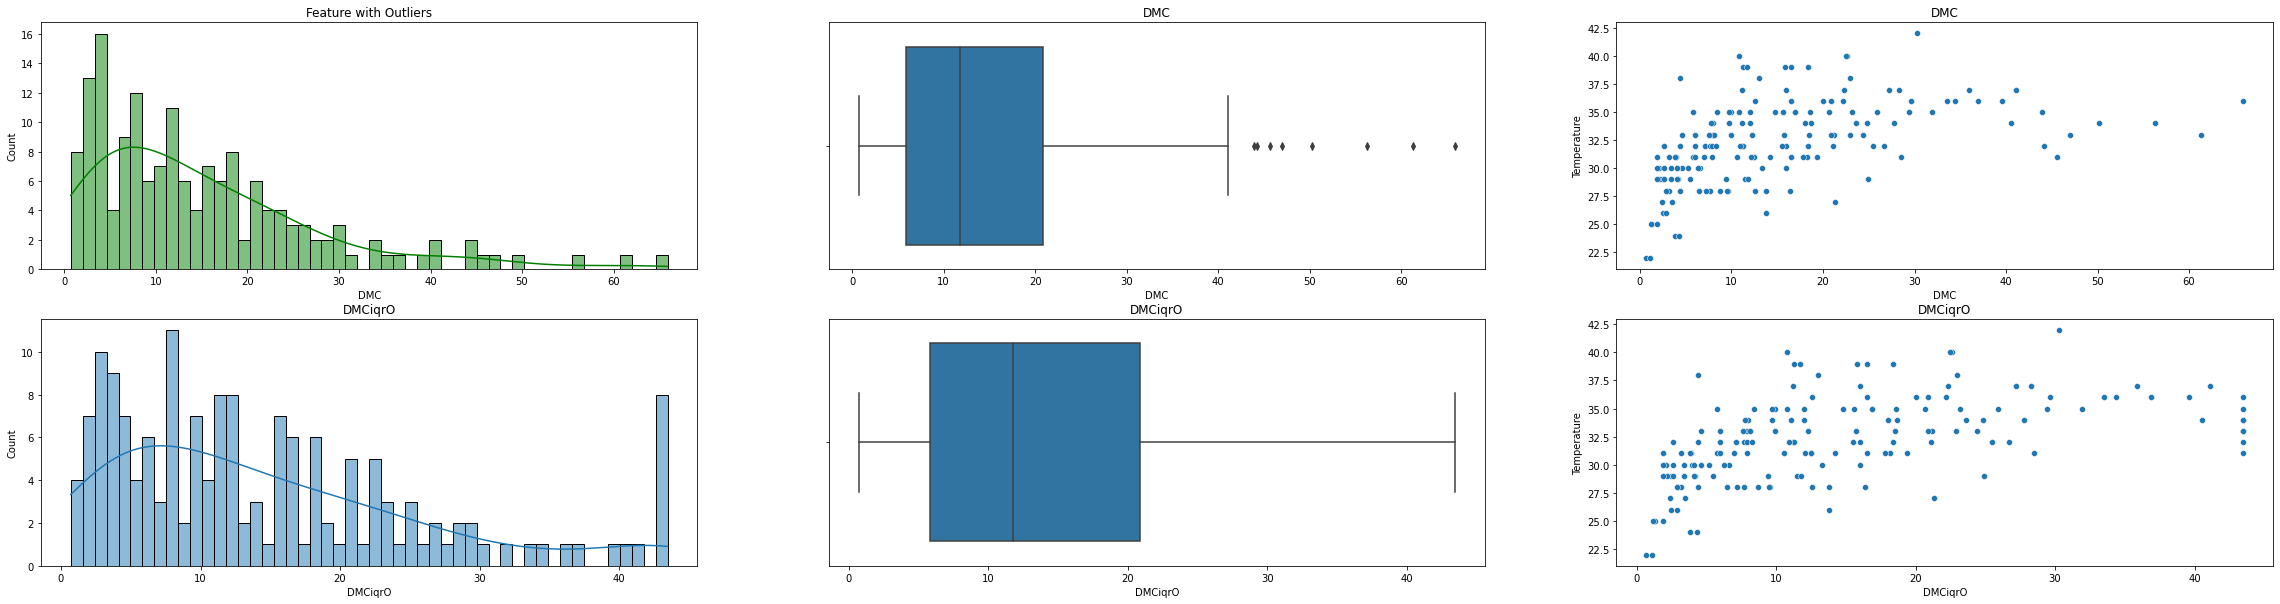

In [1026]:
create_comparison_plot(data,col1="DMC", col2="DMCiqrO")

In [1027]:
data.drop('DMC',axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'WsiqrO', 'RainextO', 'RainiqrO',
       'FFMCiqrO', 'DMCiqrO'],
      dtype='object')

In [1028]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [1029]:
handle_extreme_outliers(data,'DC')

percentile25 15.2
percentile75 67.15
Upper limit 223.00000000000003
Lower limit -140.65000000000003
Identified outliers: 0
Non-outlier observations: 162


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, DC, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO, DCextO]
Index: []

In [1030]:
data.drop("DCextO",axis=1,inplace=True)

In [1031]:
handle_outliers_IQR(data,'DC')

percentile25 15.2
percentile75 67.15
Upper limit 145.07500000000002
Lower limit -62.72500000000001
Identified outliers: 12
Non-outlier observations: 150


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, DC, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO, DCiqrO]
Index: []

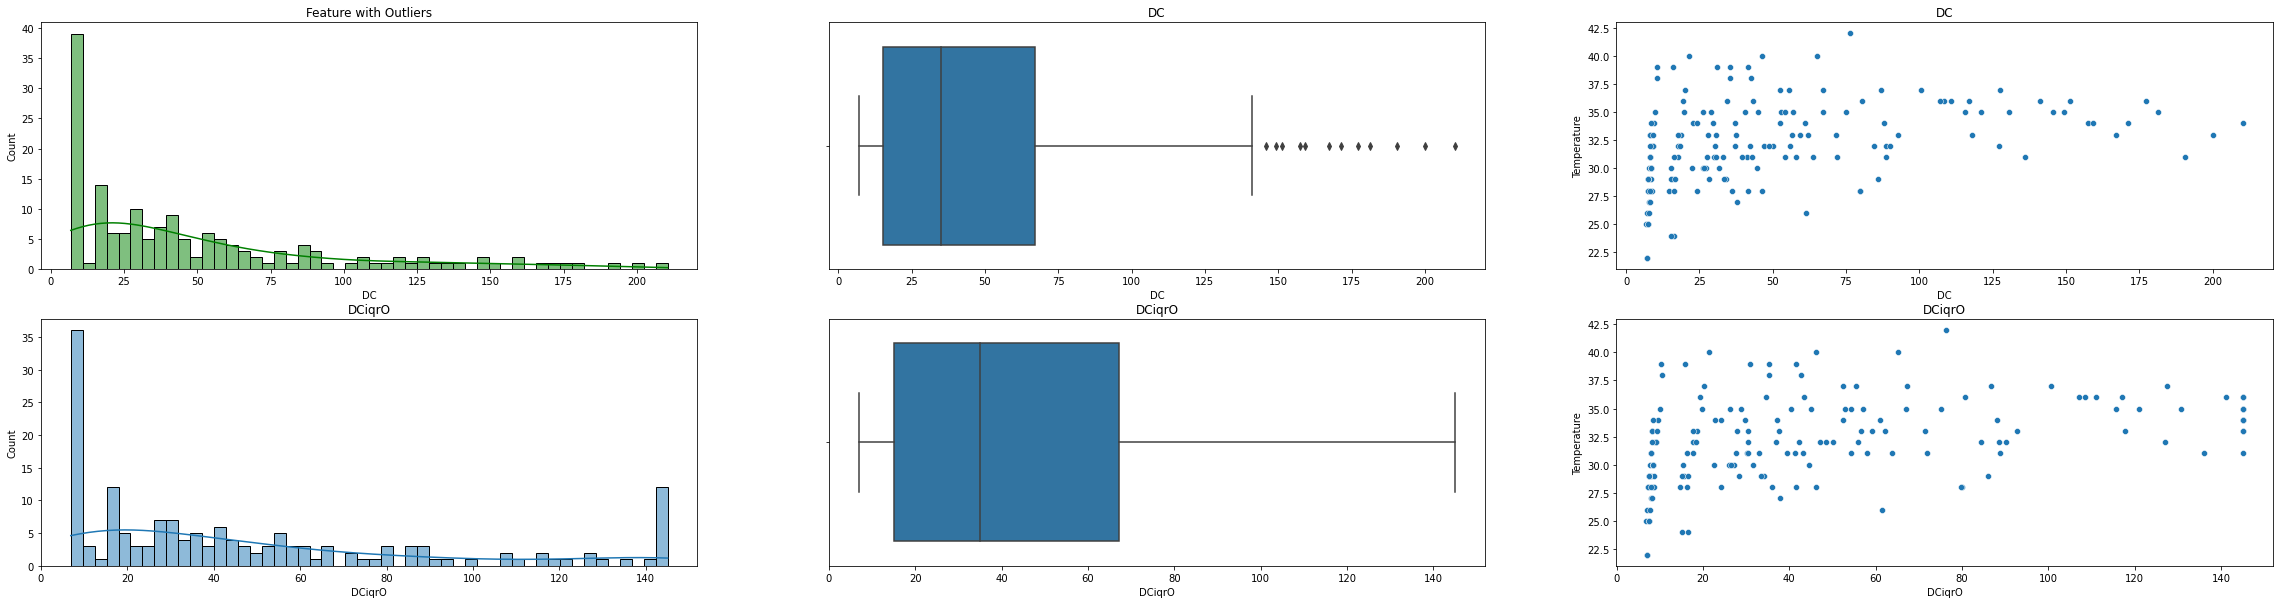

In [1032]:
create_comparison_plot(data,col1="DC", col2="DCiqrO")

In [1033]:
data.drop('DC',axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'WsiqrO', 'RainextO', 'RainiqrO',
       'FFMCiqrO', 'DMCiqrO', 'DCiqrO'],
      dtype='object')

In [1034]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [1035]:
handle_extreme_outliers(data,'ISI')

percentile25 1.4249999999999998
percentile75 7.475
Upper limit 25.625
Lower limit -16.724999999999998
Identified outliers: 0
Non-outlier observations: 162


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO, DCiqrO, ISIextO]
Index: []

In [1036]:
data.drop("ISIextO", axis=1,inplace=True)

In [1037]:
handle_outliers_IQR(data,'ISI')

percentile25 1.4249999999999998
percentile75 7.475
Upper limit 16.549999999999997
Lower limit -7.6499999999999995
Identified outliers: 3
Non-outlier observations: 159


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, ISI, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO, DCiqrO, ISIiqrO]
Index: []

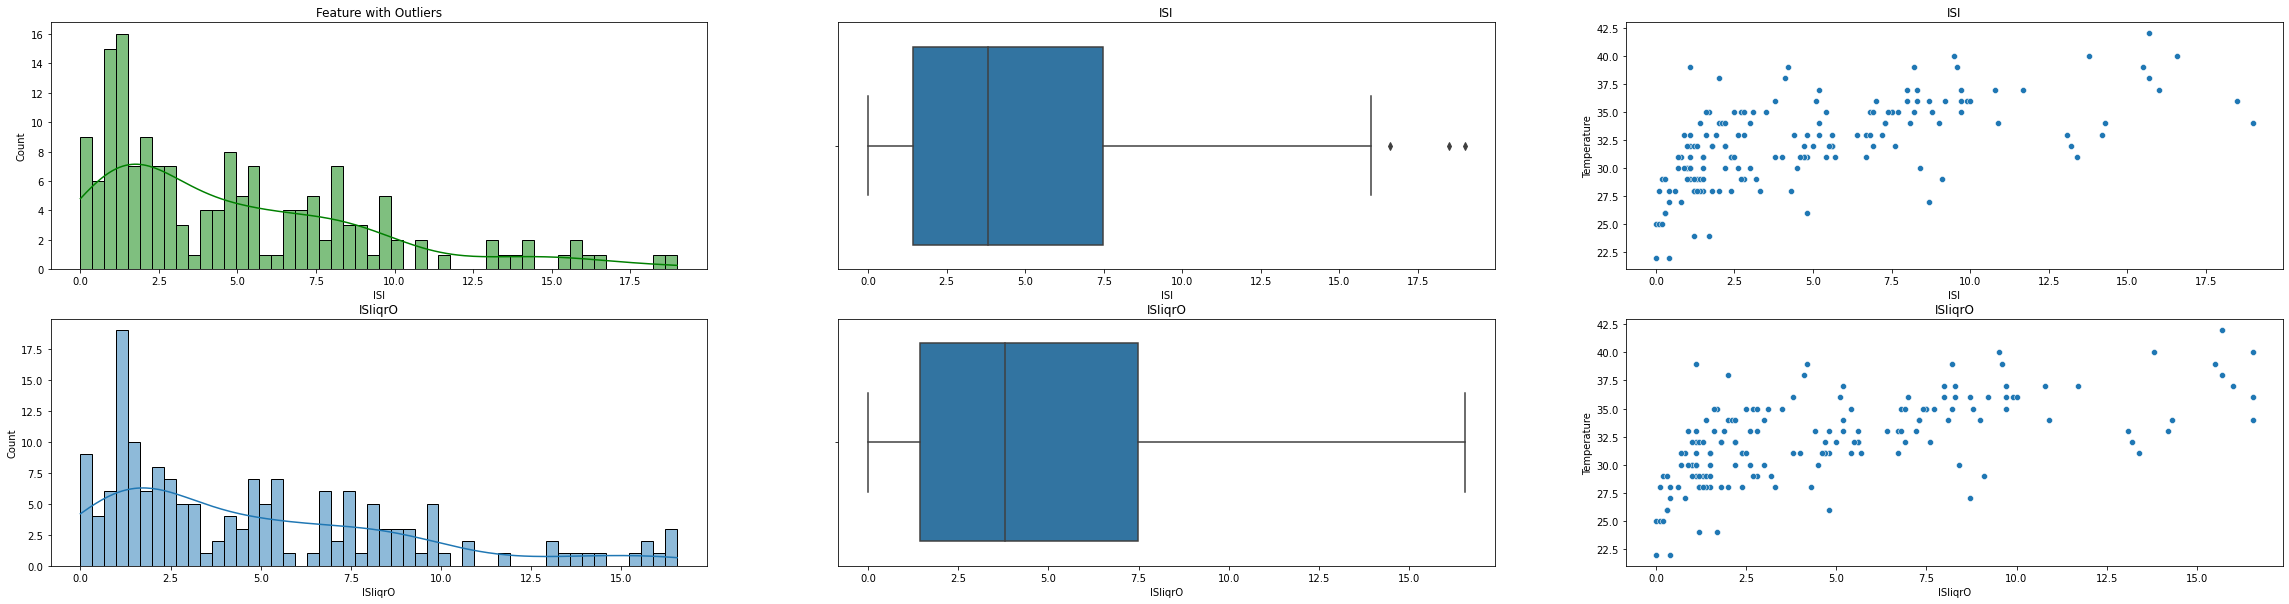

In [1038]:
create_comparison_plot(data,col1="ISI", col2="ISIiqrO")

In [1039]:
data.drop('ISI',axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'BUI', 'FWI',
       'Classes', 'Region', 'WsiqrO', 'RainextO', 'RainiqrO', 'FFMCiqrO',
       'DMCiqrO', 'DCiqrO', 'ISIiqrO'],
      dtype='object')

In [1040]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [1041]:
handle_extreme_outliers(data,'BUI')

percentile25 6.05
percentile75 22.4
Upper limit 71.44999999999999
Lower limit -43.0
Identified outliers: 0
Non-outlier observations: 162


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO, DCiqrO, ISIiqrO, BUIextO]
Index: []

In [1042]:
data.drop("BUIextO", axis=1,inplace=True)

In [1043]:
handle_outliers_IQR(data,'BUI')

percentile25 6.05
percentile75 22.4
Upper limit 46.925
Lower limit -18.474999999999998
Identified outliers: 8
Non-outlier observations: 154


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, BUI, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO, DCiqrO, ISIiqrO, BUIiqrO]
Index: []

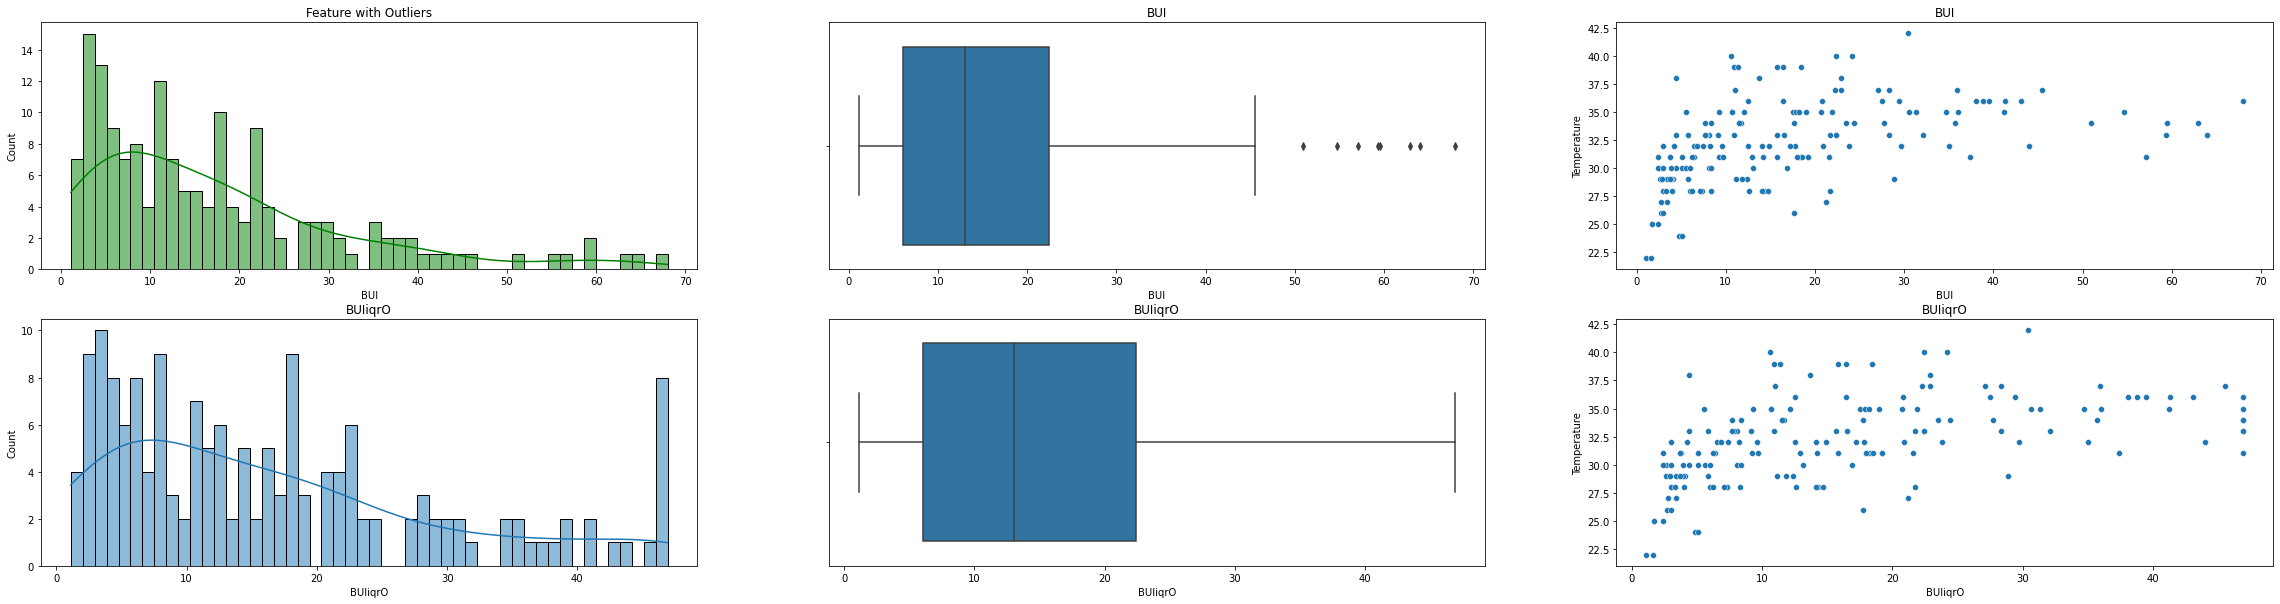

In [1044]:
create_comparison_plot(data,col1="BUI", col2="BUIiqrO")

In [1045]:
data.drop('BUI',axis=1,inplace=True)

In [1046]:
data.head()

day  month  year  Temperature  RH  Rain  FWI  Classes  Region  WsiqrO  \
0   11      7  2012           33  76   0.0  2.2  notfire     0.0    14.0   
1   14      6  2012           30  78   0.5  0.4  notfire     0.0    20.0   
2    4      6  2012           25  89   2.5  0.0  notfire     0.0    13.0   
3   16      6  2012           29  87   0.4  0.1  notfire     1.0    15.0   
4   25      6  2012           31  64   0.0  8.4     fire     0.0    15.0   

   RainextO  RainiqrO  FFMCiqrO  DMCiqrO  DCiqrO  ISIiqrO  BUIiqrO  
0       0.0    0.0000   81.1000      8.1    18.7      2.6      8.1  
1       0.5    0.5000   59.0000      4.6     7.8      1.0      4.4  
2       1.9    1.1875   49.4625      1.3     6.9      0.0      1.7  
3       0.4    0.4000   49.4625      4.2     8.0      0.2      4.1  
4       0.0    0.0000   86.7000     14.2    63.8      5.7     18.3

In [1047]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [1048]:
handle_extreme_outliers(data,'FWI')

percentile25 0.7
percentile75 12.149999999999999
Upper limit 46.49999999999999
Lower limit -33.64999999999999
Identified outliers: 0
Non-outlier observations: 162


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO, DCiqrO, ISIiqrO, BUIiqrO, FWIextO]
Index: []

In [1049]:
data.drop("FWIextO",axis=1,inplace=True)

In [1050]:
handle_outliers_IQR(data,'FWI')

percentile25 0.7
percentile75 12.149999999999999
Upper limit 29.324999999999996
Lower limit -16.474999999999998
Identified outliers: 3
Non-outlier observations: 159


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Rain, FWI, Classes, Region, WsiqrO, RainextO, RainiqrO, FFMCiqrO, DMCiqrO, DCiqrO, ISIiqrO, BUIiqrO, FWIiqrO]
Index: []

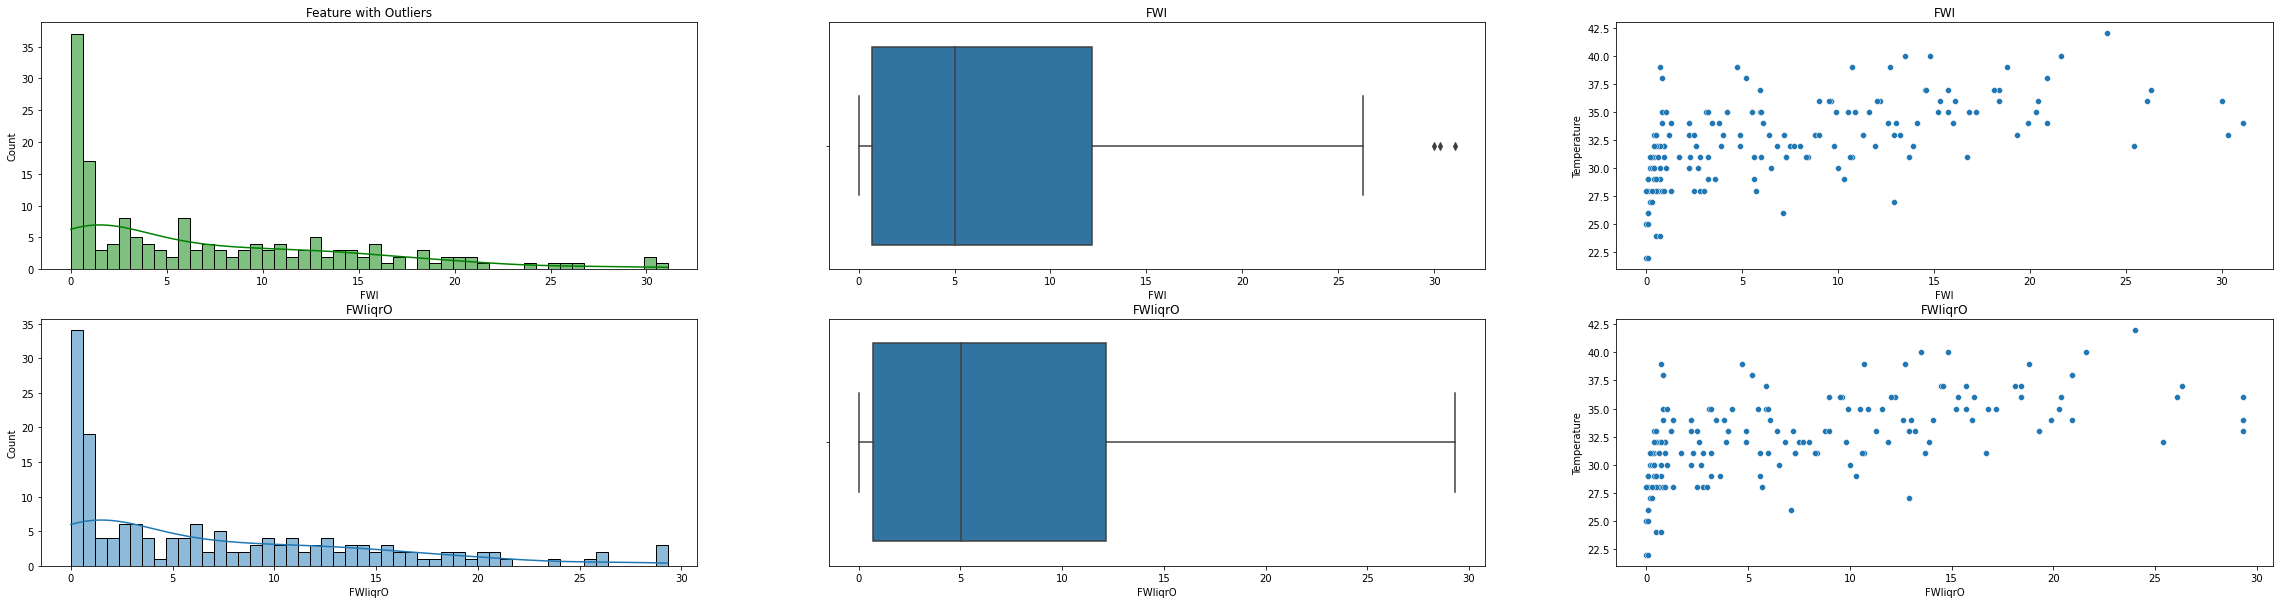

In [1051]:
create_comparison_plot(data,col1="FWI", col2="FWIiqrO")

In [1052]:
data.drop('FWI',axis=1,inplace=True)

In [1053]:
data.head()

day  month  year  Temperature  RH  Rain  Classes  Region  WsiqrO  RainextO  \
0   11      7  2012           33  76   0.0  notfire     0.0    14.0       0.0   
1   14      6  2012           30  78   0.5  notfire     0.0    20.0       0.5   
2    4      6  2012           25  89   2.5  notfire     0.0    13.0       1.9   
3   16      6  2012           29  87   0.4  notfire     1.0    15.0       0.4   
4   25      6  2012           31  64   0.0     fire     0.0    15.0       0.0   

   RainiqrO  FFMCiqrO  DMCiqrO  DCiqrO  ISIiqrO  BUIiqrO  FWIiqrO  
0    0.0000   81.1000      8.1    18.7      2.6      8.1      2.2  
1    0.5000   59.0000      4.6     7.8      1.0      4.4      0.4  
2    1.1875   49.4625      1.3     6.9      0.0      1.7      0.0  
3    0.4000   49.4625      4.2     8.0      0.2      4.1      0.1  
4    0.0000   86.7000     14.2    63.8      5.7     18.3      8.4

# Checkin Again Scatterplot for Linearity and after removing Outlier:


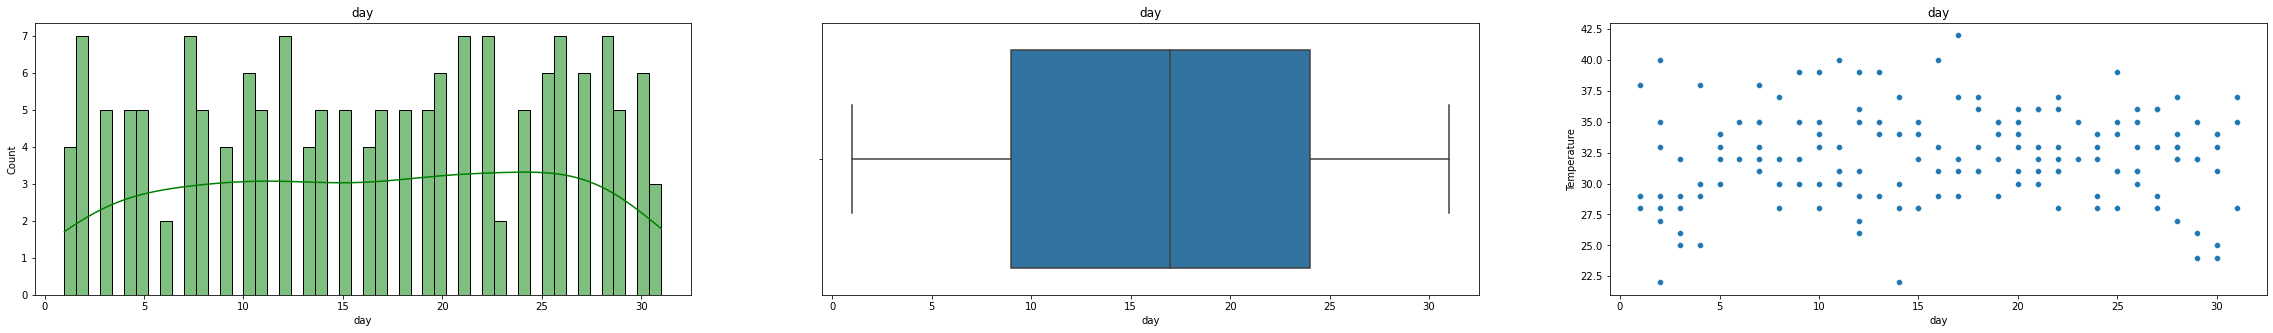

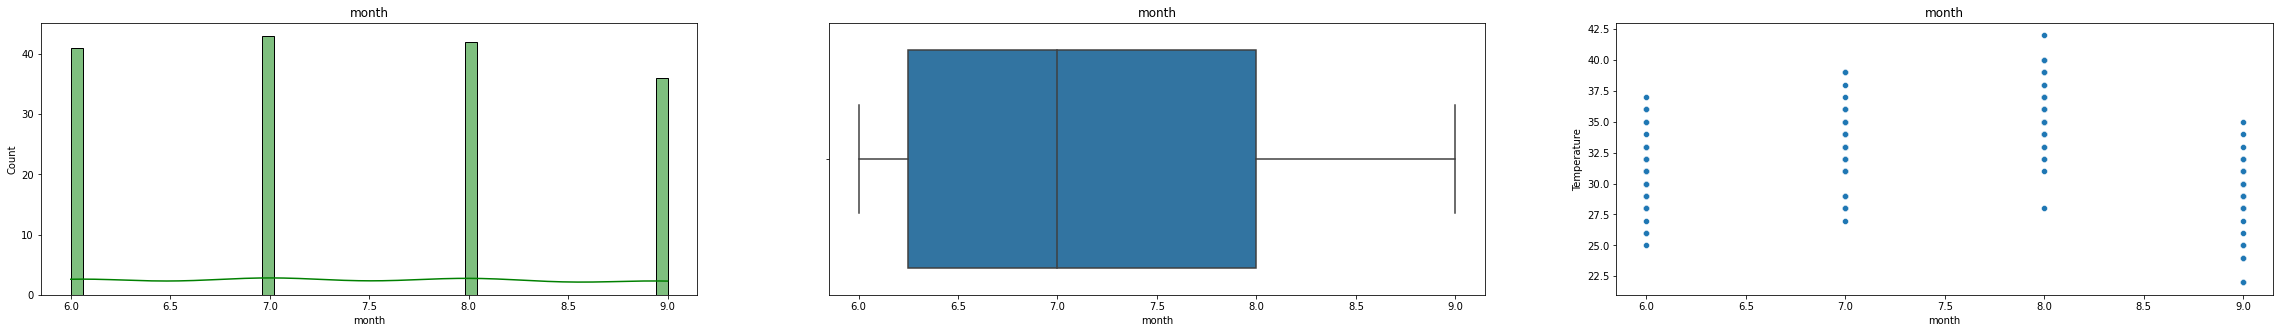

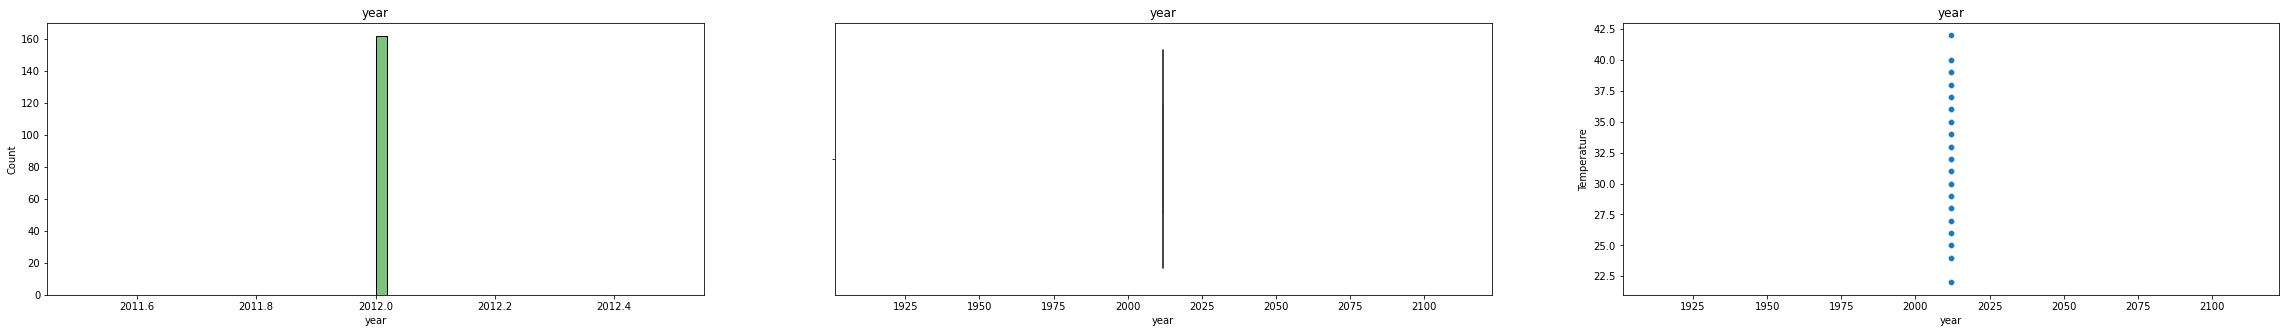

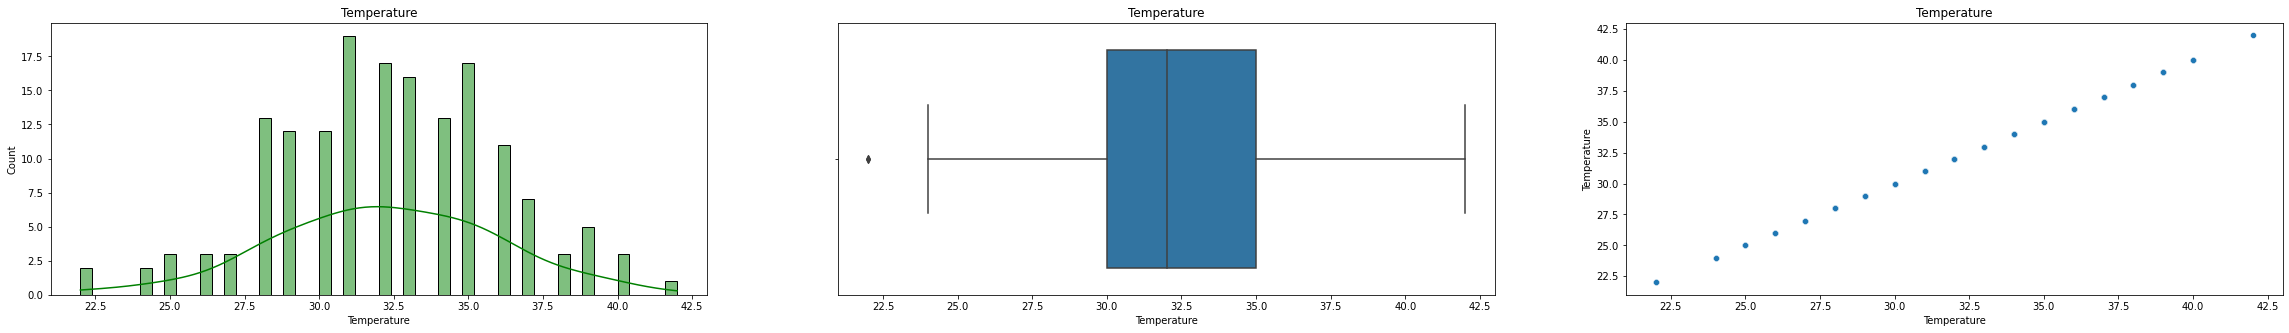

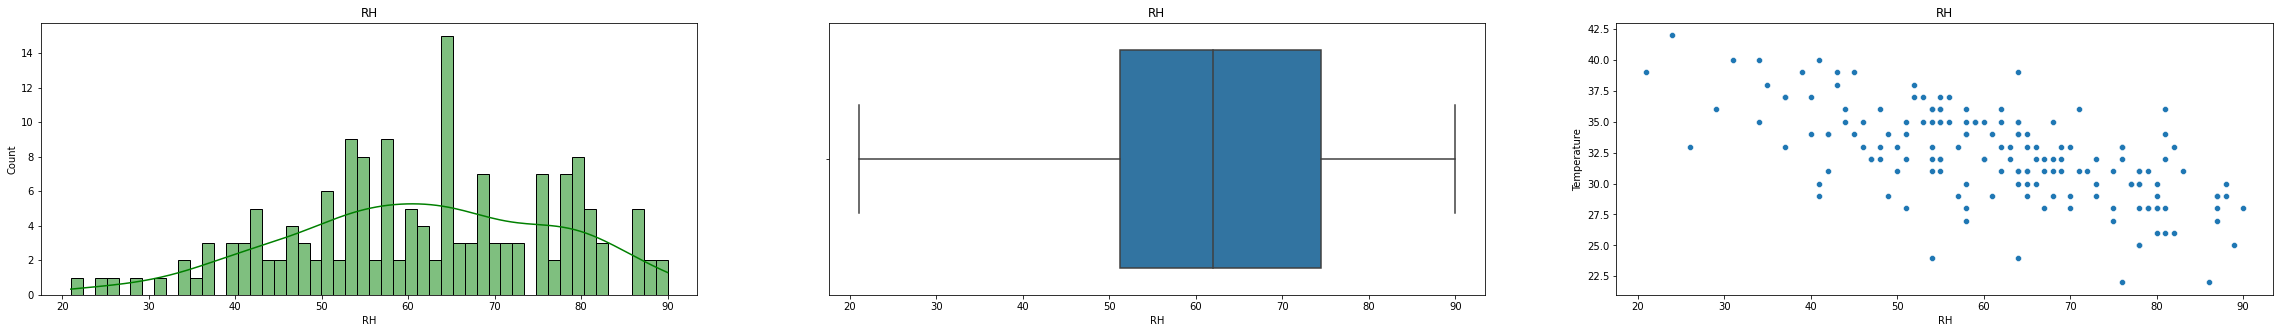

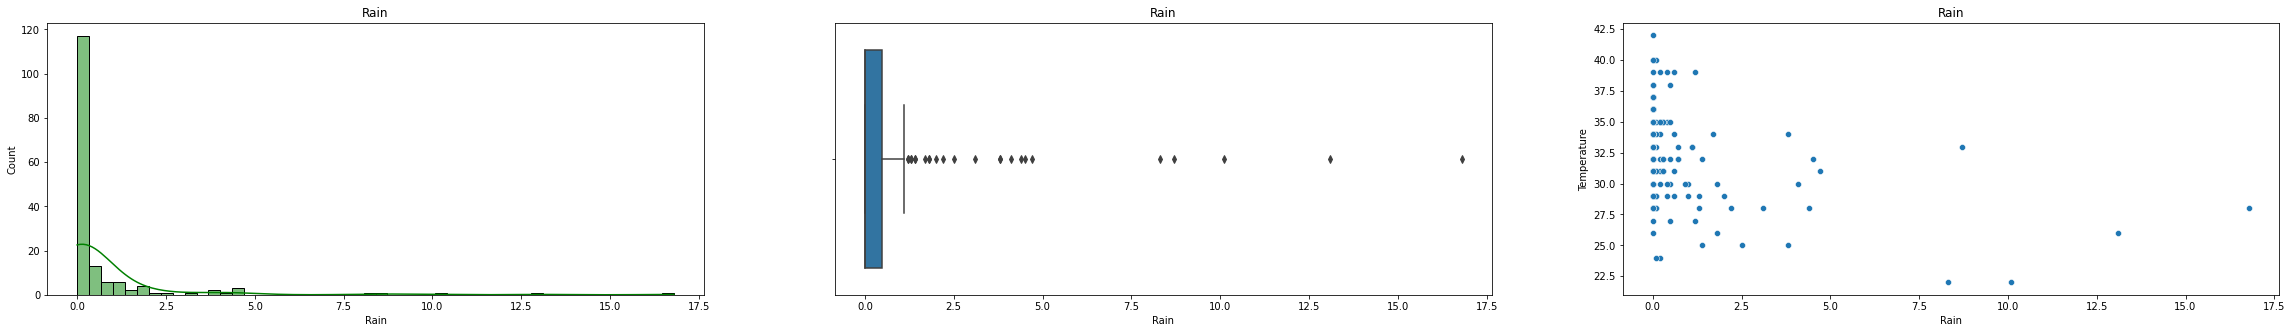

TypeError: Horizontal orientation requires numeric `x` variable.

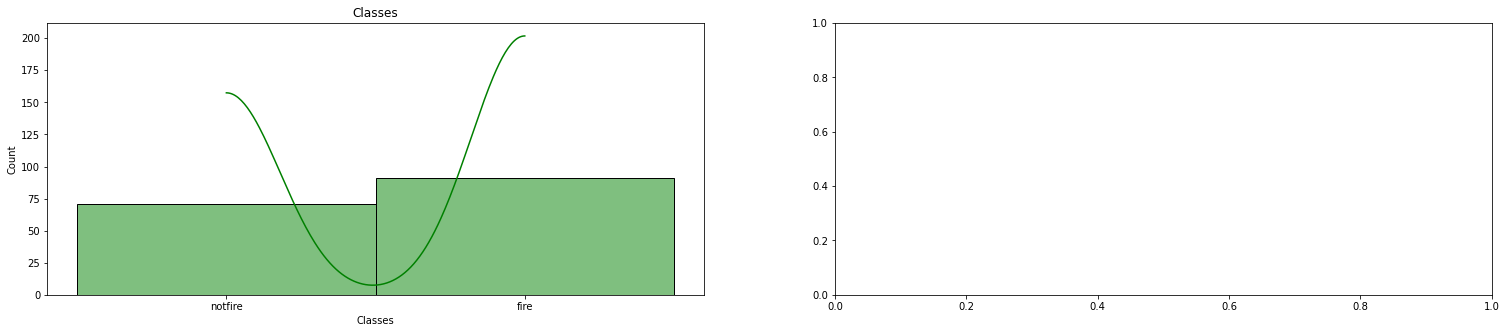

In [1054]:
# Compairing plots
def create_comparison_plot(df,col1):
    '''
    This function compairs the distribution of the features with or without outliers.
    '''
    plt.figure(figsize=(40,5))
    plt.subplot(1,3,1)
    sns.histplot(df[col1], bins=50, kde=True,color='g')
    plt.title(col1,loc='center')

    plt.subplot(1,3,2)
    sns.boxplot(df[col1])
    plt.title(col1)

    plt.subplot(1,3,3)
    sns.scatterplot(x=data[col1], y = data['Temperature'])
    plt.title(col1)



    plt.show()



for col in data.columns:
    create_comparison_plot(df = data,col1= col)

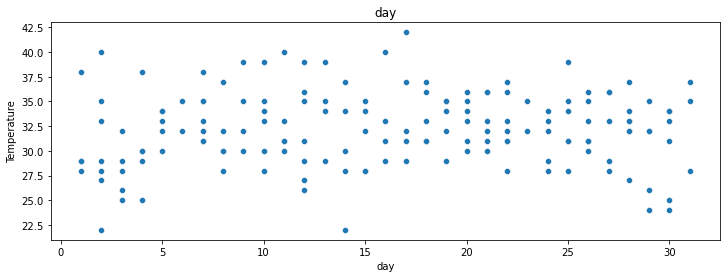

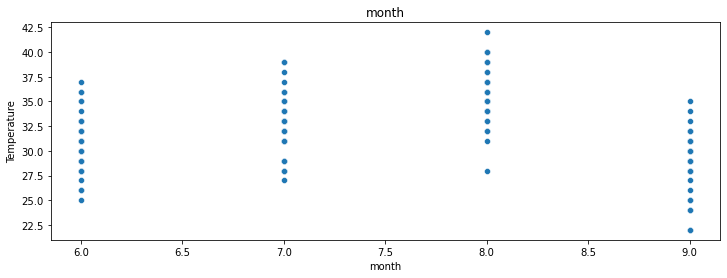

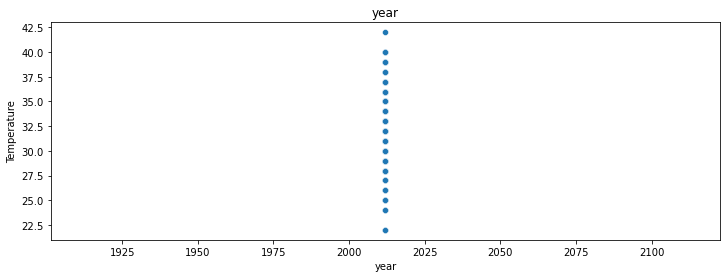

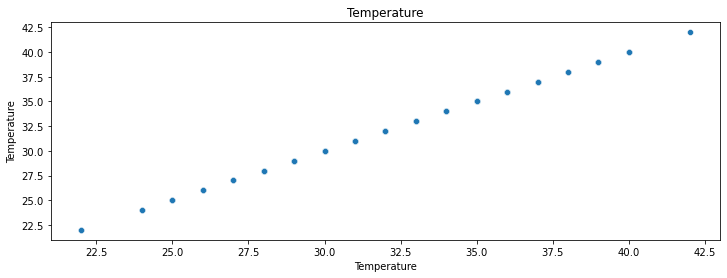

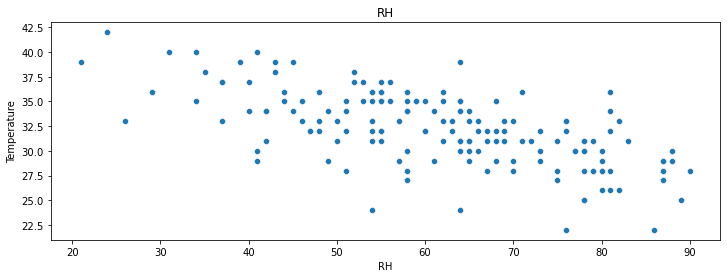

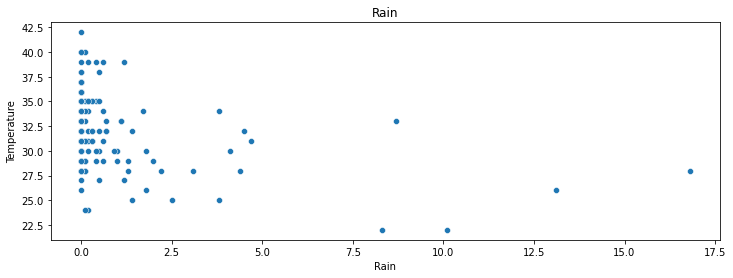

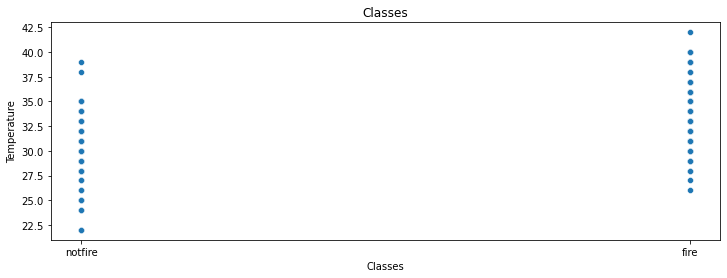

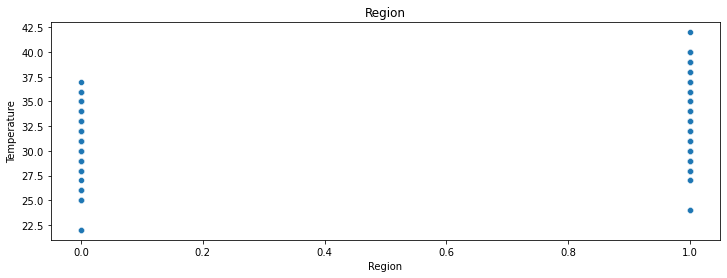

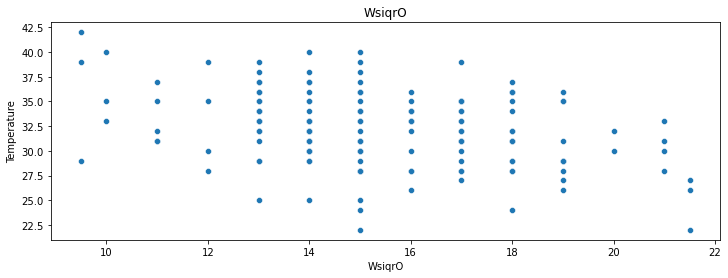

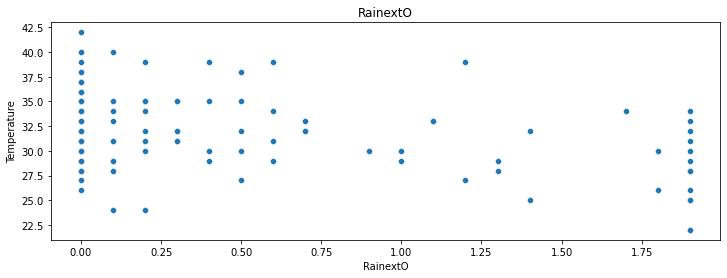

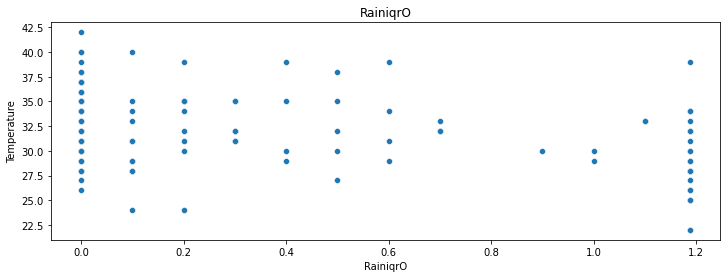

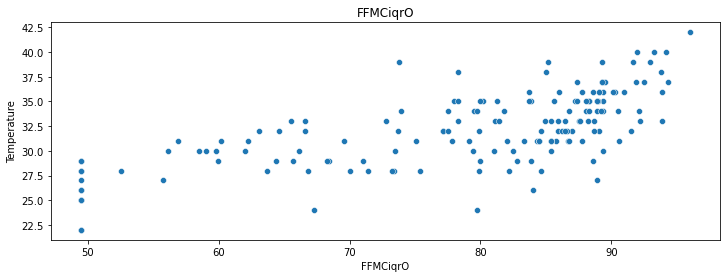

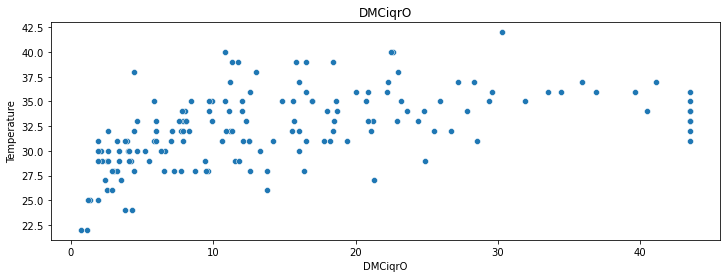

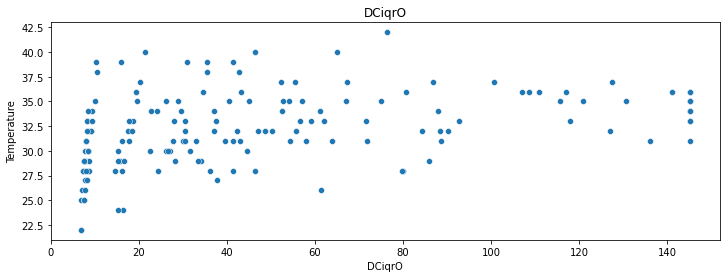

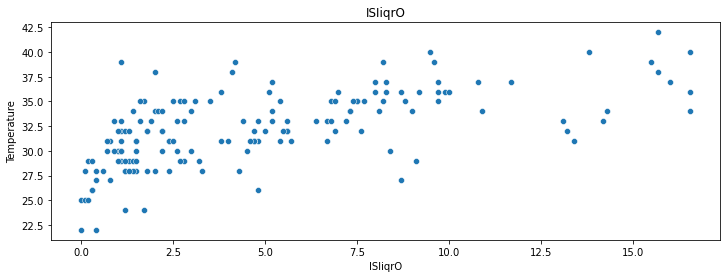

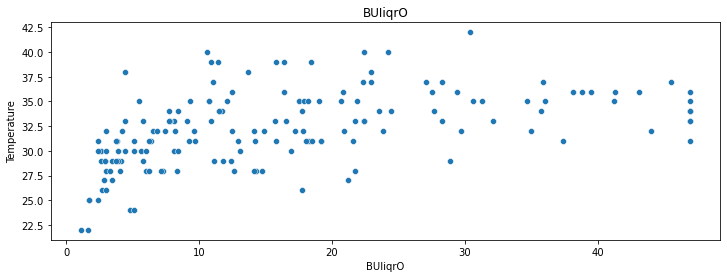

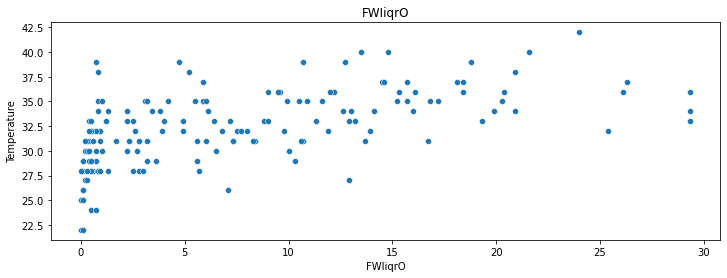

In [1055]:
for col in data.columns:
    plt.figure(figsize=(12,4))
    sns.scatterplot(x=data[col], y = data['Temperature'])
    plt.title(col)

TypeError: Horizontal orientation requires numeric `x` variable.

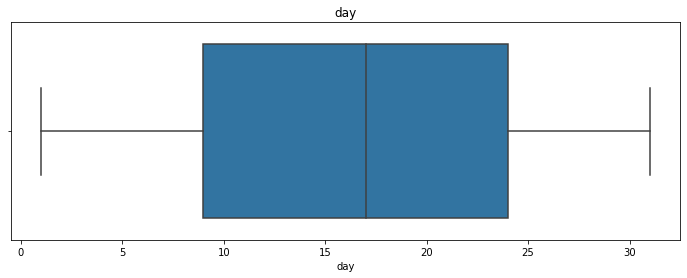

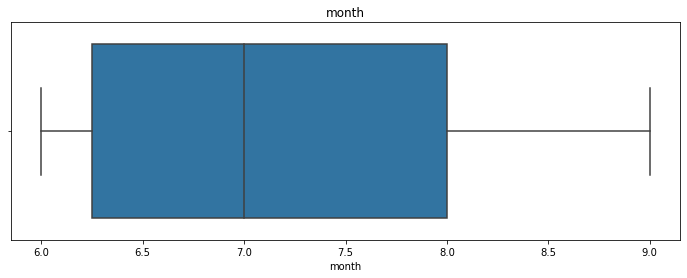

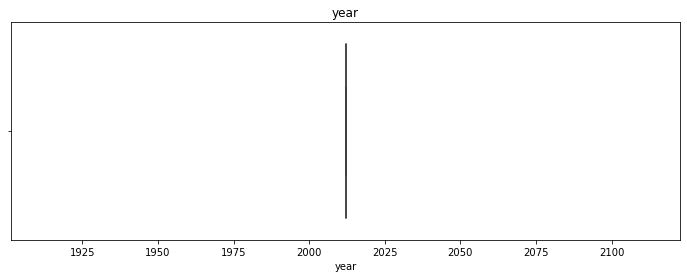

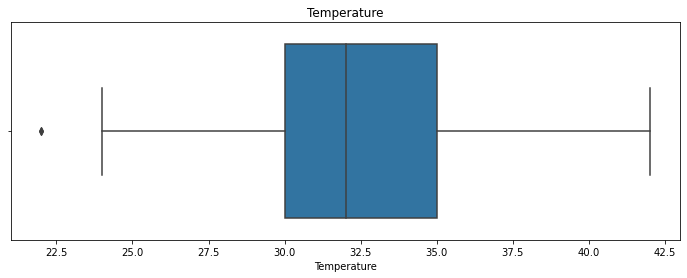

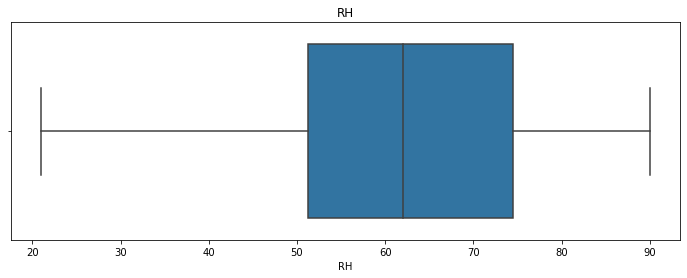

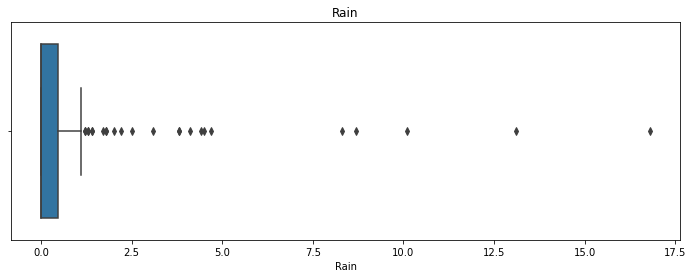

<Figure size 864x288 with 0 Axes>

In [1056]:
for col in data.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(data = data, x=col)
    plt.title(col)

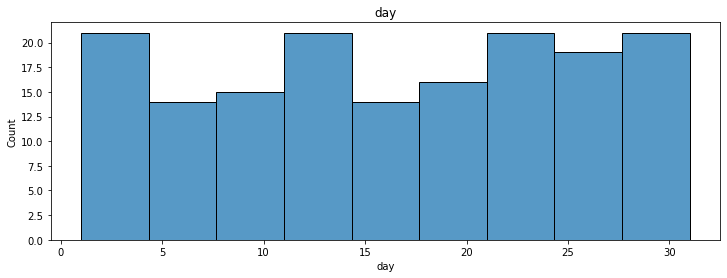

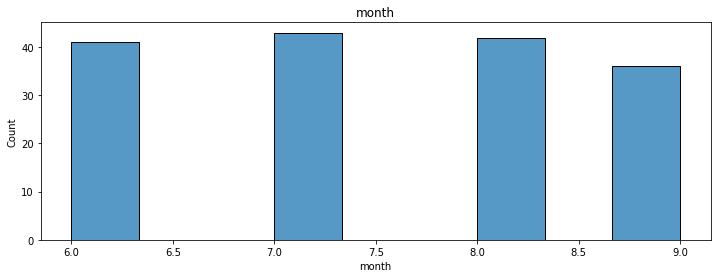

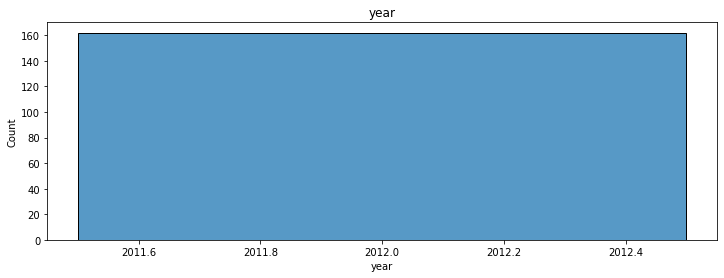

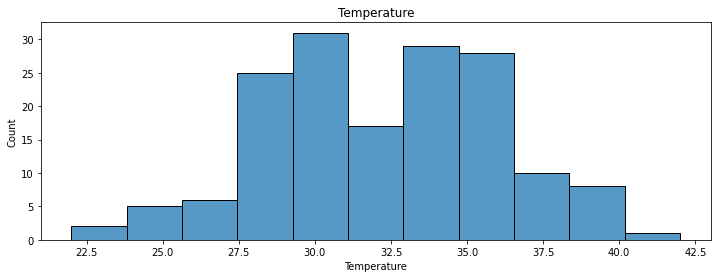

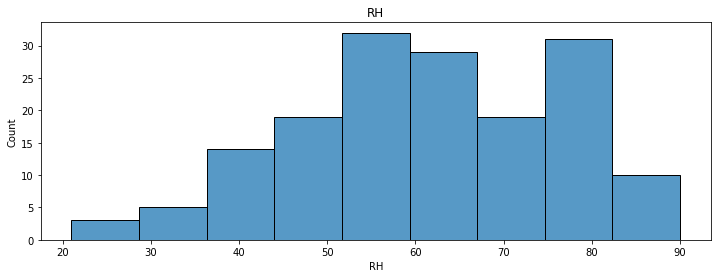

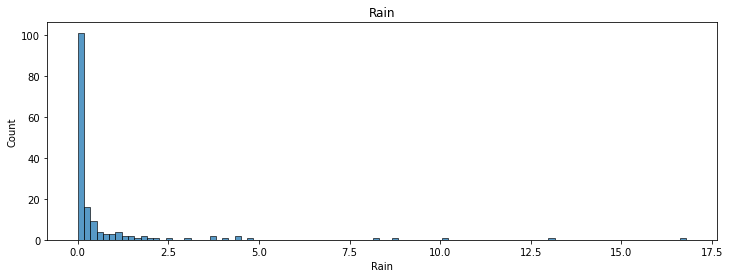

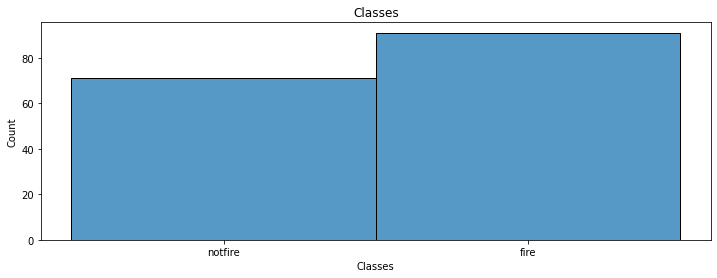

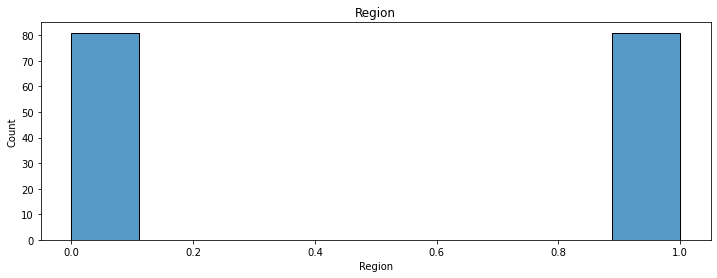

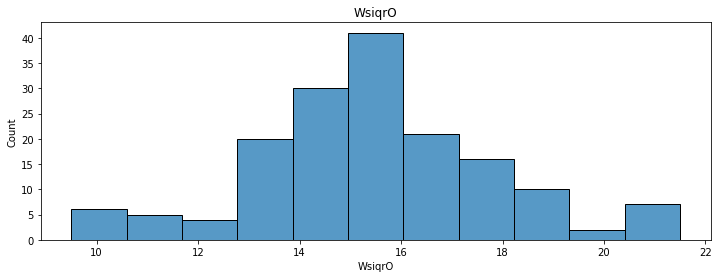

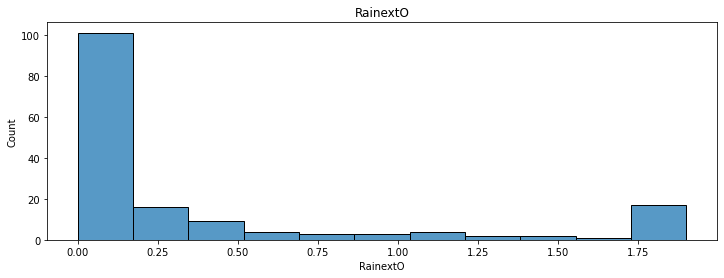

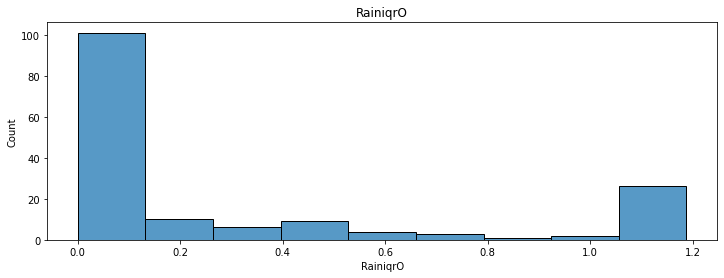

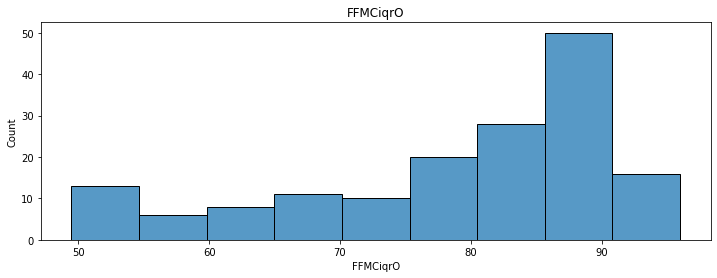

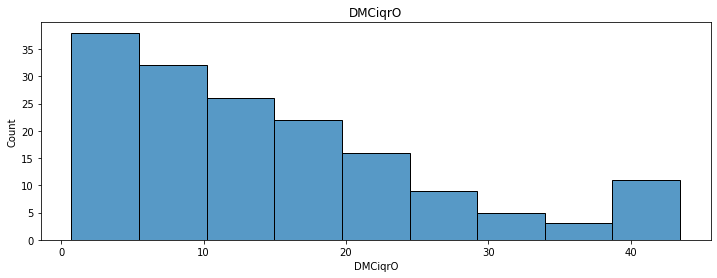

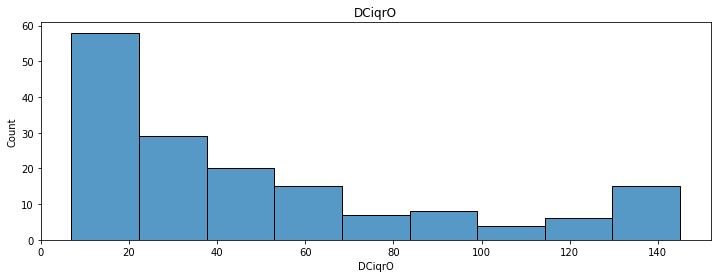

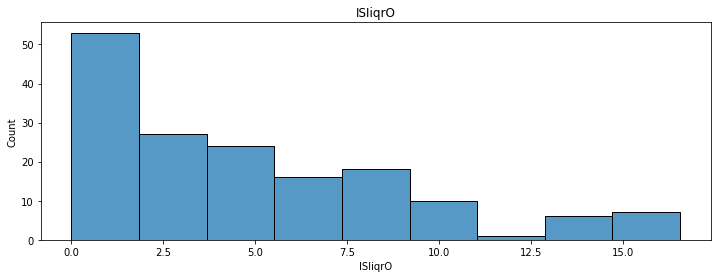

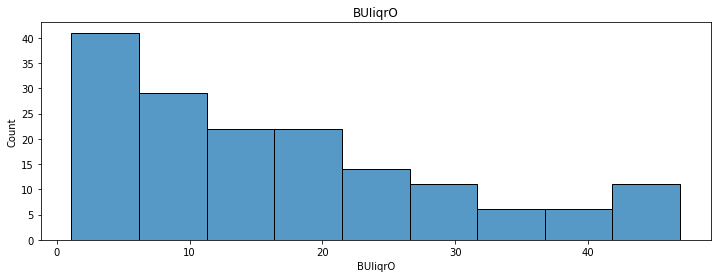

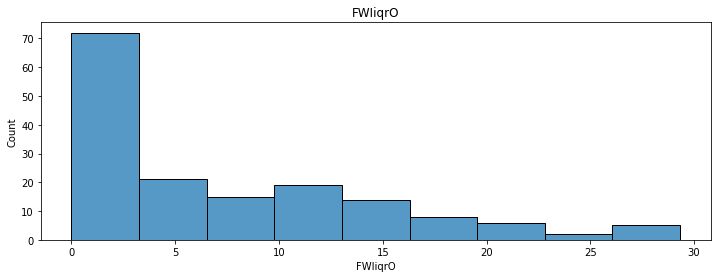

In [898]:
for col in data.columns:
    plt.figure(figsize=(12,4))
    sns.histplot(data[col])
    plt.title(col)

In [1057]:
data.month.unique()

array([7, 6, 9, 8], dtype=int64)

# HAndling CAtegorical Feature

In [1058]:
categorical_features

['Classes']

In [1059]:
data['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [1060]:
## One Hot Encoding

def nominal_one_hot_encoding(df, variable):
    '''
    Performs One Hot Encoding
    '''
    df_dumm = pd.get_dummies(df[variable],drop_first=True,prefix=variable)
    df = pd.concat([df,df_dumm],axis=1)
    df.drop(axis=1,columns=[variable],inplace=True)
    return df

In [1061]:
data = nominal_one_hot_encoding(df = data,variable = 'Classes')
data

day  month  year  Temperature  RH  Rain  Region  WsiqrO  RainextO  \
0     11      7  2012           33  76   0.0     0.0    14.0       0.0   
1     14      6  2012           30  78   0.5     0.0    20.0       0.5   
2      4      6  2012           25  89   2.5     0.0    13.0       1.9   
3     16      6  2012           29  87   0.4     1.0    15.0       0.4   
4     25      6  2012           31  64   0.0     0.0    15.0       0.0   
..   ...    ...   ...          ...  ..   ...     ...     ...       ...   
157    7      8  2012           32  69   0.0     0.0    16.0       0.0   
158   11      8  2012           40  31   0.0     1.0    15.0       0.0   
159   26      9  2012           31  54   0.0     0.0    11.0       0.0   
160   18      7  2012           31  68   0.0     0.0    14.0       0.0   
161   22      7  2012           32  48   0.0     1.0    18.0       0.0   

     RainiqrO  FFMCiqrO  DMCiqrO  DCiqrO  ISIiqrO  BUIiqrO  FWIiqrO  \
0      0.0000   81.1000    8.100    18.7     2.60      8.1      2.2   
1      0.5000   59.0000    4.600     7.8     1.00      4.4      0.4   
2      1.1875   49.4625    1.300     6.9     0.00      1.7      0.0   
3      0.4000   49.4625    4.200     8.0     0.20      4.1      0.1   
4      0.0000   86.7000   14.200    63.8     5.70     18.3      8.4   
..        ...       ...      ...     ...      ...      ...      ...   
157    0.0000   86.5000   15.500    48.6     5.50     17.2      8.0   
158    0.0000   94.2000   22.500    46.3    16.55     22.4     21.6   
159    0.0000   82.0000    6.000    16.3     2.50      6.2      1.7   
160    0.0000   85.4000   12.100    43.1     4.60     14.2      6.0   
161    0.0000   91.5000   43.475    90.1    13.20     44.0     25.4   

     Classes_notfire  
0                  1  
1                  1  
2                  1  
3                  1  
4                  0  
..               ...  
157                0  
158                0  
159                1  
160                0  
161                0  

[162 rows x 17 columns]

In [1062]:
dataset= data.copy()
unique_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())==len(dataset)]
print("Unique feature Count {} out of {} features".format(len(unique_feature),len(dataset.columns)))
print(unique_feature)
# seperating the Numerical and Categorical Variables:
numerical_features = [fea for fea in dataset.columns if dataset[fea].dtype != 'O']
print("\n Numerical feature Count {}".format(len(numerical_features)))
print(numerical_features)
unique_feature=[feature for feature in numerical_features if len(dataset[feature].unique())==len(dataset)]
print("\n Unique feature Count {} out of {} features".format(len(unique_feature),len(numerical_features)))
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<5 and feature not in unique_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+unique_feature]
print("\n Continuous feature Count {} out of {} features".format(len(continuous_feature),len(numerical_features)))
print(continuous_feature)
print("\n Discrete Variables Count: {} out of {} features".format(len(discrete_feature),len(numerical_features)))
print(discrete_feature)
data = dataset.copy()
pd.DataFrame(list(zip(discrete_feature,[len(data[feature].unique()) for feature in discrete_feature], [data[str(feature)].unique() for feature in discrete_feature])), columns=['Discrete Features','No of Unique Values', 'Unique Values'])



Unique feature Count 0 out of 17 features
[]

 Numerical feature Count 17
['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Region', 'WsiqrO', 'RainextO', 'RainiqrO', 'FFMCiqrO', 'DMCiqrO', 'DCiqrO', 'ISIiqrO', 'BUIiqrO', 'FWIiqrO', 'Classes_notfire']

 Unique feature Count 0 out of 17 features

 Continuous feature Count 13 out of 17 features
['day', 'Temperature', 'RH', 'Rain', 'WsiqrO', 'RainextO', 'RainiqrO', 'FFMCiqrO', 'DMCiqrO', 'DCiqrO', 'ISIiqrO', 'BUIiqrO', 'FWIiqrO']

 Discrete Variables Count: 4 out of 17 features
['month', 'year', 'Region', 'Classes_notfire']


Discrete Features  No of Unique Values Unique Values
0             month                    4  [7, 6, 9, 8]
1              year                    1        [2012]
2            Region                    2    [0.0, 1.0]
3   Classes_notfire                    2        [1, 0]

In [1063]:
categorical_features = [fea for fea in dataset.columns if dataset[fea].dtype == 'O']
print("Categorical feature Count {}".format(len(categorical_features)))
print(categorical_features)
data = dataset.copy()
pd.DataFrame(list(zip(categorical_features,[len(data[feature].unique()) for feature in categorical_features], [data[str(feature)].unique() for feature in categorical_features])), columns=['Categorical Features','No. of Categories', 'Categories'])

Categorical feature Count 0
[]


Empty DataFrame
Columns: [Categorical Features, No. of Categories, Categories]
Index: []

# Tranformation of Data

## Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [1064]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in numerical_features:
    dataToTest = data[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[numerical_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

Column Name Shapiro Hypothesis Result
0               day  Not Normally Distributed
1             month  Not Normally Distributed
2              year      Normally Distributed
3       Temperature      Normally Distributed
4                RH  Not Normally Distributed
5              Rain  Not Normally Distributed
6            Region  Not Normally Distributed
7            WsiqrO  Not Normally Distributed
8          RainextO  Not Normally Distributed
9          RainiqrO  Not Normally Distributed
10         FFMCiqrO  Not Normally Distributed
11          DMCiqrO  Not Normally Distributed
12           DCiqrO  Not Normally Distributed
13          ISIiqrO  Not Normally Distributed
14          BUIiqrO  Not Normally Distributed
15          FWIiqrO  Not Normally Distributed
16  Classes_notfire  Not Normally Distributed

# K^2 Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [1065]:
from scipy.stats import normaltest
normaltest_test = []
for column in numerical_features:
    dataToTest = data[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[numerical_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

Column Name normaltest Hypothesis Result
0               day     Not Normally Distributed
1             month     Not Normally Distributed
2              year     Not Normally Distributed
3       Temperature         Normally Distributed
4                RH         Normally Distributed
5              Rain     Not Normally Distributed
6            Region     Not Normally Distributed
7            WsiqrO         Normally Distributed
8          RainextO     Not Normally Distributed
9          RainiqrO     Not Normally Distributed
10         FFMCiqrO     Not Normally Distributed
11          DMCiqrO     Not Normally Distributed
12           DCiqrO     Not Normally Distributed
13          ISIiqrO     Not Normally Distributed
14          BUIiqrO     Not Normally Distributed
15          FWIiqrO     Not Normally Distributed
16  Classes_notfire     Not Normally Distributed

In [1066]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()


def plot_qq_plot(df,column):
    plt.figure(figsize=(40,7))
    plt.subplot(131)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))
    plt.subplot(132)
    stat.probplot(df[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.subplot(133)
    sns.scatterplot(x=df[column], y = data['Temperature'])
    plt.title(column)
    plt.show()
    

def transform_data(df,feature):
    plt.figure(figsize=(10,6))

    if 0 in data[feature].unique():  # 
        pass
    else:
        df[feature +'_log']=numpy.log(df[feature])
        print('----------------- Log Transformation -------------------')
        plot_qq_plot(df,feature +'_log')
        
        df[feature +'_reciprocal']=1/df[feature]
        print('----------------- Reciprocal Transformation -------------------')
        plot_qq_plot(df,feature +'_reciprocal')
        df[feature +'_square']=df[feature]**(1/2)
        print('----------------- Square Transformation -------------------')
        plot_qq_plot(df,feature +'_square')
        df[feature +'_exponential']=df[feature]**(1/1.2)
        print('----------------- Exponential Transformation -------------------')
        plot_qq_plot(df,feature +'_exponential')
        df[feature +'_Boxcox'],parameters=stat.boxcox(df[feature])
        print('----------------- Boxcox Transformation -------------------')
        plot_qq_plot(df,feature +'_Boxcox')
        plt.show()



def transform_data_nl(df,feature):
    plt.figure(figsize=(10,6))

    df[feature +'_square']=df[feature]**(1/2)
    print('----------------- Square Transformation -------------------')
    plot_qq_plot(df,feature +'_square')

    df[feature +'_exponential']=df[feature]**(1/1.2)
    print('----------------- Exponential Transformation -------------------')
    plot_qq_plot(df,feature +'_exponential')
    
    df[feature +'_Boxcox'],parameters=stat.boxcox(df[feature])
    print('----------------- Boxcox Transformation -------------------')
    plot_qq_plot(df,feature +'_Boxcox')
    plt.show()




In [1067]:
data.corr()['Temperature'].sort_values()

RH                -0.640282
Classes_notfire   -0.503021
RainextO          -0.398826
RainiqrO          -0.370476
Rain              -0.355614
WsiqrO            -0.323498
month             -0.053159
day                0.069888
Region             0.265069
DCiqrO             0.381636
BUIiqrO            0.484925
DMCiqrO            0.509677
FWIiqrO            0.577653
ISIiqrO            0.616460
FFMCiqrO           0.676236
Temperature        1.000000
year                    NaN
Name: Temperature, dtype: float64

# RH Tranformation

----------------- Original Distribution -------------------


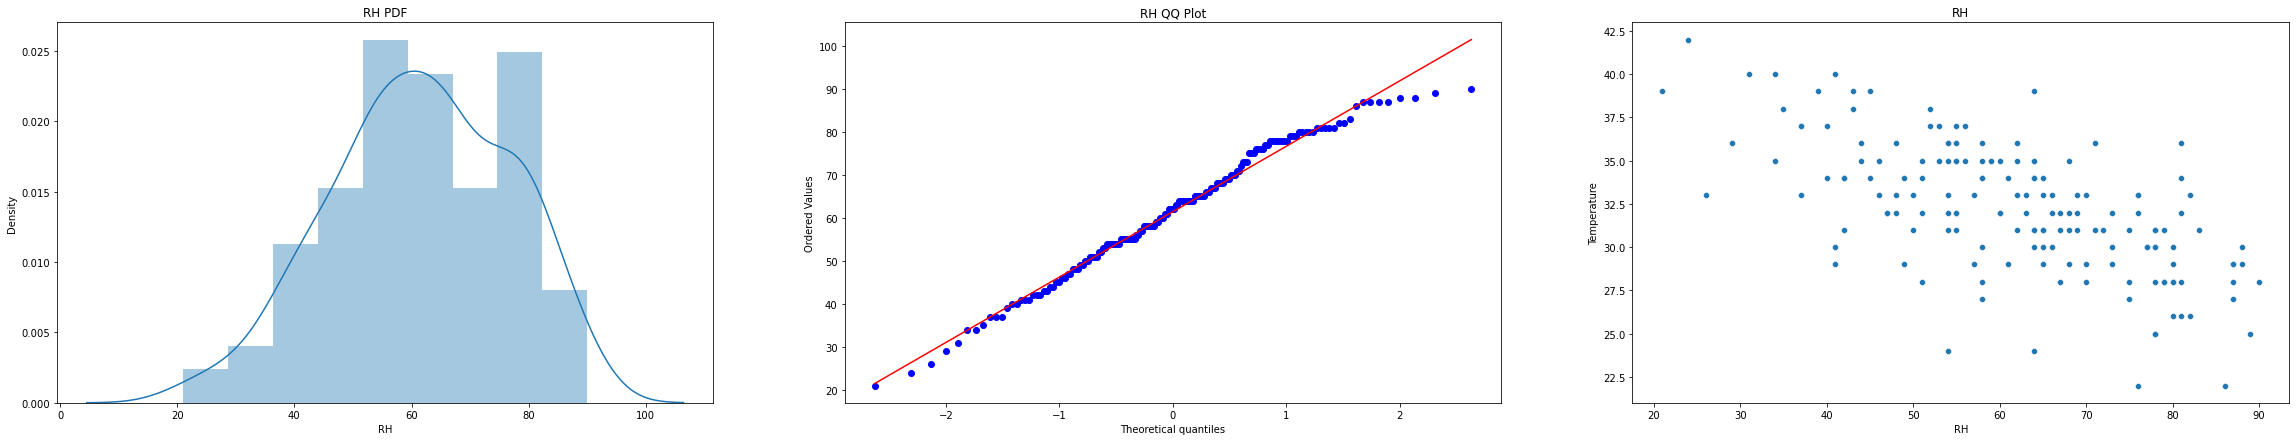

In [1068]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'RH')

# RH has Normal distribution

# FFMCiqrO Transformation

In [1069]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Region', 'WsiqrO',
       'RainextO', 'RainiqrO', 'FFMCiqrO', 'DMCiqrO', 'DCiqrO', 'ISIiqrO',
       'BUIiqrO', 'FWIiqrO', 'Classes_notfire'],
      dtype='object')

----------------- Original Distribution -------------------


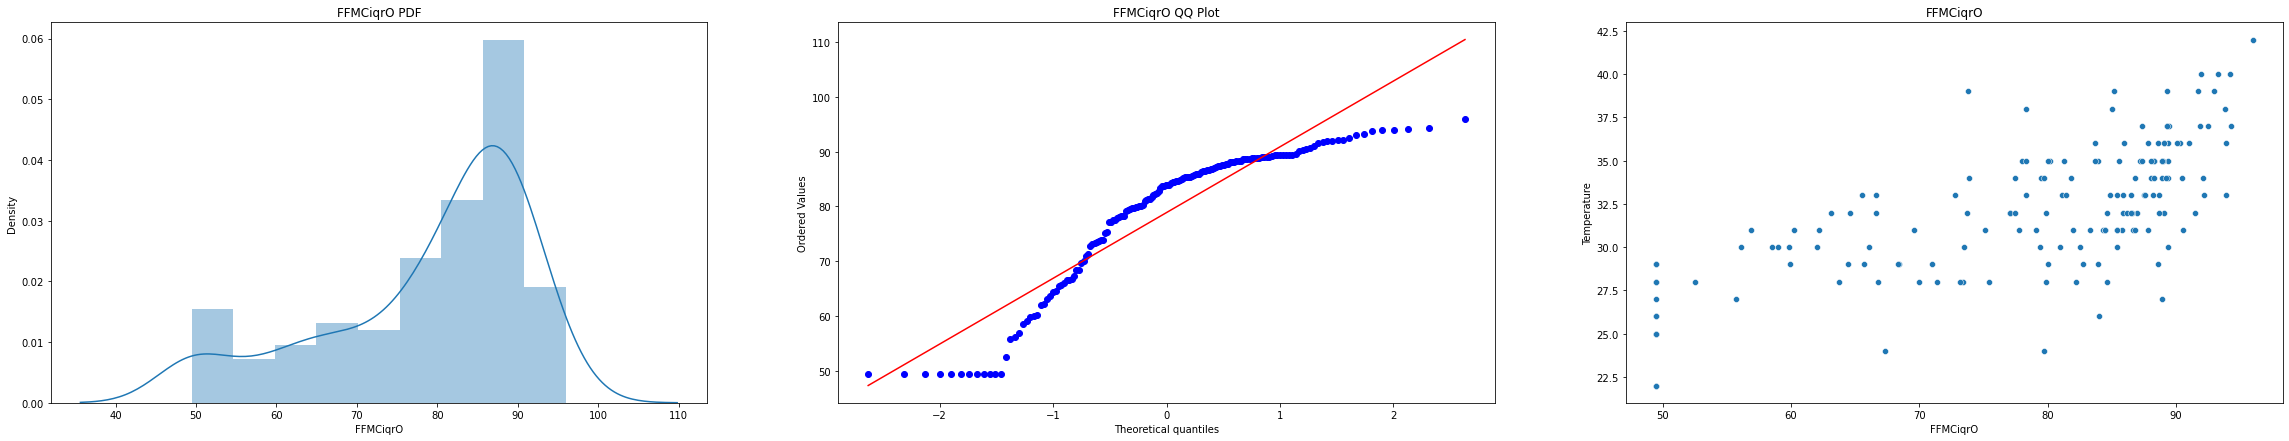

In [1070]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'FFMCiqrO')

----------------- Log Transformation -------------------


<Figure size 720x432 with 0 Axes>

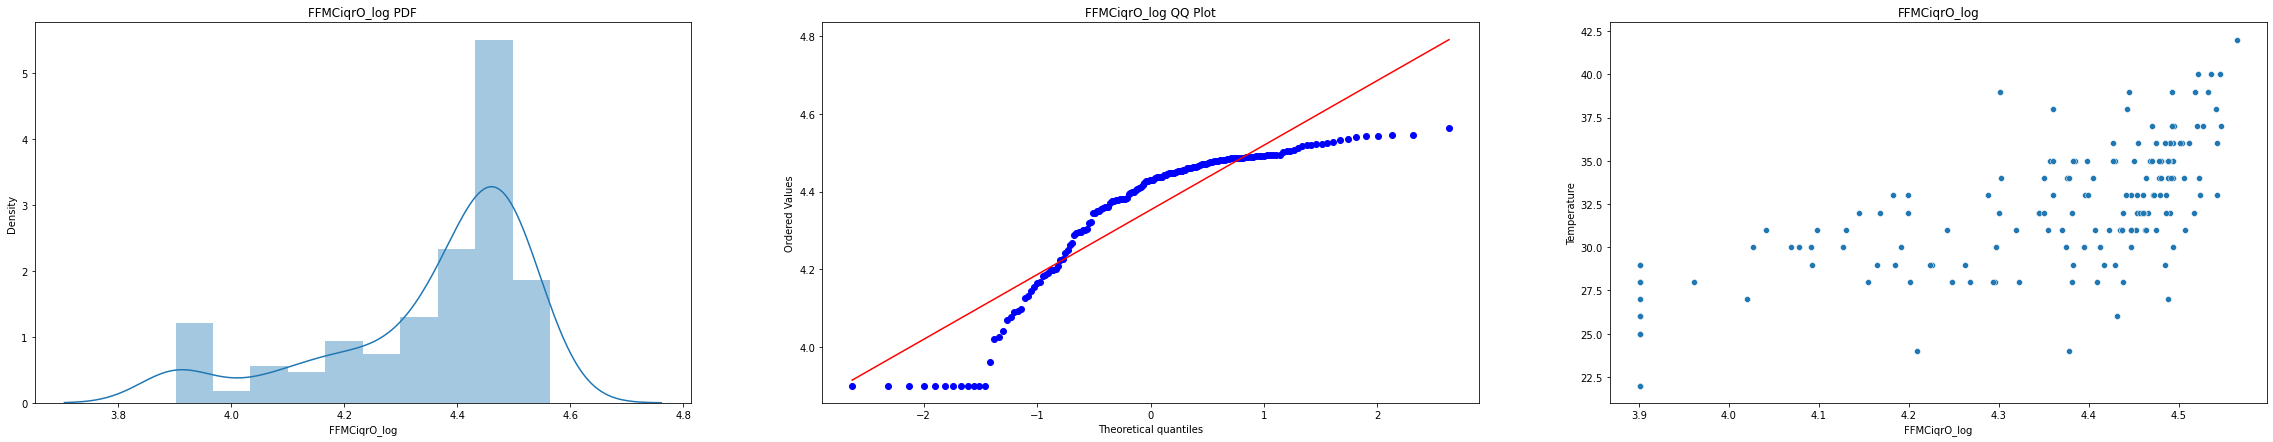

----------------- Reciprocal Transformation -------------------


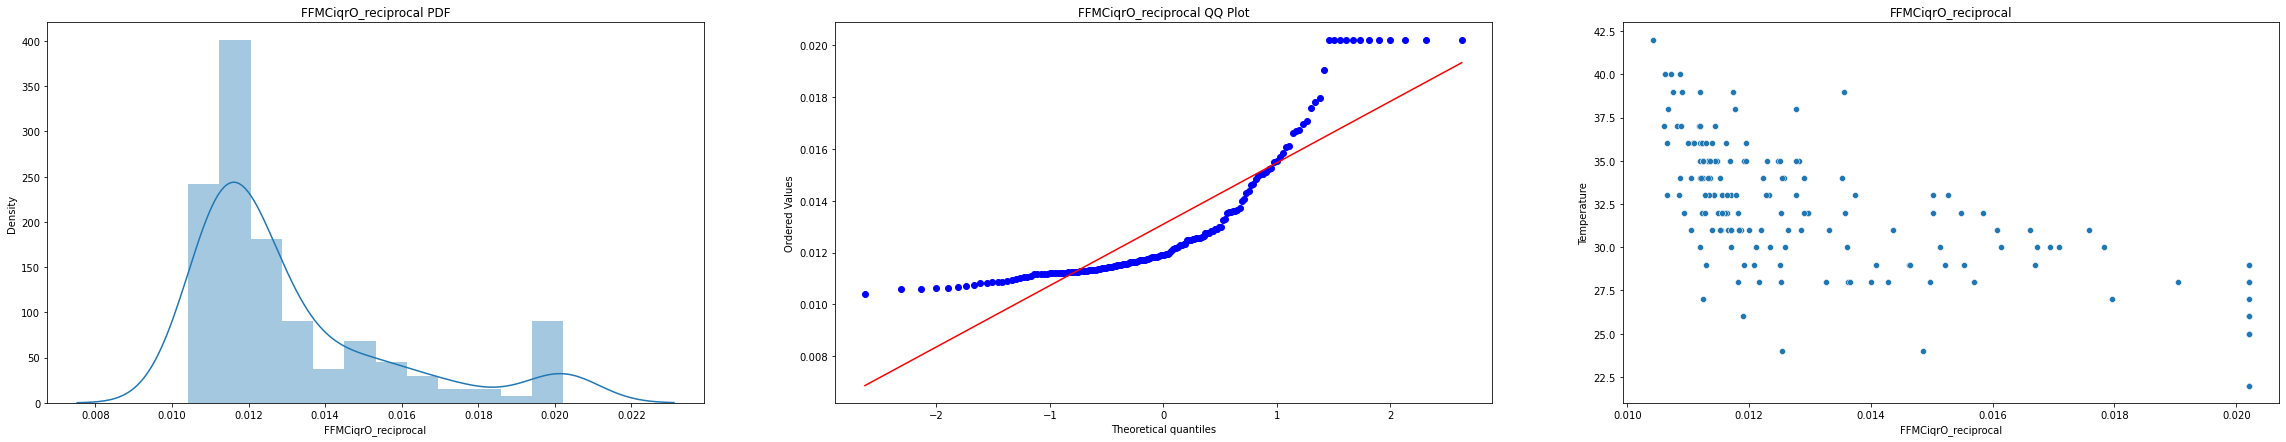

----------------- Square Transformation -------------------


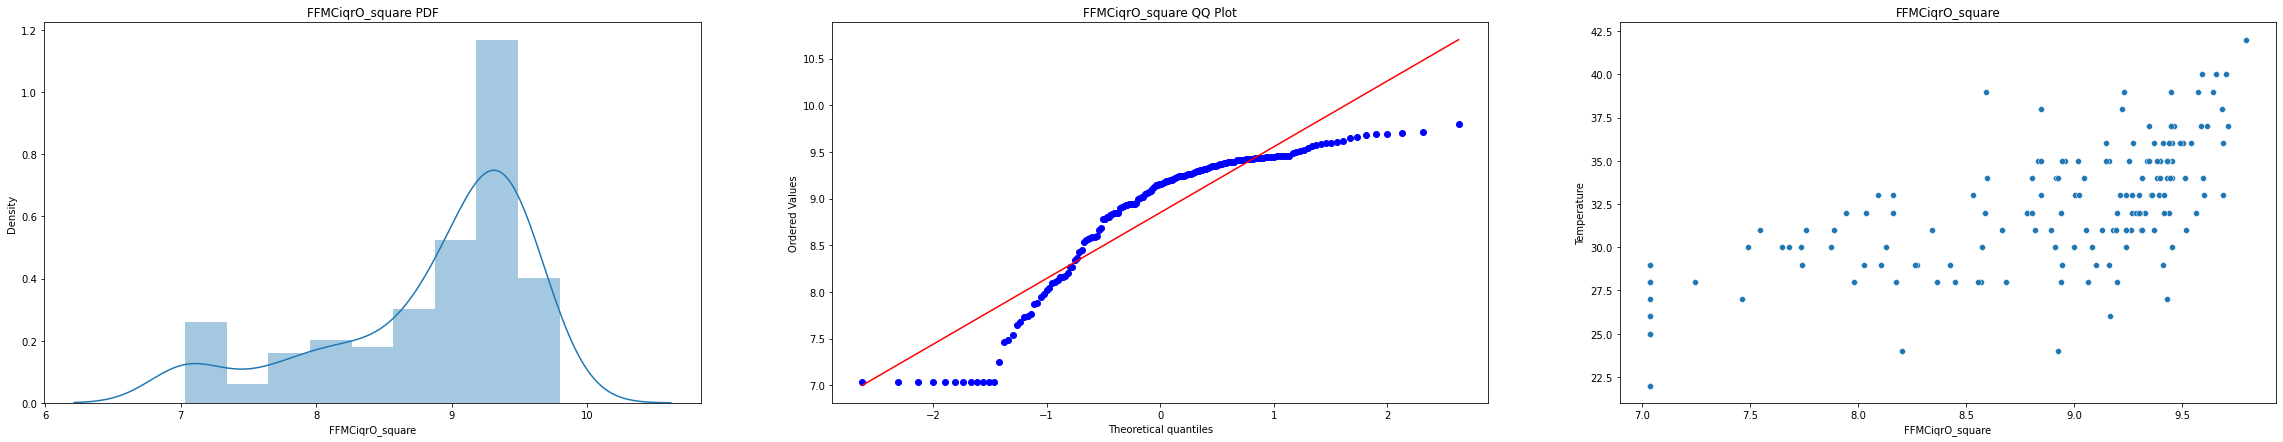

----------------- Exponential Transformation -------------------


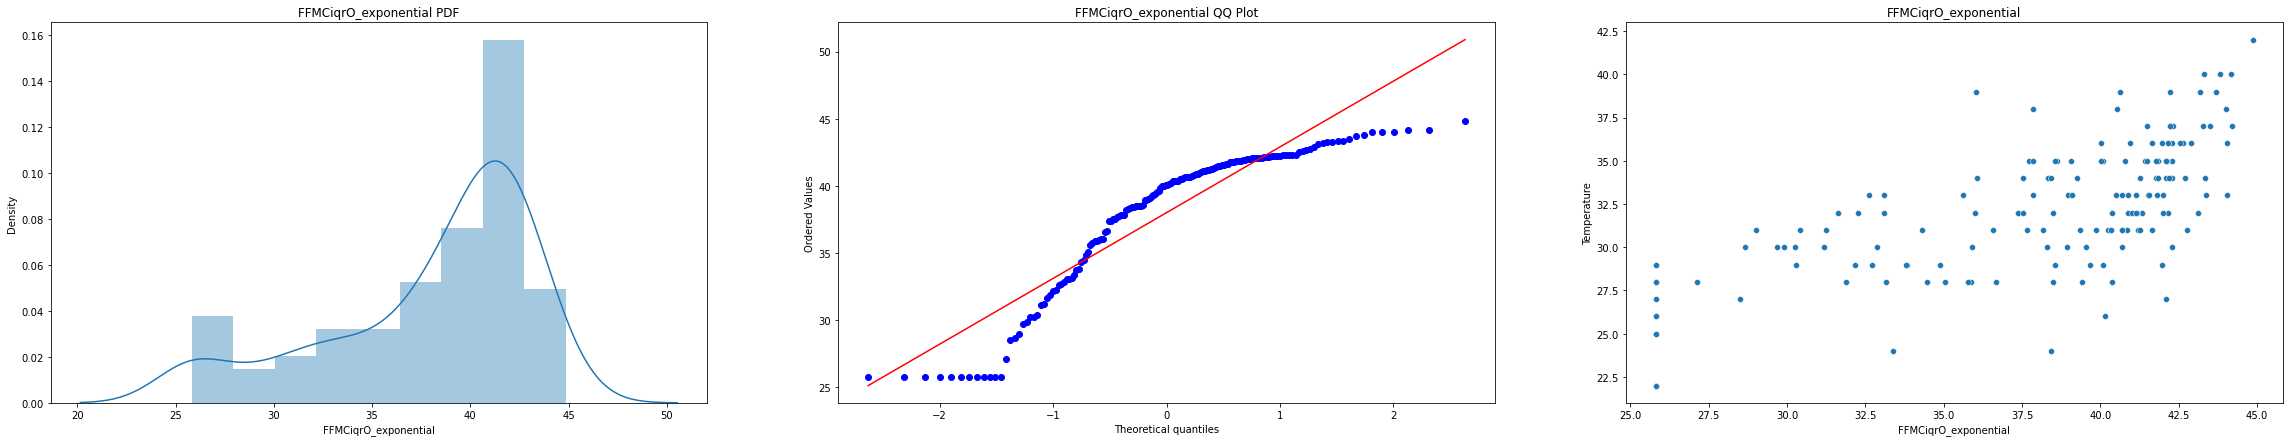

----------------- Boxcox Transformation -------------------


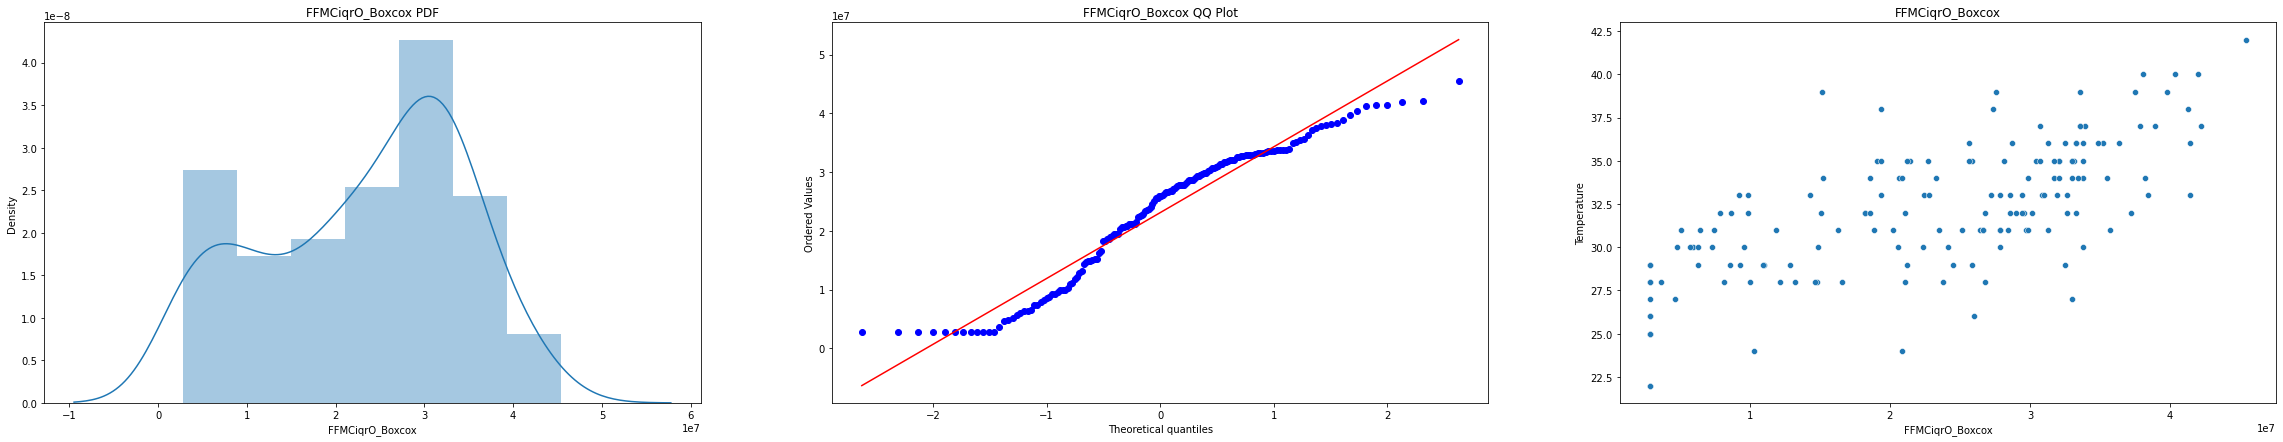

In [1071]:
import pylab
import scipy.stats as stat
transform_data(data,'FFMCiqrO')

In [1072]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Region', 'WsiqrO',
       'RainextO', 'RainiqrO', 'FFMCiqrO', 'DMCiqrO', 'DCiqrO', 'ISIiqrO',
       'BUIiqrO', 'FWIiqrO', 'Classes_notfire', 'FFMCiqrO_log',
       'FFMCiqrO_reciprocal', 'FFMCiqrO_square', 'FFMCiqrO_exponential',
       'FFMCiqrO_Boxcox'],
      dtype='object')

In [1073]:
data.drop(['FFMCiqrO_log',
       'FFMCiqrO_reciprocal', 'FFMCiqrO_square', 'FFMCiqrO_exponential','FFMCiqrO'],axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Region', 'WsiqrO',
       'RainextO', 'RainiqrO', 'DMCiqrO', 'DCiqrO', 'ISIiqrO', 'BUIiqrO',
       'FWIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox'],
      dtype='object')

# FFMC boxcox perform well.

# ISIiqrO TRansformation

----------------- Original Distribution -------------------


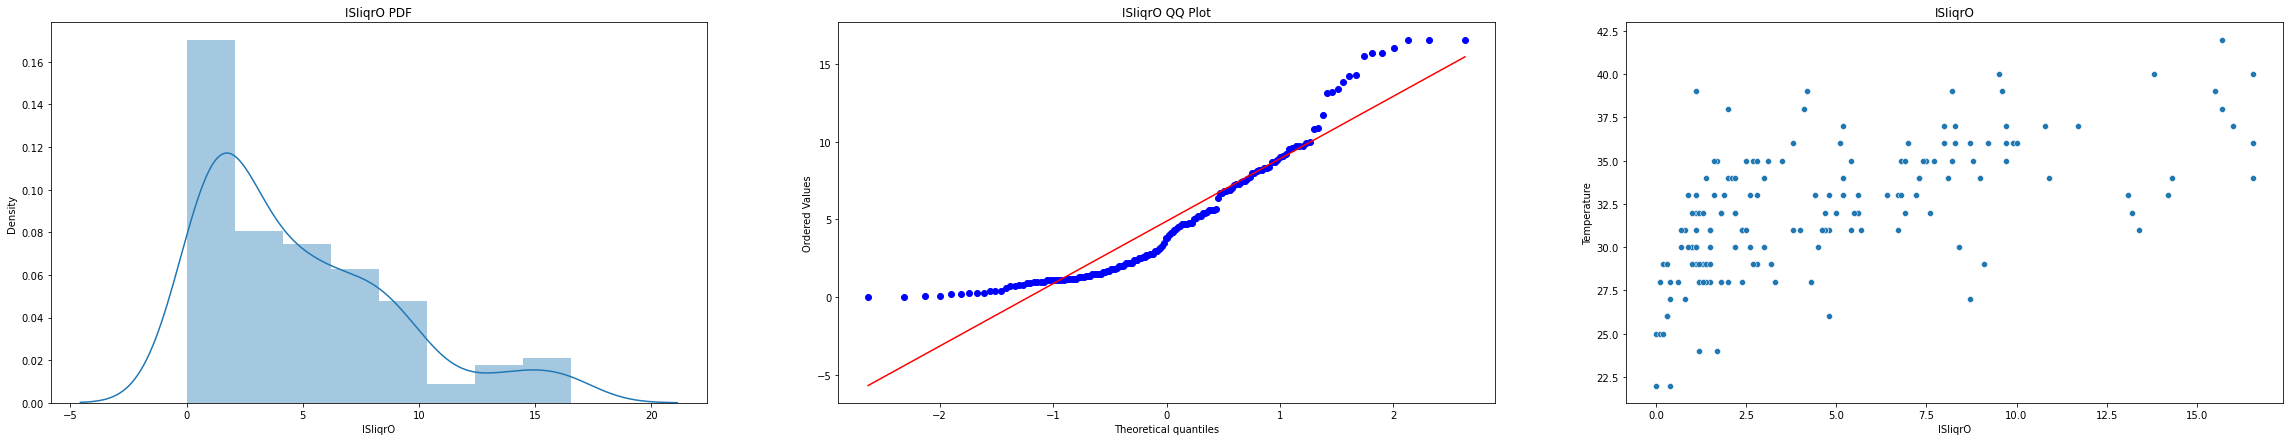

In [1074]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'ISIiqrO')

In [916]:
#data[data['ISIiqrO']<=0]

day  month  year  Temperature  RH  Rain  Region  WsiqrO  RainextO  \
2     4      6  2012           25  89   2.5     0.0    13.0       1.9   
53    2      9  2012           22  86  10.1     0.0    15.0       1.9   

    RainiqrO  DMCiqrO  DCiqrO  ISIiqrO  BUIiqrO  FWIiqrO  Classes_notfire  \
2     1.1875      1.3     6.9      0.0      1.7      0.0                1   
53    1.1875      0.7     7.0      0.0      1.1      0.0                1   

    FFMCiqrO_Boxcox  
2      2.849455e+06  
53     2.849455e+06

In [917]:
#data.ISIiqrO.unique()

array([ 2.6 ,  1.  ,  0.  ,  0.2 ,  5.7 ,  1.1 ,  6.8 ,  8.7 ,  2.  ,
        1.8 ,  0.9 ,  8.3 ,  8.2 ,  4.8 ,  7.5 ,  8.8 ,  4.1 ,  4.7 ,
        2.2 ,  1.5 ,  1.2 ,  0.3 ,  0.4 ,  7.6 ,  5.2 ,  3.  ,  3.2 ,
        3.8 ,  4.5 , 16.55,  1.7 ,  6.7 ,  5.1 ,  4.3 ,  1.4 ,  9.6 ,
        4.  ,  5.4 ,  1.6 , 11.7 ,  2.1 ,  2.4 ,  1.3 ,  0.1 ,  6.9 ,
        2.8 ,  7.7 ,  0.8 ,  5.6 ,  1.9 ,  9.7 ,  0.7 ,  8.4 ,  6.4 ,
        9.  , 14.3 ,  3.5 ,  0.6 , 13.1 ,  7.3 , 15.7 , 13.4 ,  2.7 ,
        4.2 , 13.8 , 16.  ,  3.1 ,  3.3 ,  9.1 ,  5.  ,  8.  ,  7.  ,
        7.2 ,  9.9 ,  9.5 , 10.  ,  2.5 , 10.9 ,  9.2 , 14.2 , 15.5 ,
        7.4 ,  4.4 ,  8.1 , 10.8 ,  5.5 ,  4.6 , 13.2 ])

In [1075]:
#data[data.ISIiqrO<=0]=0.1
data[data['ISIiqrO']<=0]

day  month  year  Temperature  RH  Rain  Region  WsiqrO  RainextO  \
2     4      6  2012           25  89   2.5     0.0    13.0       1.9   
53    2      9  2012           22  86  10.1     0.0    15.0       1.9   

    RainiqrO  DMCiqrO  DCiqrO  ISIiqrO  BUIiqrO  FWIiqrO  Classes_notfire  \
2     1.1875      1.3     6.9      0.0      1.7      0.0                1   
53    1.1875      0.7     7.0      0.0      1.1      0.0                1   

    FFMCiqrO_Boxcox  
2      2.849455e+06  
53     2.849455e+06

----------------- Square Transformation -------------------


<Figure size 720x432 with 0 Axes>

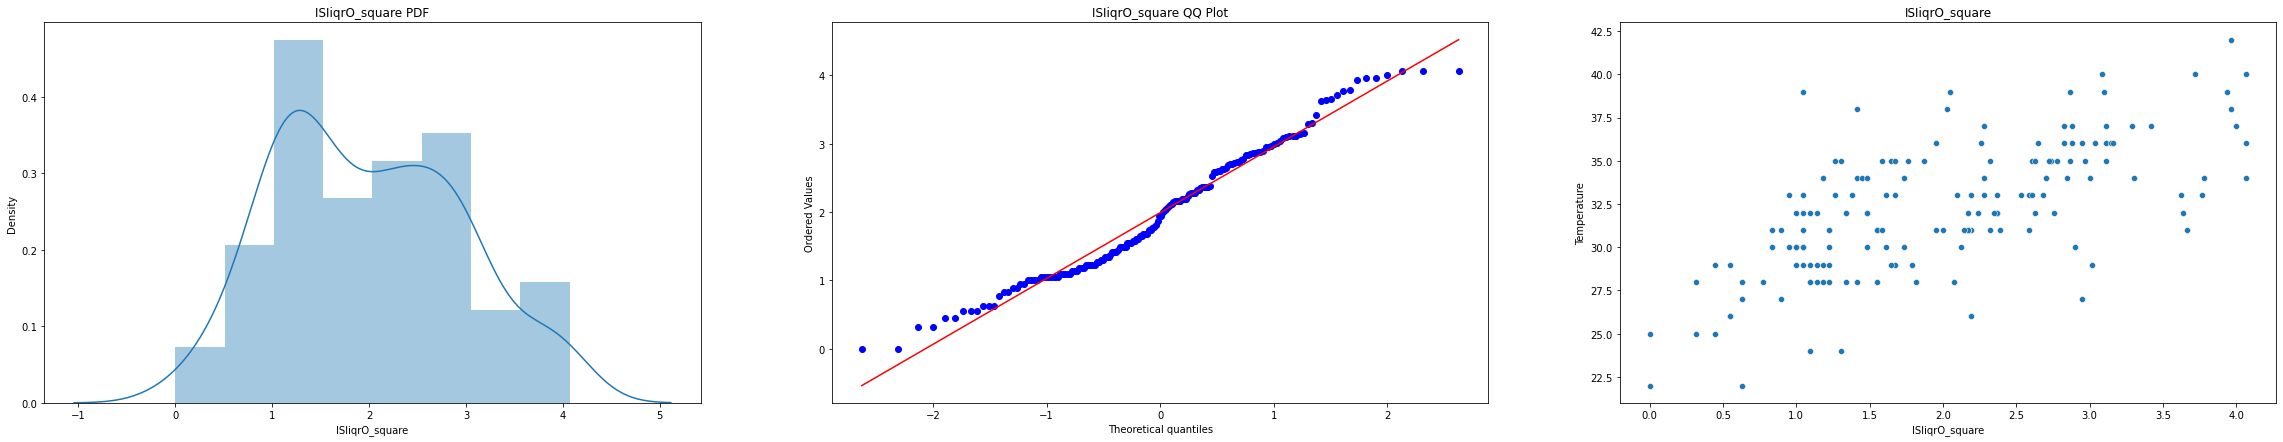

----------------- Exponential Transformation -------------------


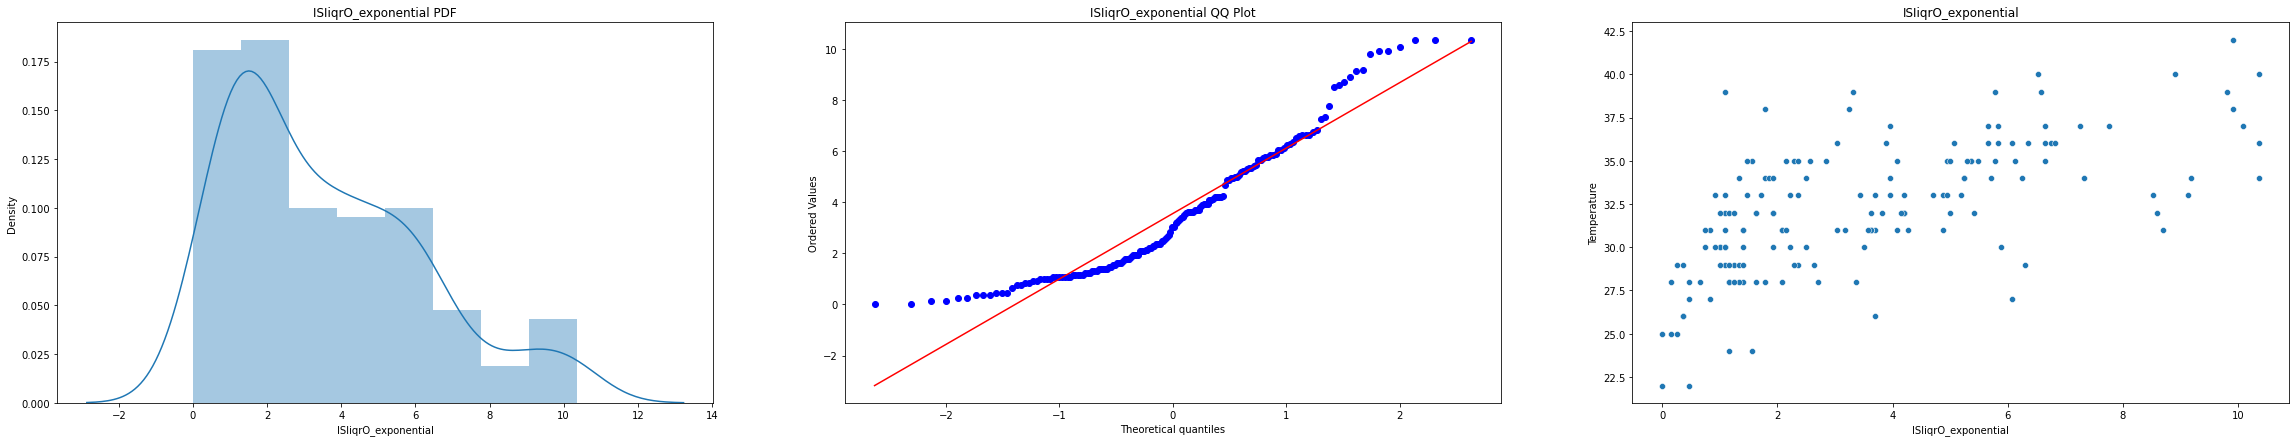

ValueError: Data must be positive.

In [1077]:
import pylab
import scipy.stats as stat
transform_data_nl(data,'ISIiqrO')

In [1078]:
data.month.unique()

array([7, 6, 9, 8], dtype=int64)

In [1079]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Region', 'WsiqrO',
       'RainextO', 'RainiqrO', 'DMCiqrO', 'DCiqrO', 'ISIiqrO', 'BUIiqrO',
       'FWIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox', 'ISIiqrO_square',
       'ISIiqrO_exponential'],
      dtype='object')

In [1080]:
data.drop(['ISIiqrO_exponential','ISIiqrO'],axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Region', 'WsiqrO',
       'RainextO', 'RainiqrO', 'DMCiqrO', 'DCiqrO', 'BUIiqrO', 'FWIiqrO',
       'Classes_notfire', 'FFMCiqrO_Boxcox', 'ISIiqrO_square'],
      dtype='object')

In [1081]:
data.corr()['Temperature'].sort_values()

RH                -0.640282
Classes_notfire   -0.503021
RainextO          -0.398826
RainiqrO          -0.370476
Rain              -0.355614
WsiqrO            -0.323498
month             -0.053159
day                0.069888
Region             0.265069
DCiqrO             0.381636
BUIiqrO            0.484925
DMCiqrO            0.509677
FWIiqrO            0.577653
ISIiqrO_square     0.664173
FFMCiqrO_Boxcox    0.685968
Temperature        1.000000
year                    NaN
Name: Temperature, dtype: float64

# RAin

In [923]:
data.Rain.median()

0.0

In [924]:
#data[data['Rain']<=0] = 0.01
#data[data['RainiqrO']<=0] = 0.01
#data[data['RainextO']<=0] = 0.01

----------------- Original Distribution -------------------


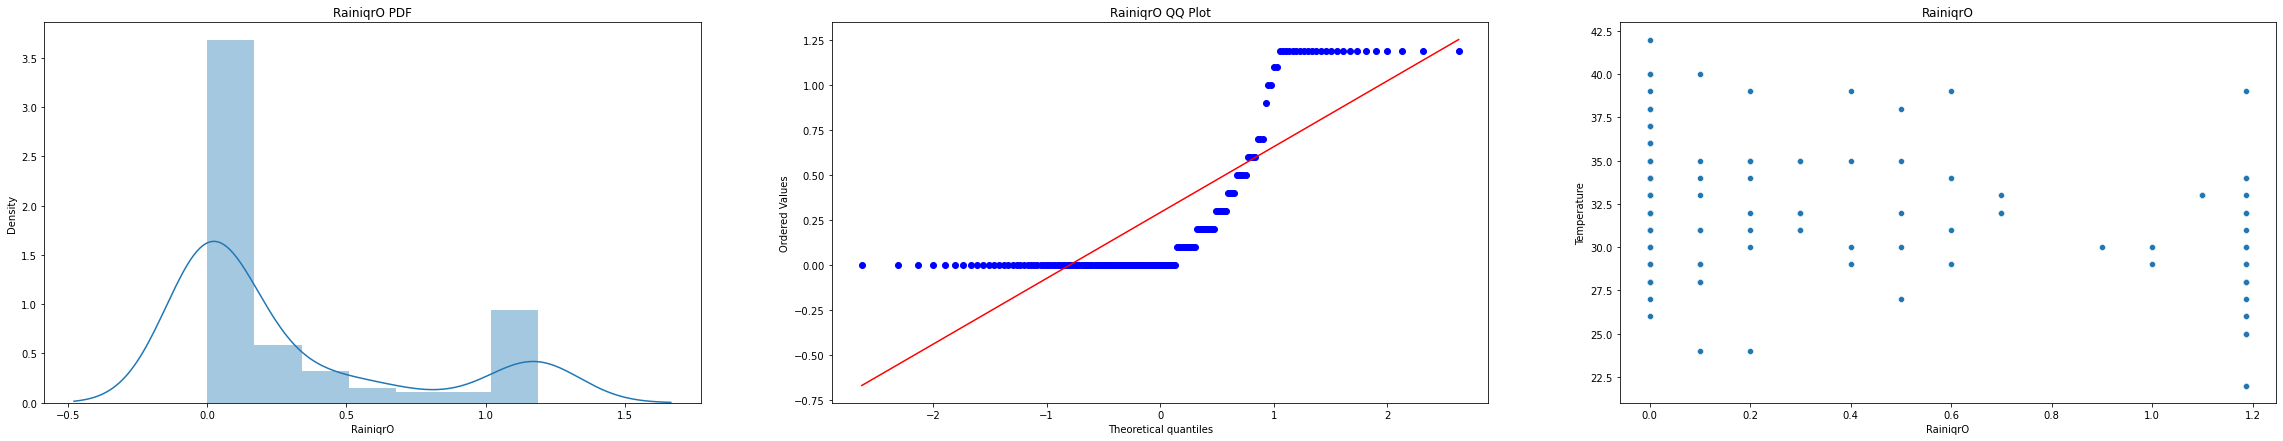

In [1083]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'RainiqrO')

----------------- Square Transformation -------------------


<Figure size 720x432 with 0 Axes>

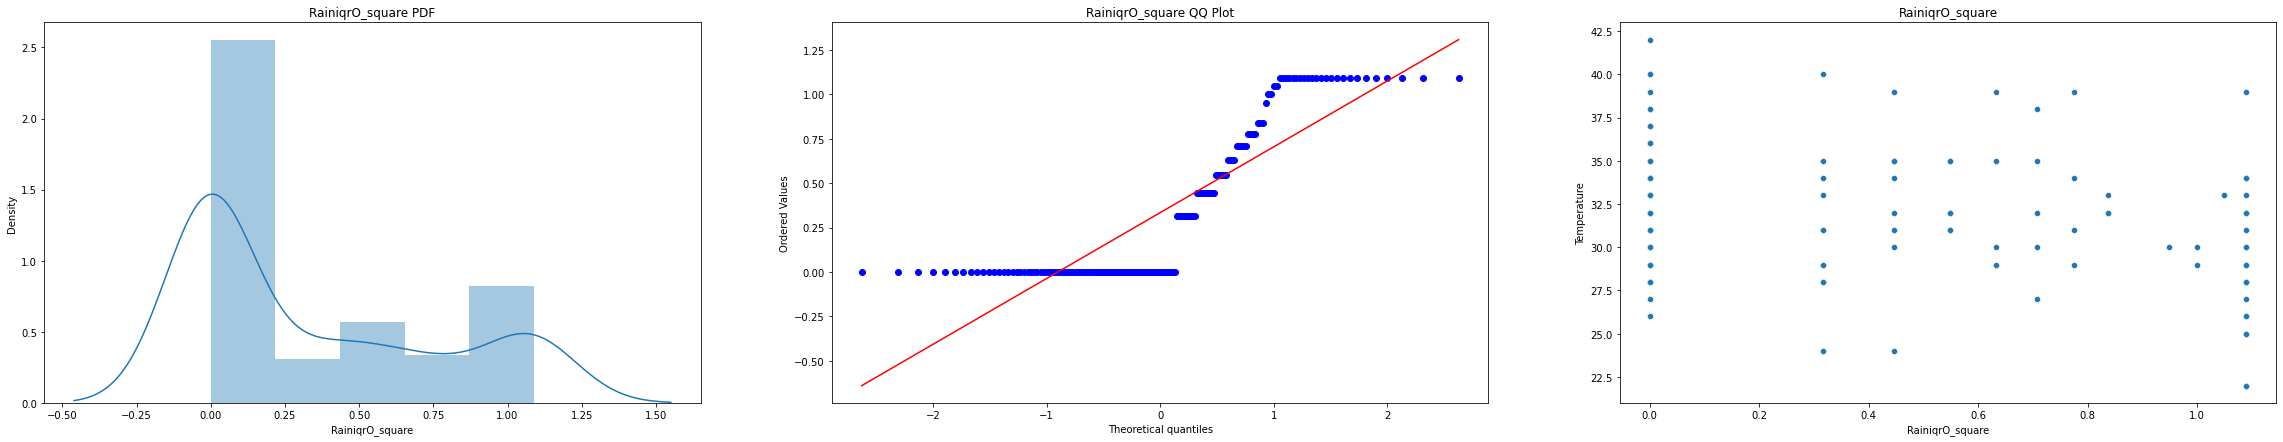

----------------- Exponential Transformation -------------------


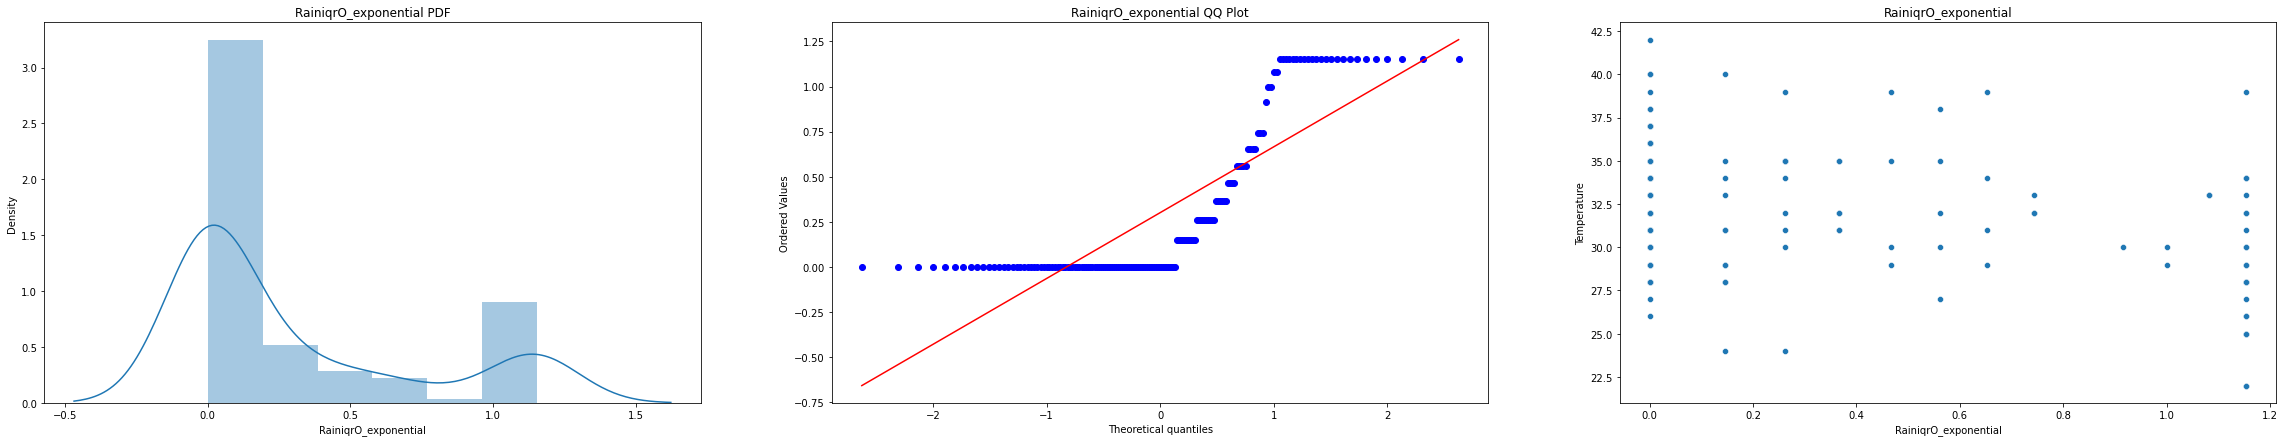

ValueError: Data must be positive.

In [1084]:
import pylab
import scipy.stats as stat
transform_data_nl(data,'RainiqrO')

In [1088]:
data.columns




Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Region', 'WsiqrO',
       'RainextO', 'RainiqrO', 'DMCiqrO', 'DCiqrO', 'BUIiqrO', 'FWIiqrO',
       'Classes_notfire', 'FFMCiqrO_Boxcox', 'ISIiqrO_square',
       'RainiqrO_square', 'RainiqrO_exponential'],
      dtype='object')

In [1089]:
data.drop(['Rain','RainextO','RainiqrO','RainiqrO_square', 'RainiqrO_exponential'],axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DMCiqrO', 'DCiqrO', 'BUIiqrO', 'FWIiqrO', 'Classes_notfire',
       'FFMCiqrO_Boxcox', 'ISIiqrO_square'],
      dtype='object')

----------------- Original Distribution -------------------


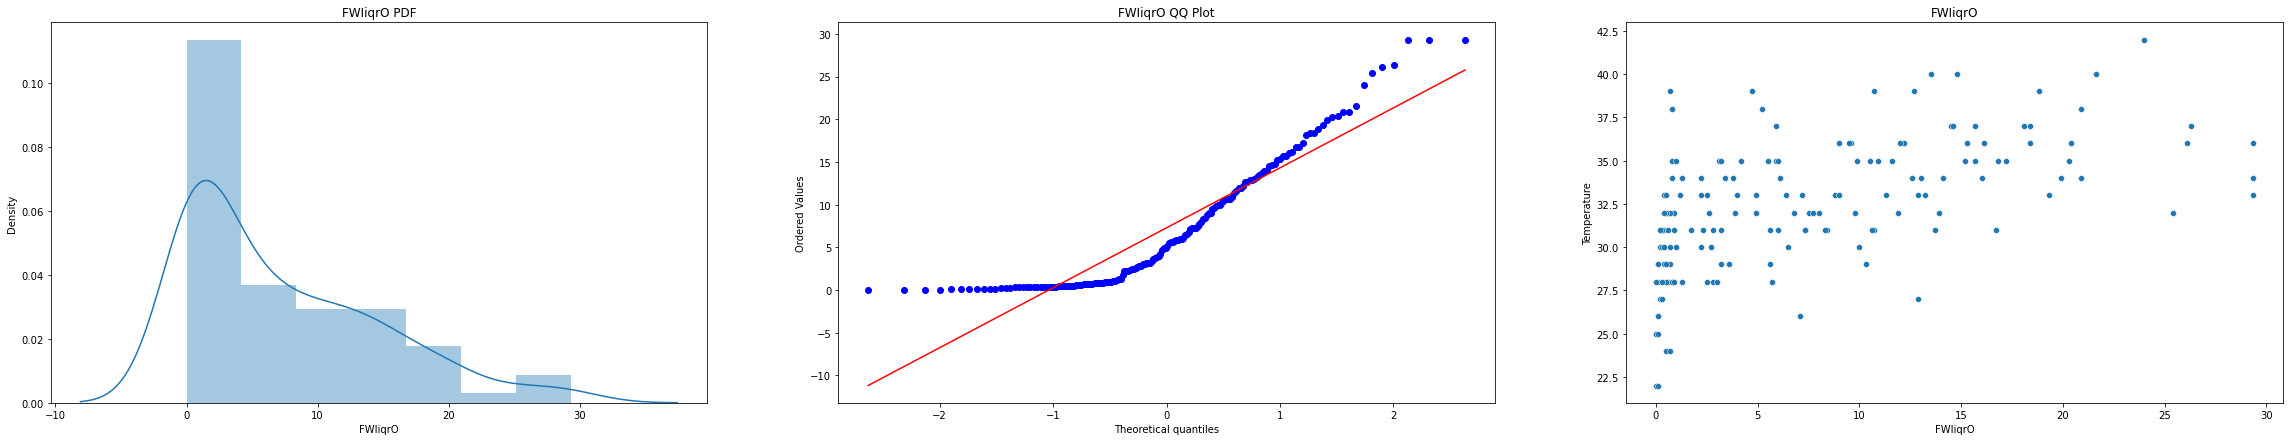

In [1090]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'FWIiqrO')

In [1091]:
data.FWIiqrO.median()

5.050000000000001

In [604]:
#data[data.FWIiqrO <=0]=0.01
#data[data.FWIiqrO <=0]

Empty DataFrame
Columns: [day, month, year, Temperature, RH, DMC, DC, BUI, Region, WsiqrO, FWIiqrO, Classes_notfire, FFMC_Boxcox, ISIiqrO_Boxcox]
Index: []

----------------- Square Transformation -------------------


<Figure size 720x432 with 0 Axes>

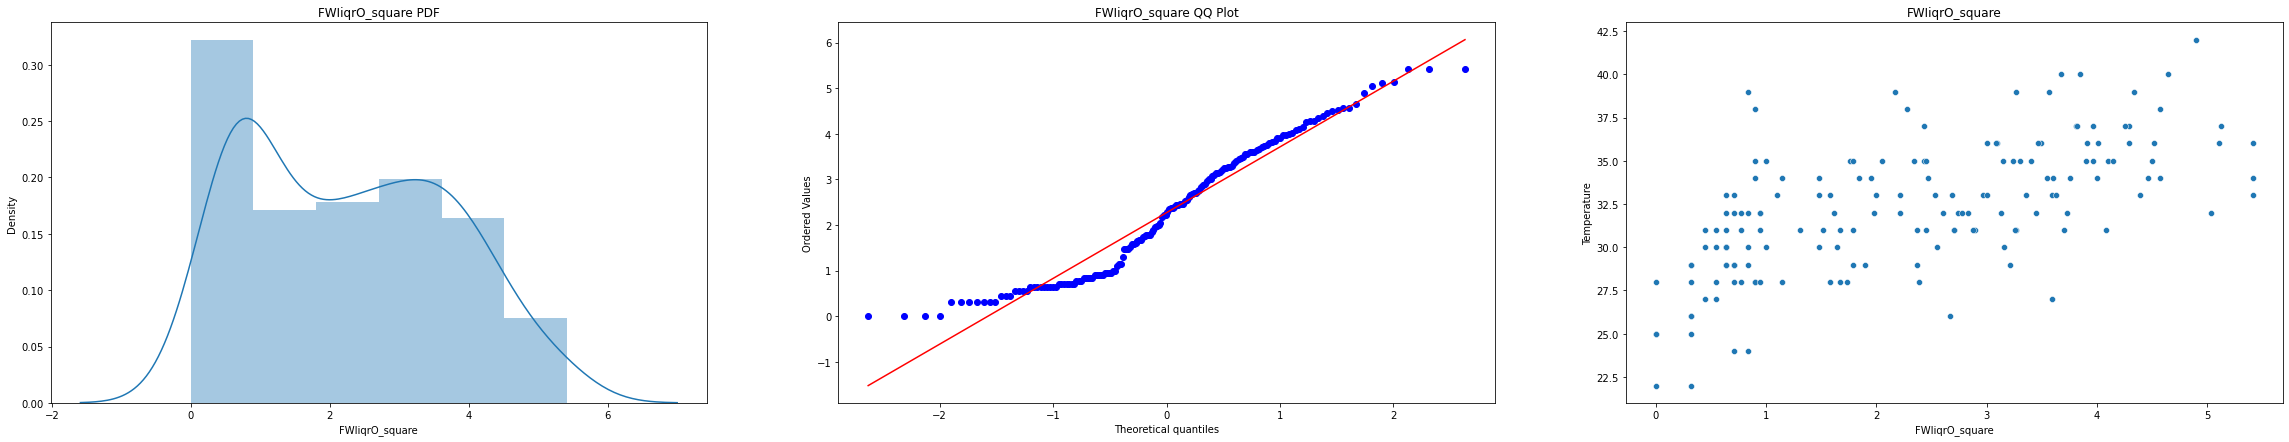

----------------- Exponential Transformation -------------------


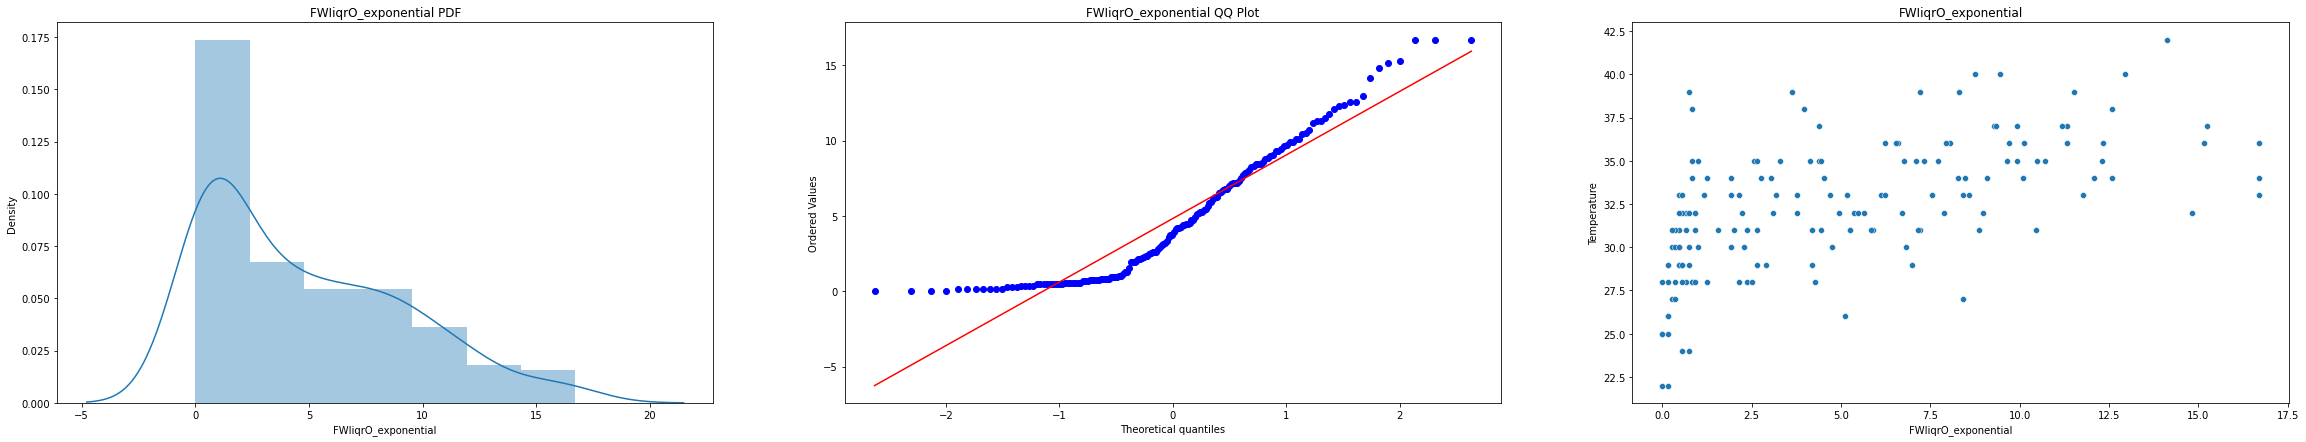

ValueError: Data must be positive.

In [1092]:
import pylab
import scipy.stats as stat
transform_data_nl(data,'FWIiqrO')

In [1093]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DMCiqrO', 'DCiqrO', 'BUIiqrO', 'FWIiqrO', 'Classes_notfire',
       'FFMCiqrO_Boxcox', 'ISIiqrO_square', 'FWIiqrO_square',
       'FWIiqrO_exponential'],
      dtype='object')

In [1094]:
data.drop(['FWIiqrO',
       'FWIiqrO_exponential'],axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DMCiqrO', 'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square'],
      dtype='object')

# DMC

----------------- Original Distribution -------------------


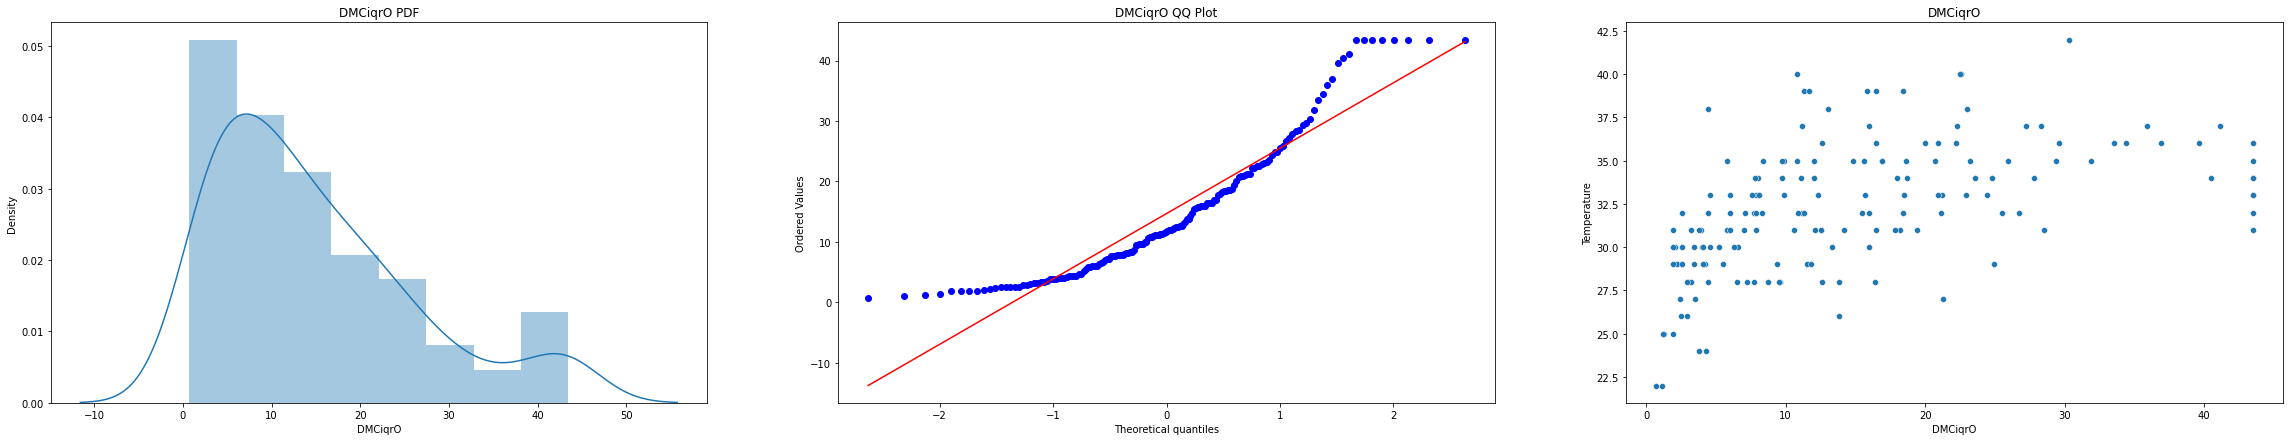

In [1095]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'DMCiqrO')

----------------- Log Transformation -------------------


<Figure size 720x432 with 0 Axes>

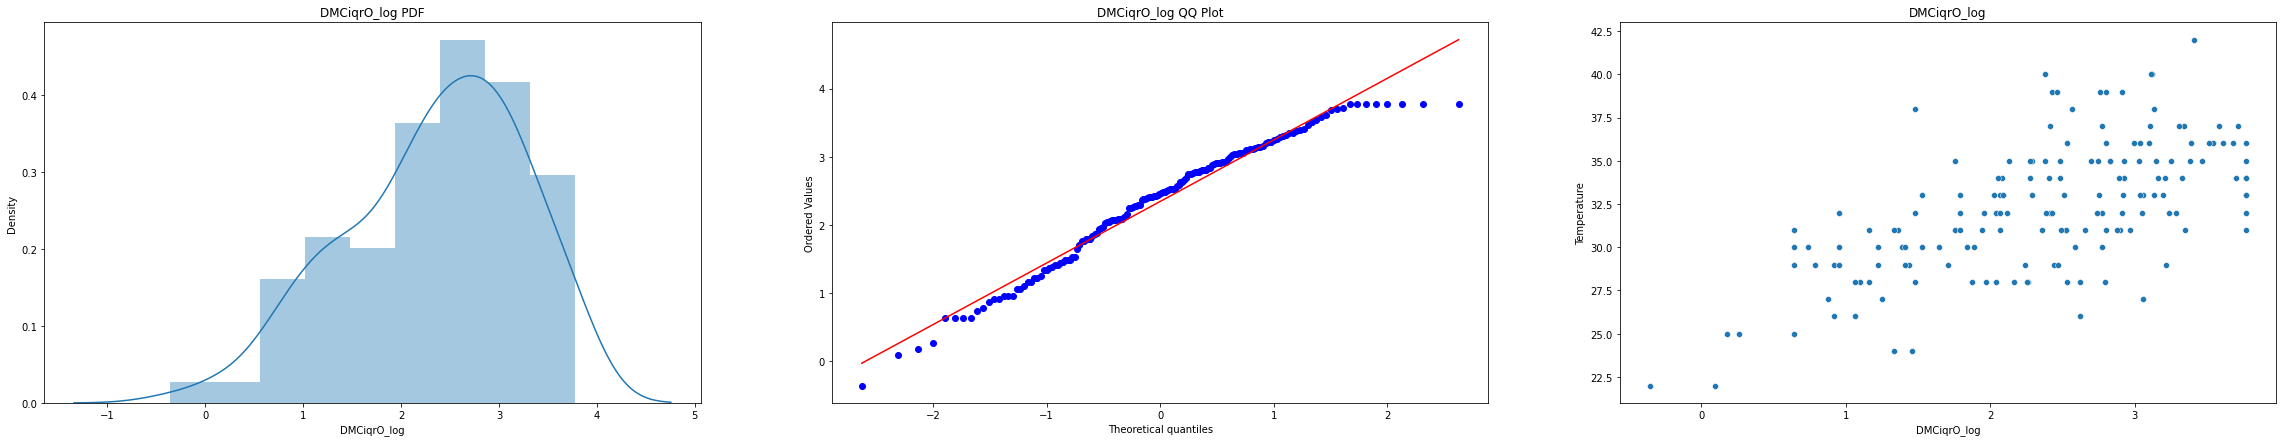

----------------- Reciprocal Transformation -------------------


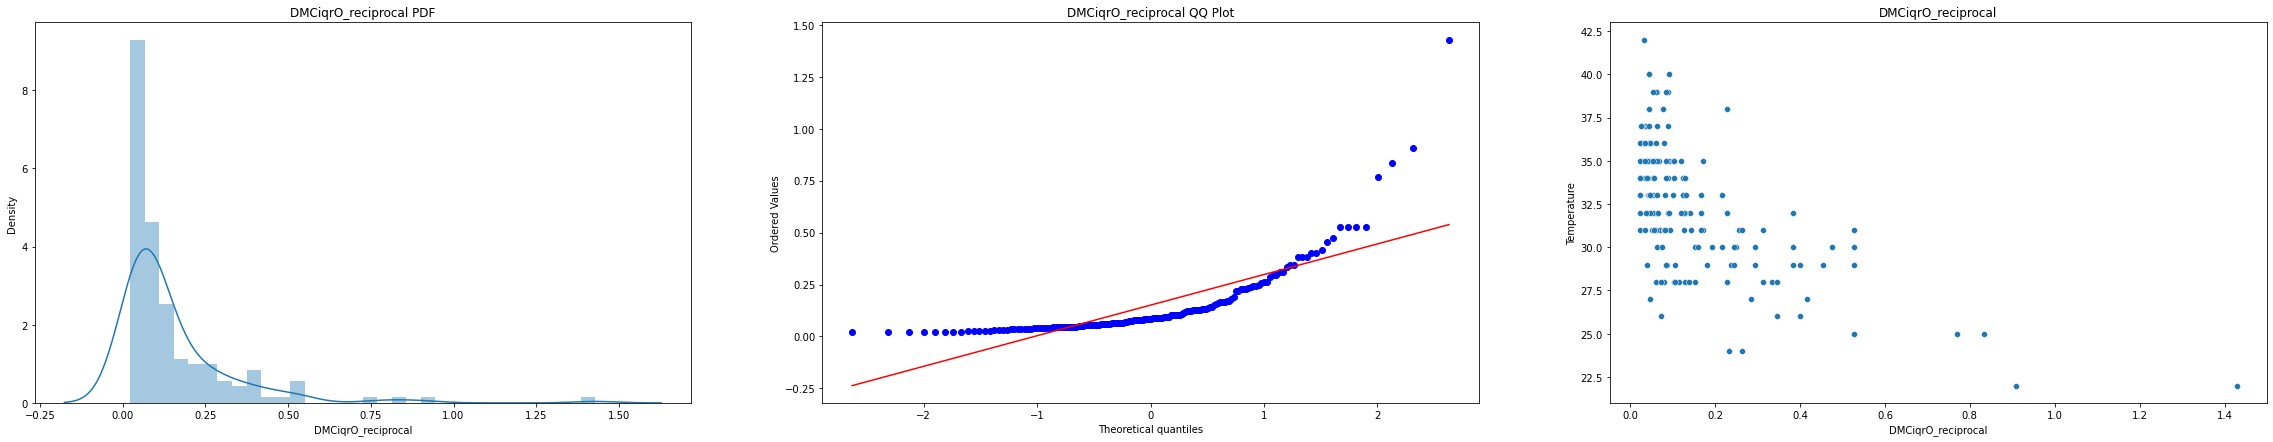

----------------- Square Transformation -------------------


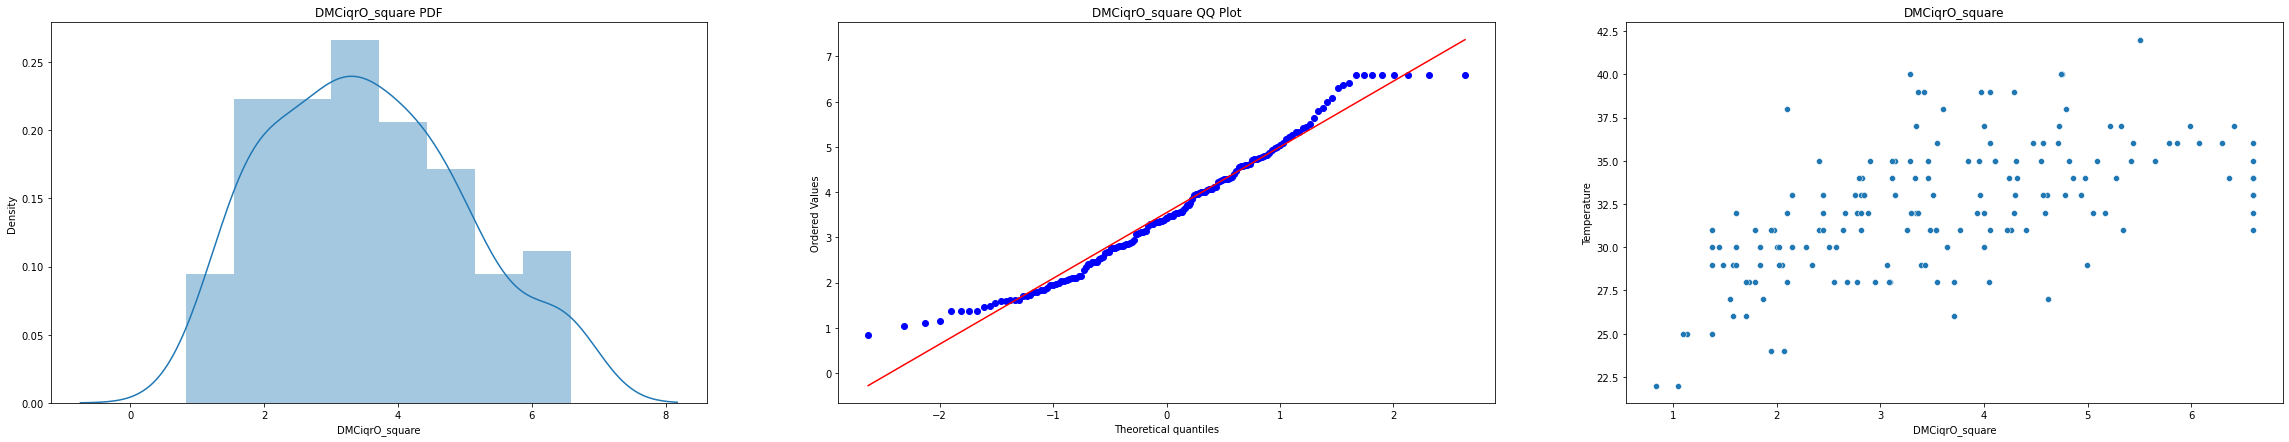

----------------- Exponential Transformation -------------------


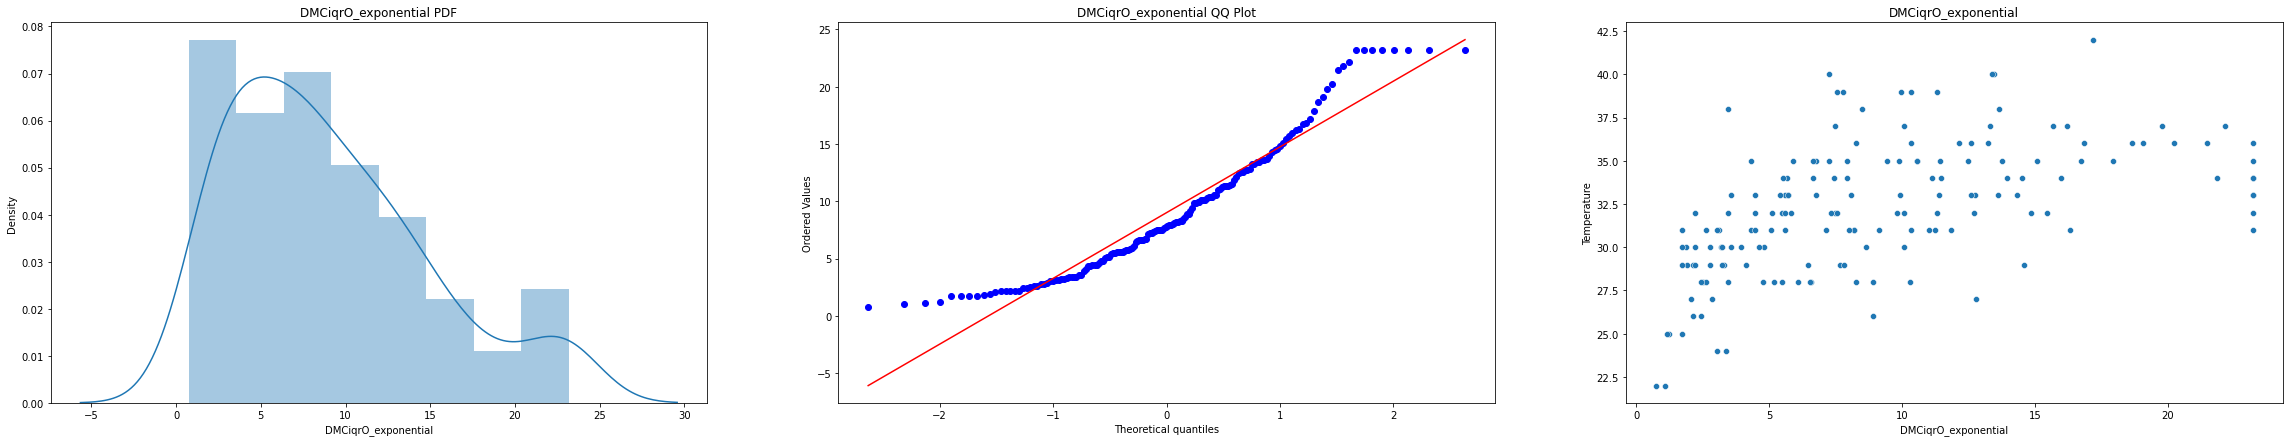

----------------- Boxcox Transformation -------------------


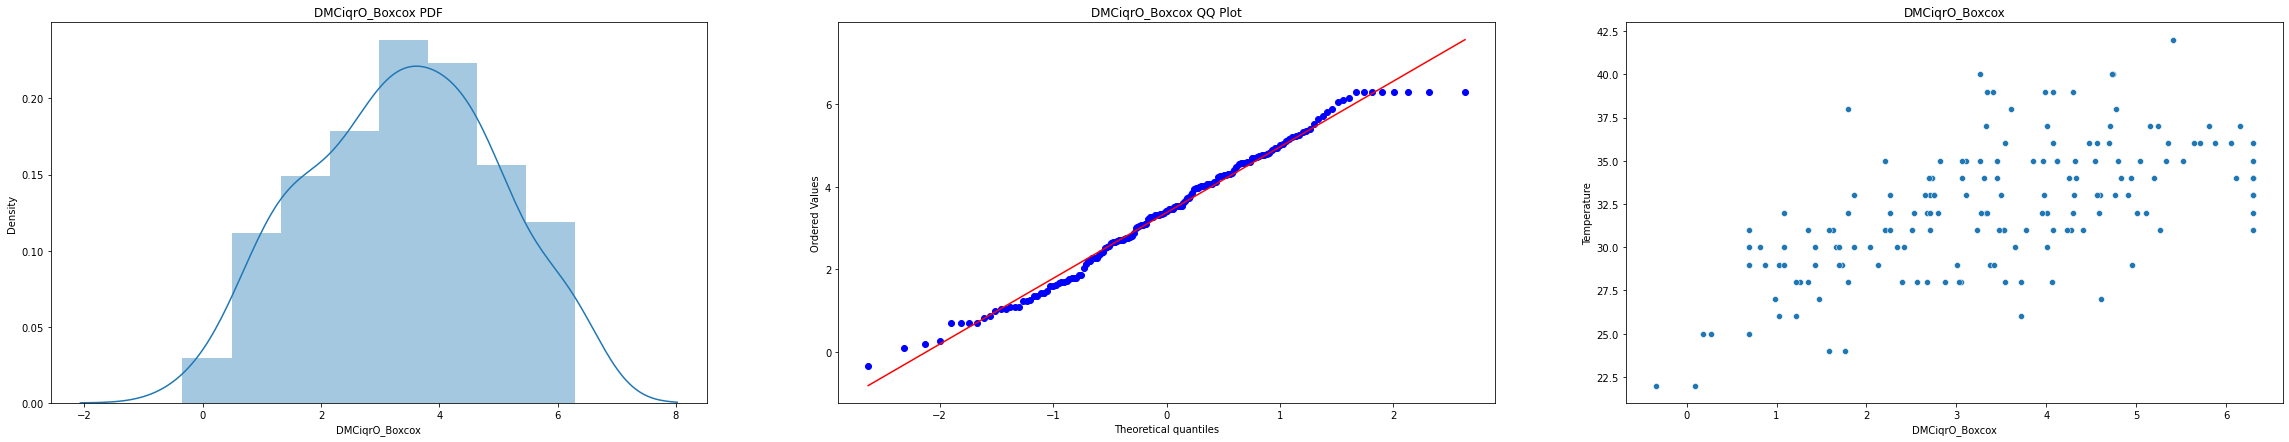

In [1096]:
import pylab
import scipy.stats as stat
transform_data(data,'DMCiqrO')

In [1097]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DMCiqrO', 'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_log', 'DMCiqrO_reciprocal',
       'DMCiqrO_square', 'DMCiqrO_exponential', 'DMCiqrO_Boxcox'],
      dtype='object')

In [1098]:
data.drop(['DMCiqrO_log', 'DMCiqrO_reciprocal', 'DMCiqrO_exponential','DMCiqrO'],axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox'],
      dtype='object')

# BUI

----------------- Original Distribution -------------------


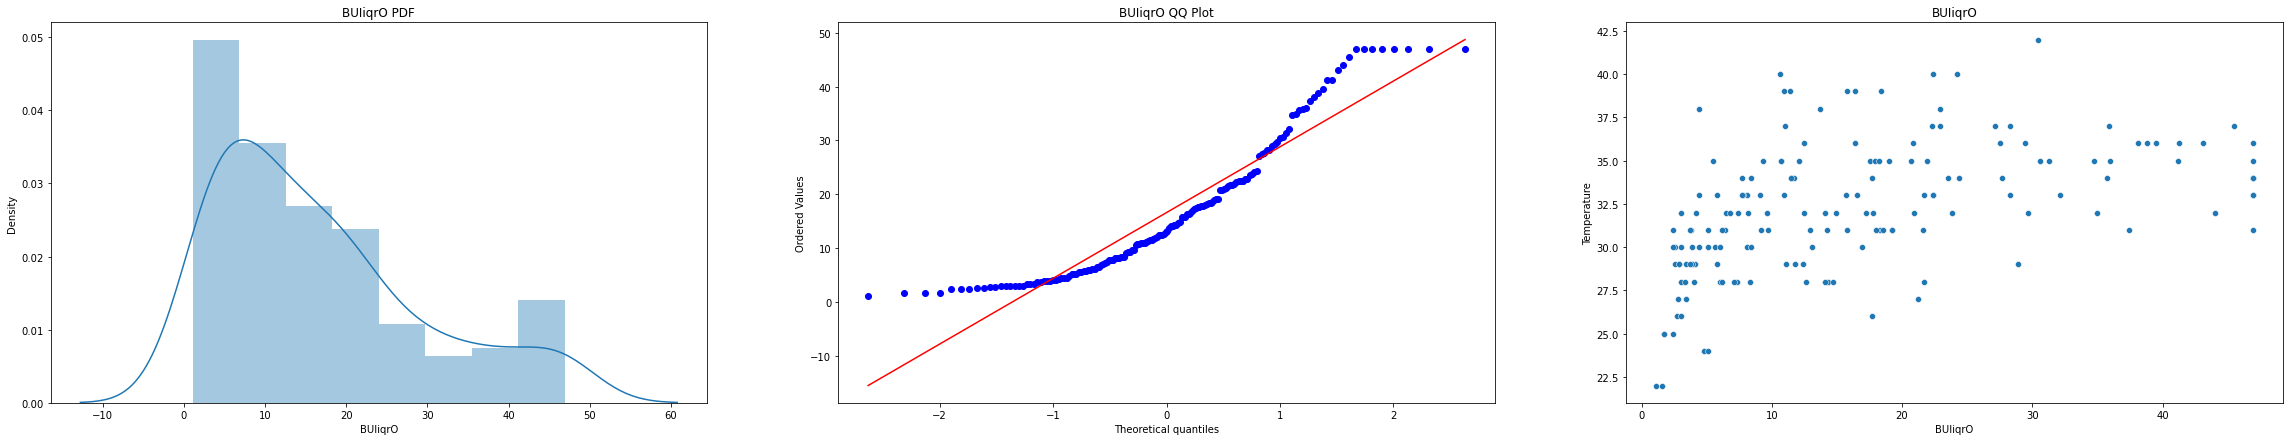

In [1099]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'BUIiqrO')

----------------- Log Transformation -------------------


<Figure size 720x432 with 0 Axes>

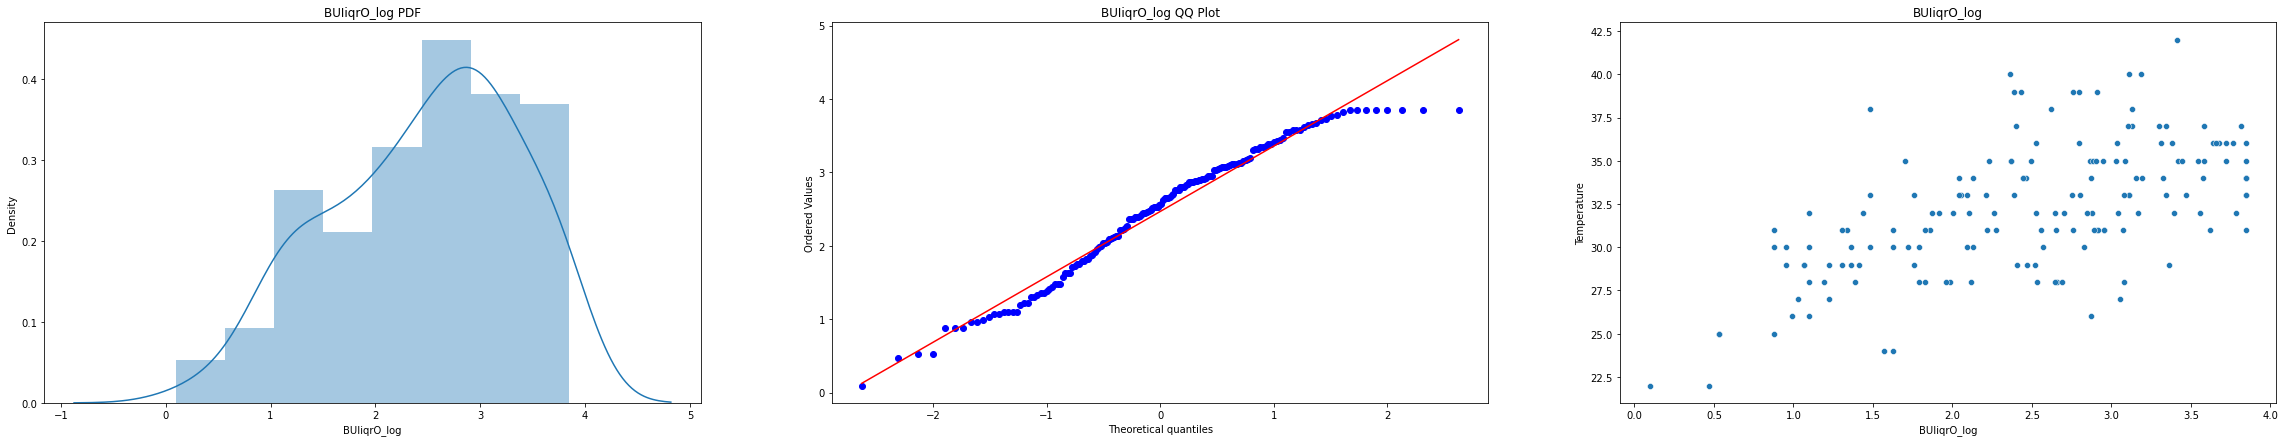

----------------- Reciprocal Transformation -------------------


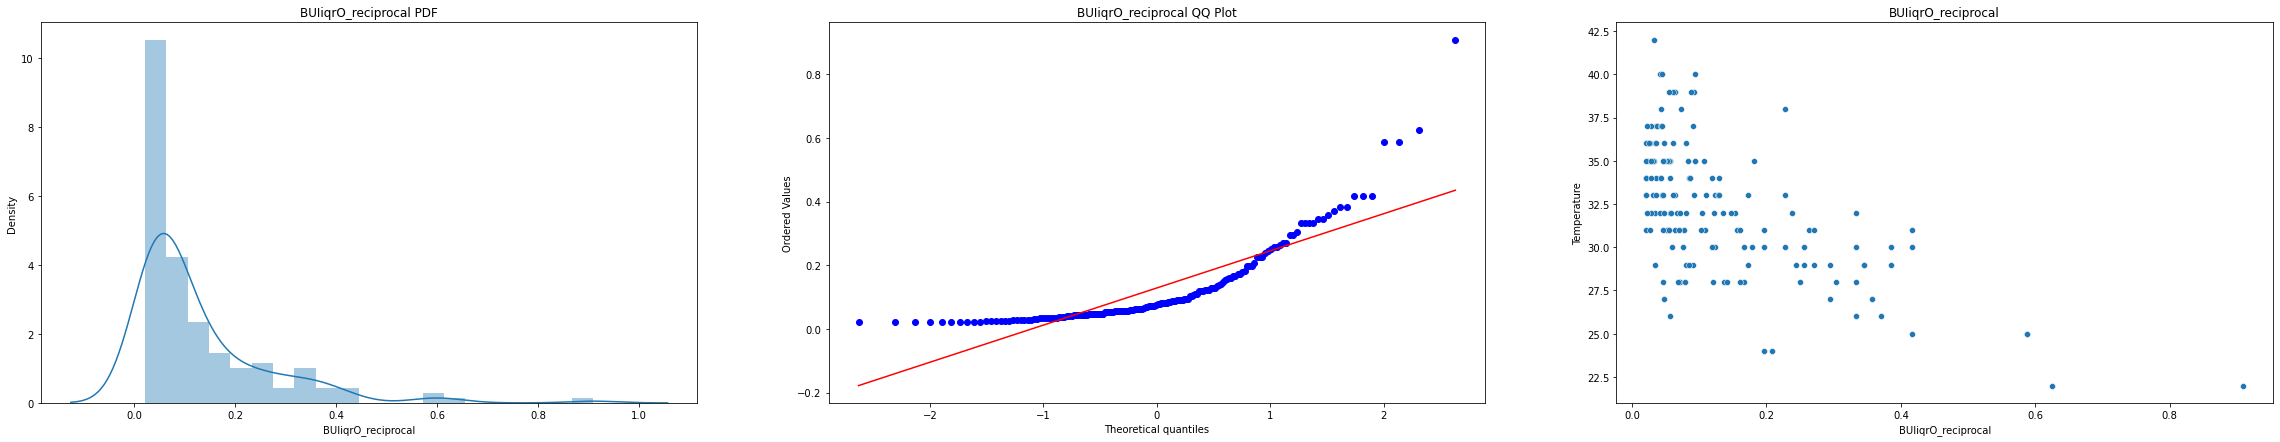

----------------- Square Transformation -------------------


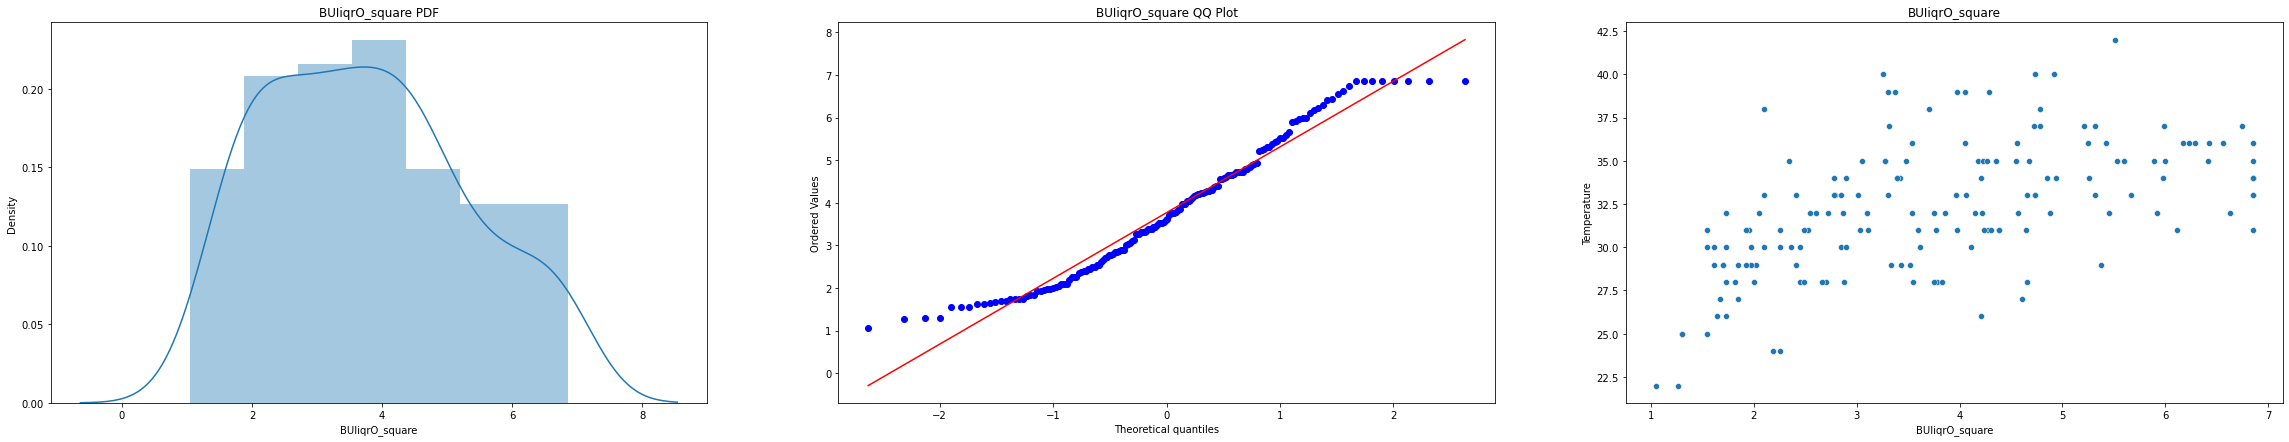

----------------- Exponential Transformation -------------------


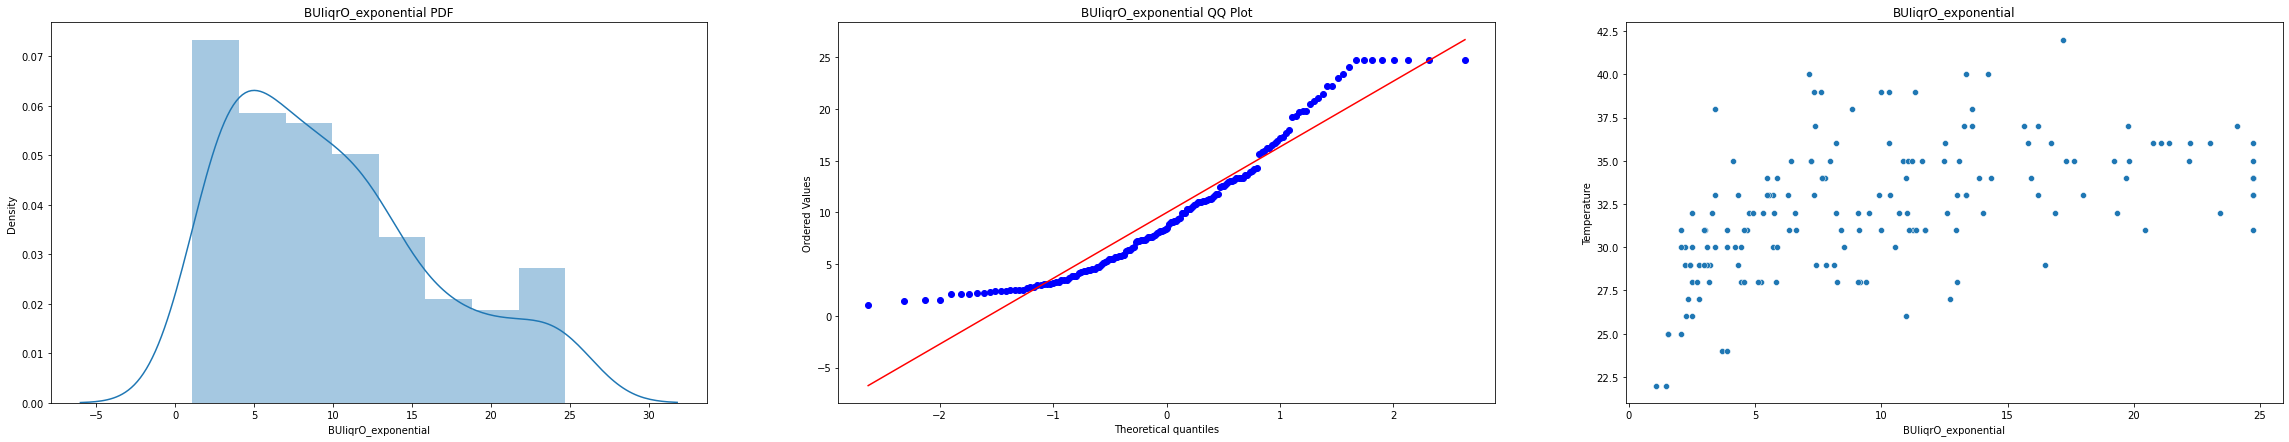

----------------- Boxcox Transformation -------------------


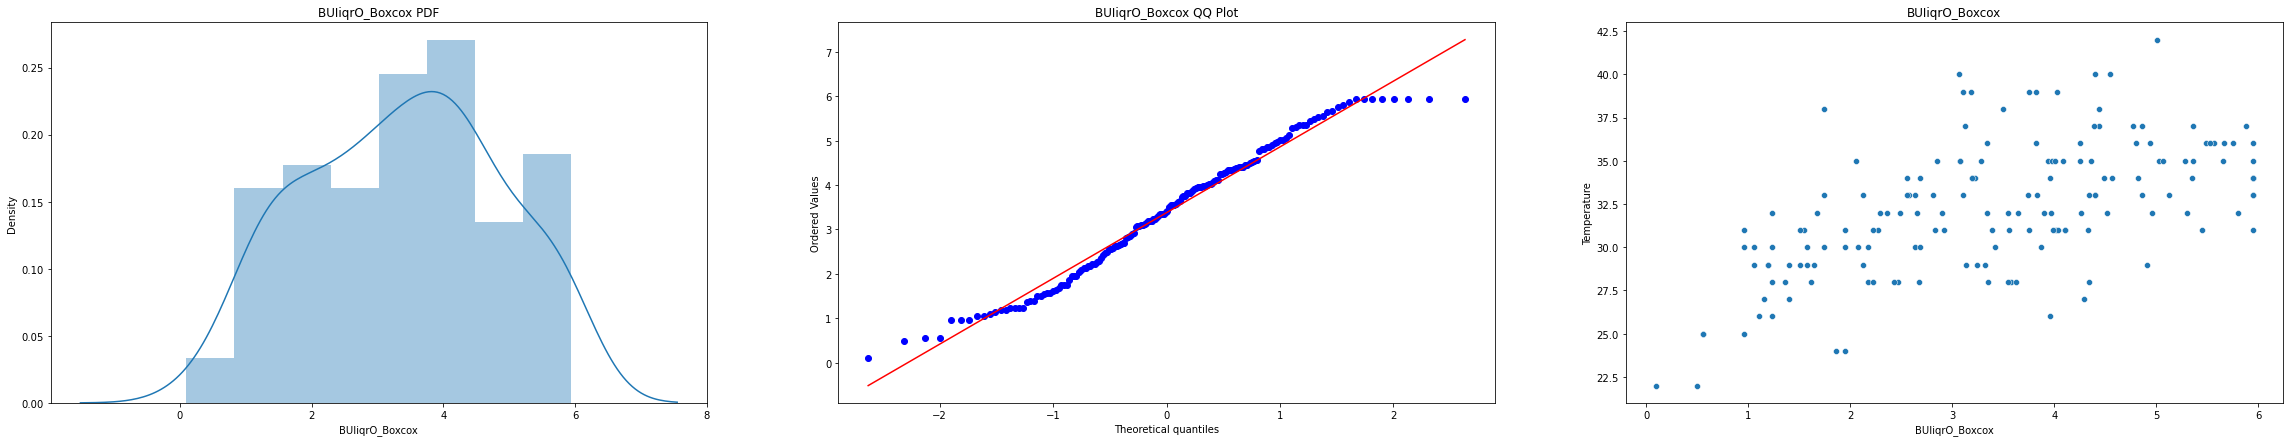

In [1100]:
import pylab
import scipy.stats as stat
transform_data(data,'BUIiqrO')

In [1101]:
data.columns



Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox',
       'BUIiqrO_log', 'BUIiqrO_reciprocal', 'BUIiqrO_square',
       'BUIiqrO_exponential', 'BUIiqrO_Boxcox'],
      dtype='object')

In [1102]:
data.drop(['BUIiqrO_exponential','BUIiqrO_log', 'BUIiqrO_reciprocal'],axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox',
       'BUIiqrO_square', 'BUIiqrO_Boxcox'],
      dtype='object')

# DC

----------------- Original Distribution -------------------


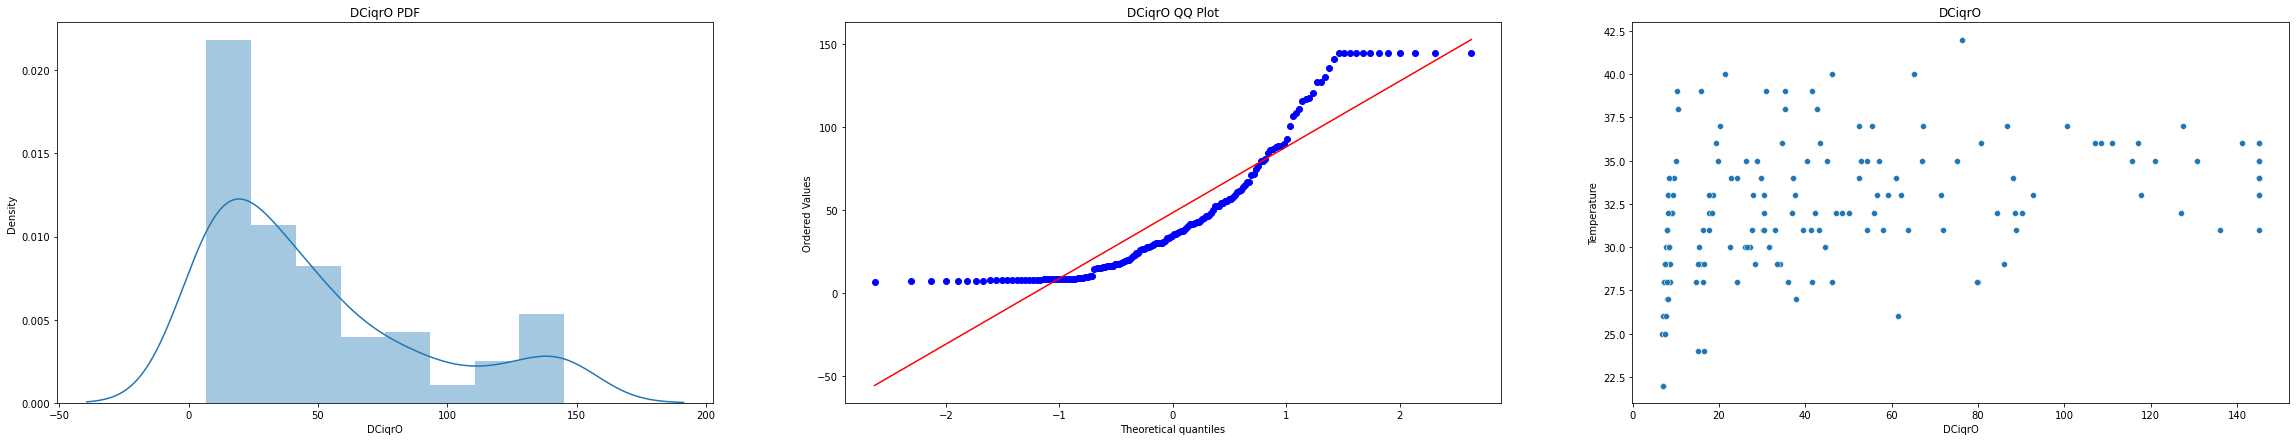

In [1103]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'DCiqrO')

----------------- Log Transformation -------------------


<Figure size 720x432 with 0 Axes>

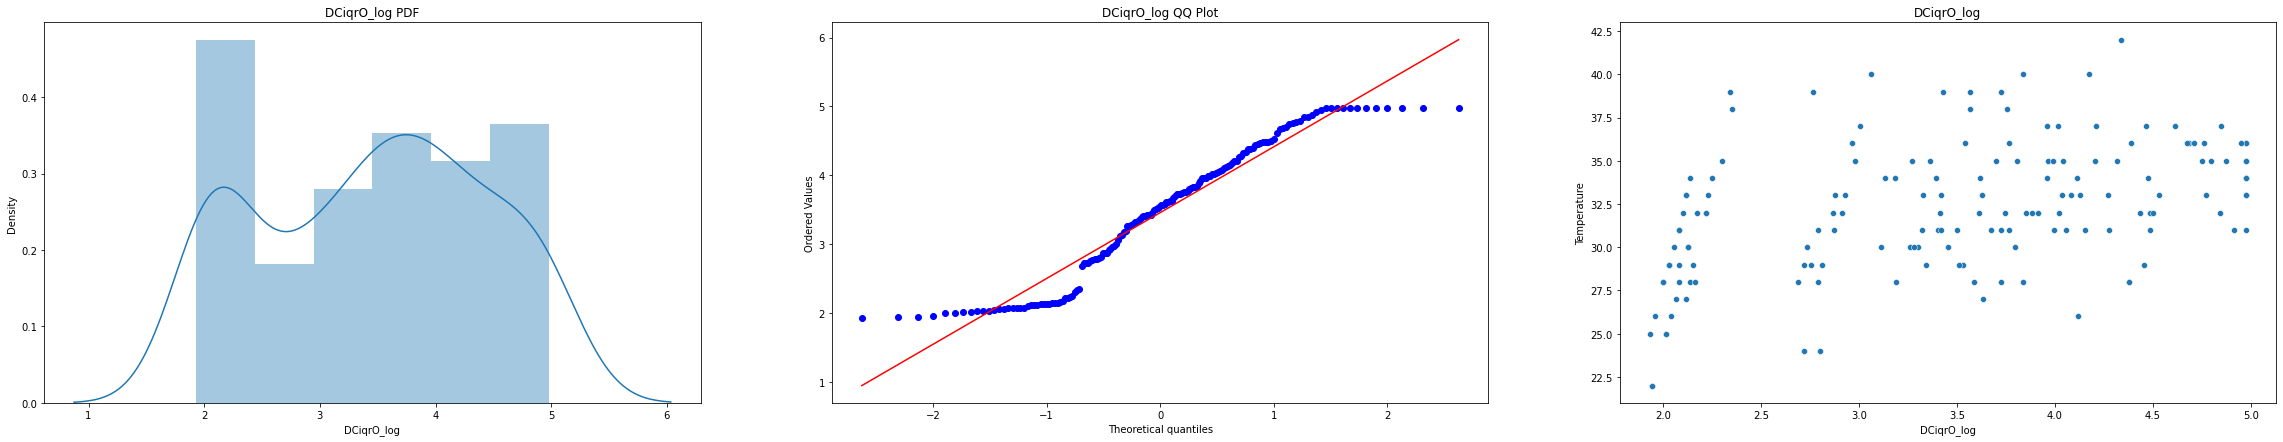

----------------- Reciprocal Transformation -------------------


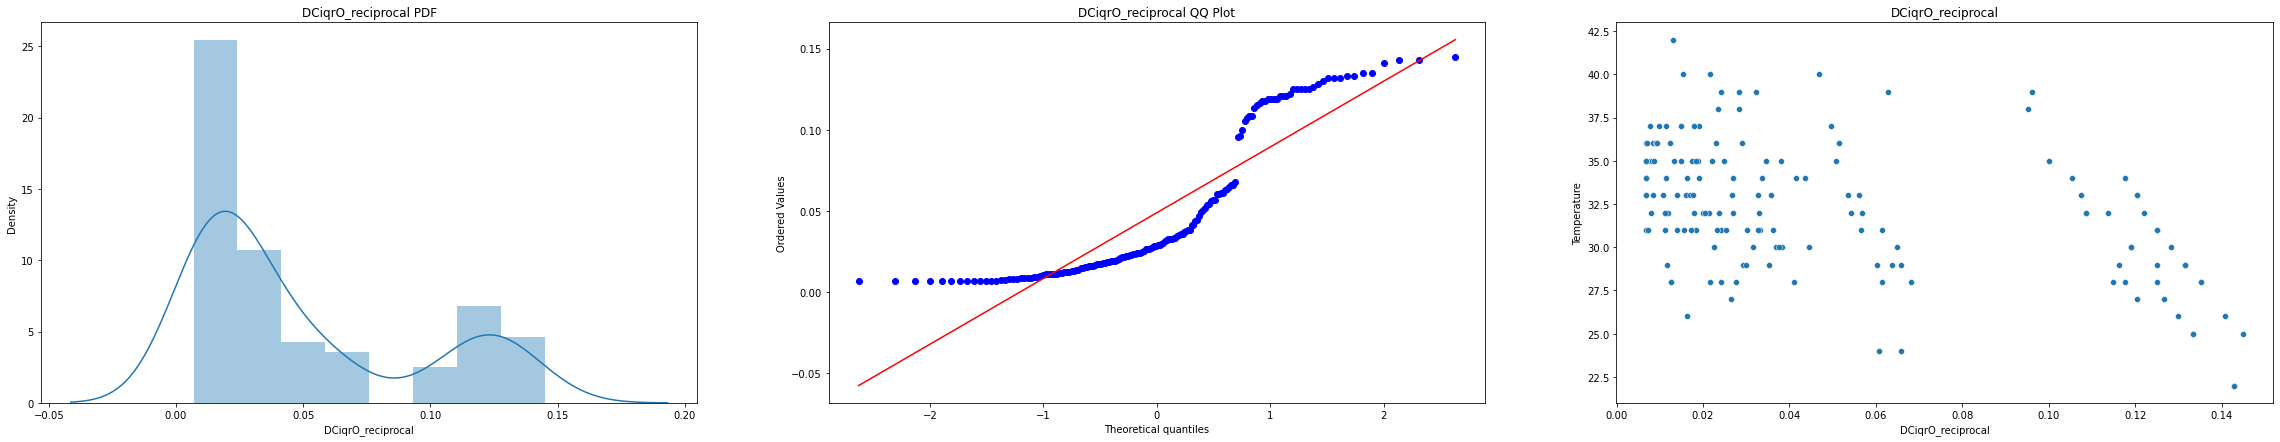

----------------- Square Transformation -------------------


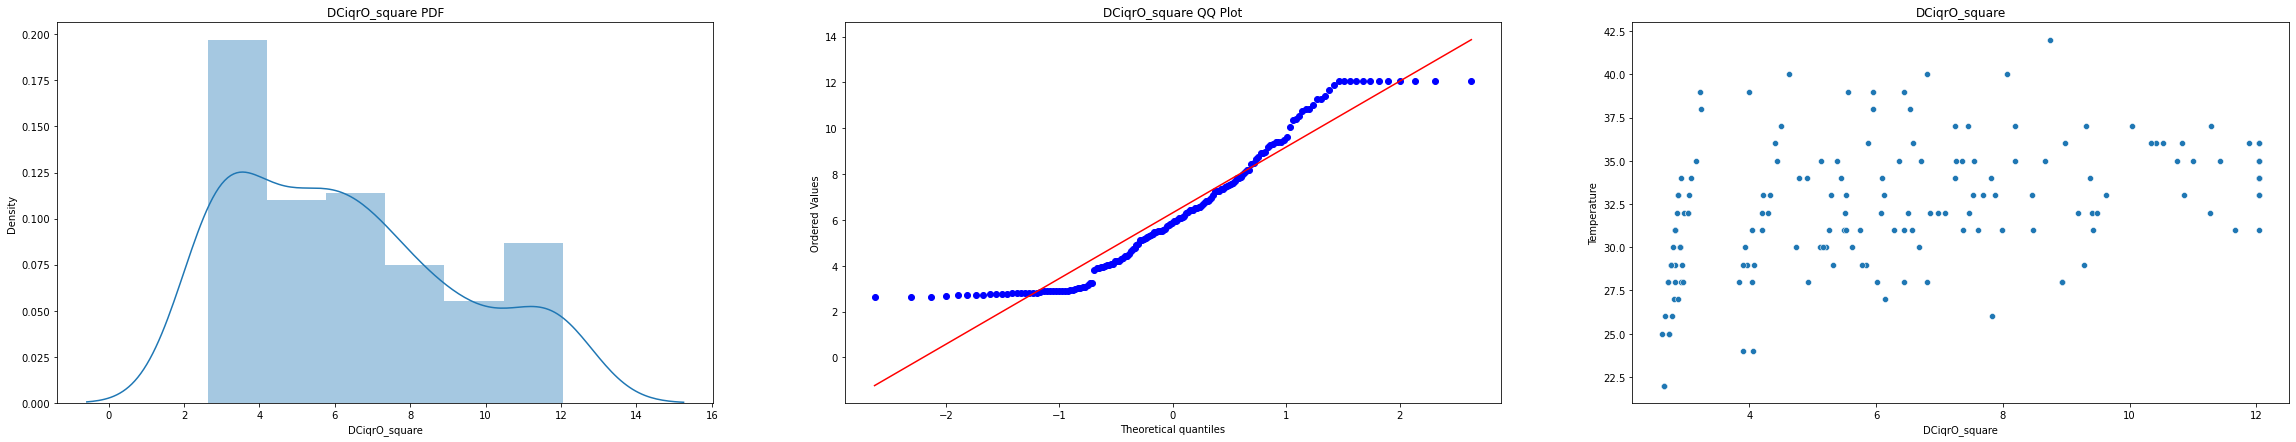

----------------- Exponential Transformation -------------------


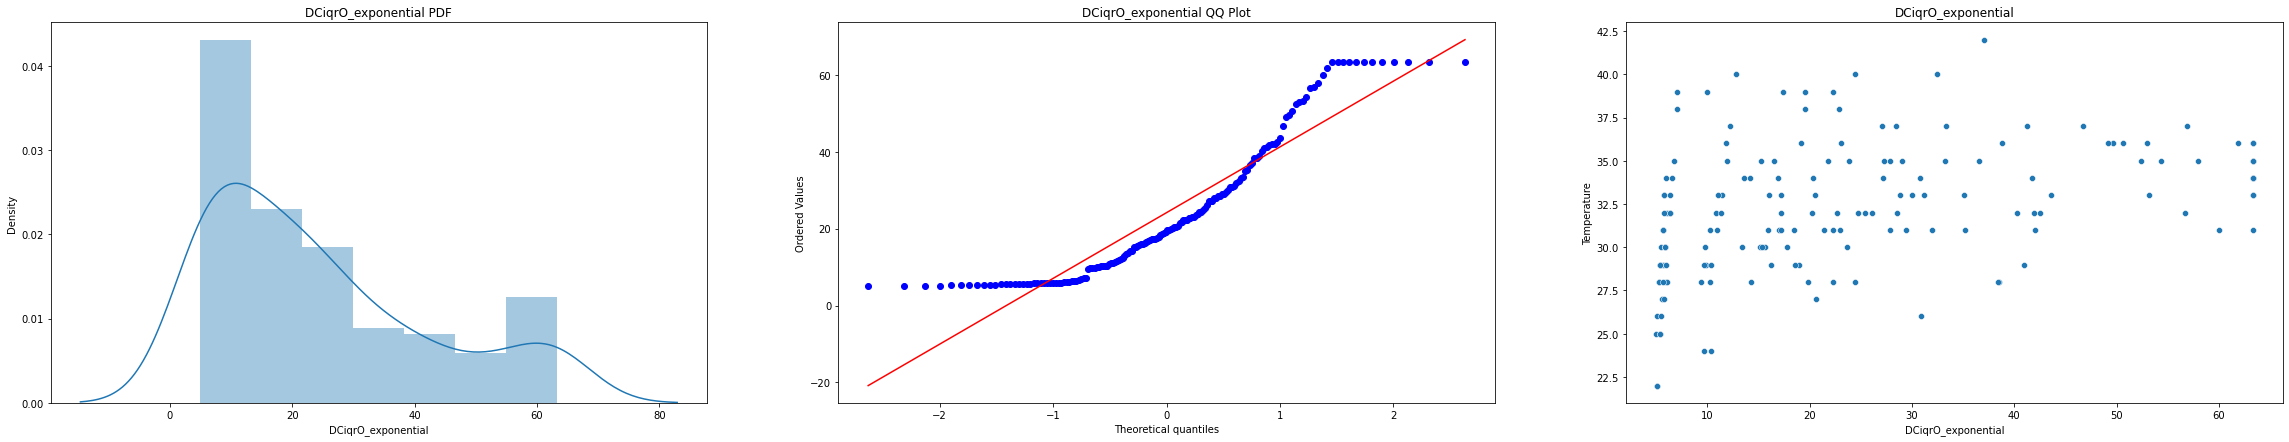

----------------- Boxcox Transformation -------------------


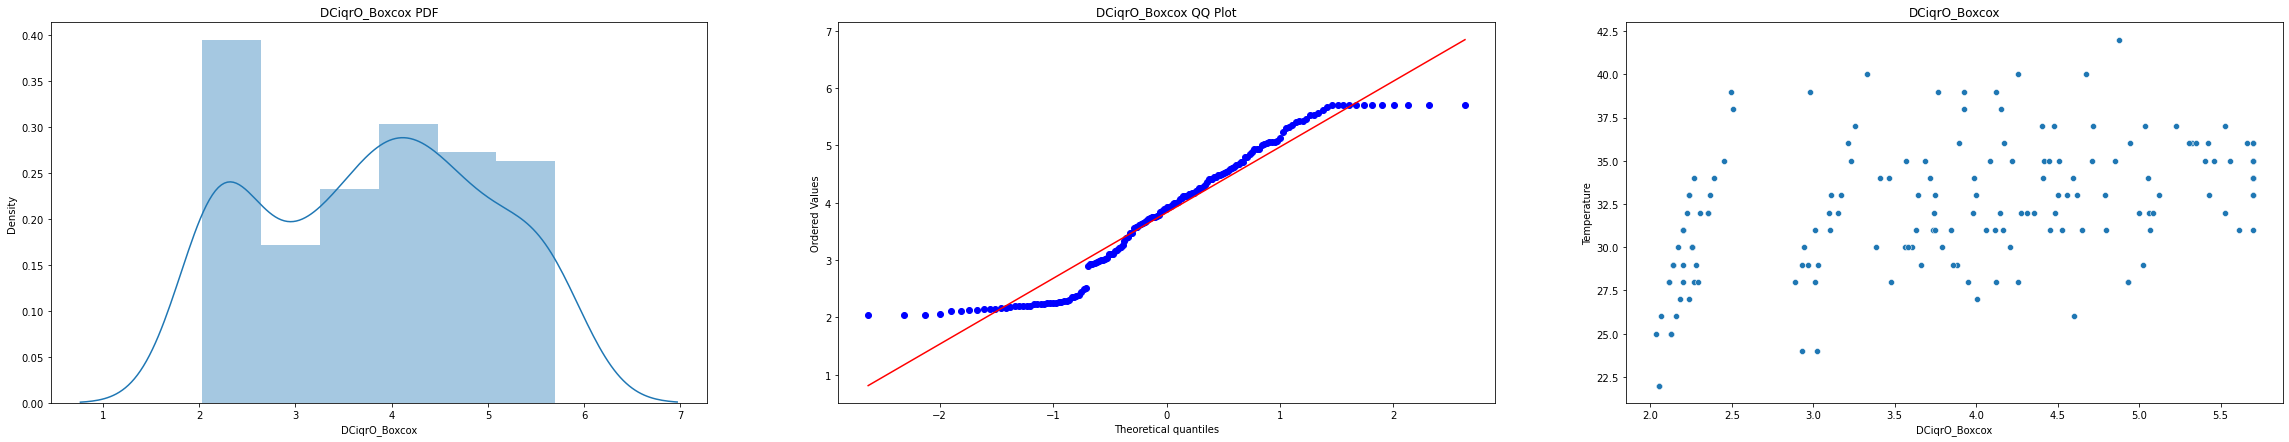

In [1104]:
import pylab
import scipy.stats as stat
transform_data(data,'DCiqrO')

In [1105]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox',
       'BUIiqrO_square', 'BUIiqrO_Boxcox', 'DCiqrO_log', 'DCiqrO_reciprocal',
       'DCiqrO_square', 'DCiqrO_exponential', 'DCiqrO_Boxcox'],
      dtype='object')

In [1106]:
data.drop(['DCiqrO_exponential','DCiqrO_log', 'DCiqrO_reciprocal'],axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox',
       'BUIiqrO_square', 'BUIiqrO_Boxcox', 'DCiqrO_square', 'DCiqrO_Boxcox'],
      dtype='object')

In [1107]:
data.month.unique()

array([7, 6, 9, 8], dtype=int64)

# WsiqrO

----------------- Original Distribution -------------------


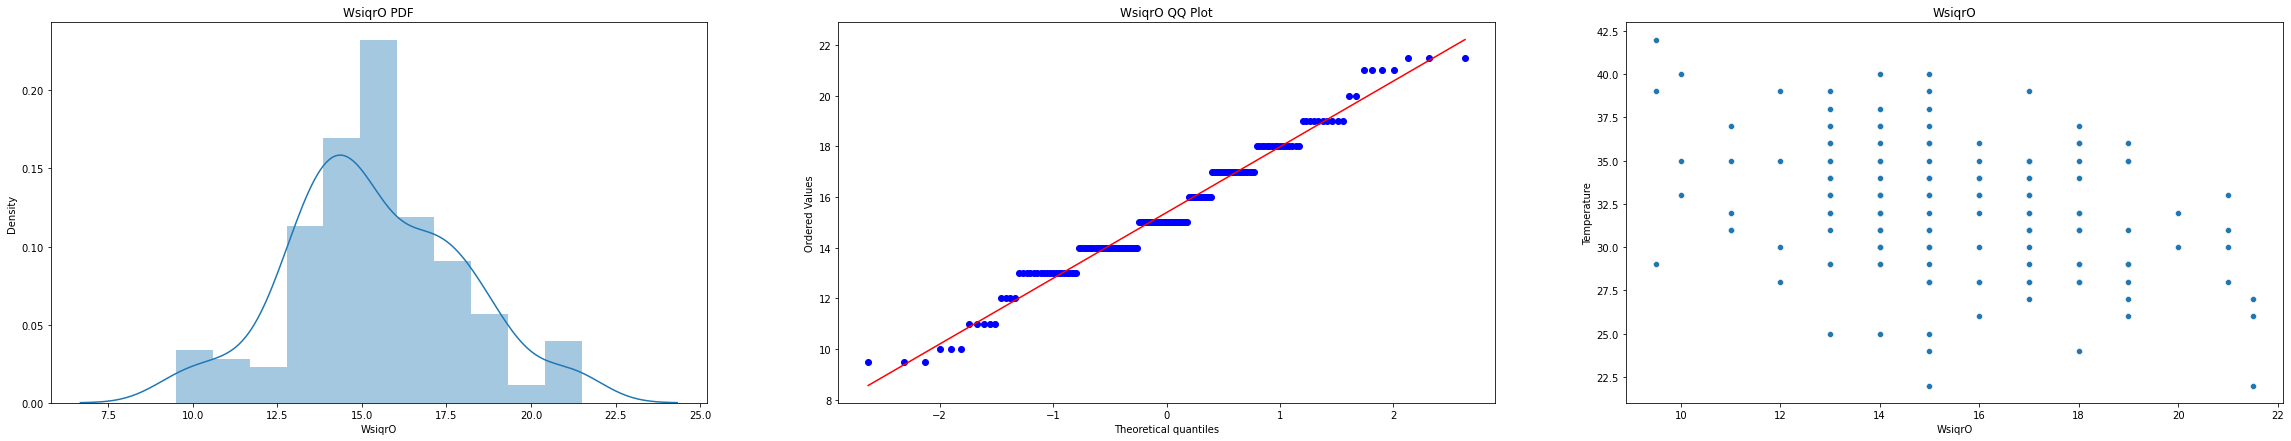

In [1108]:
import scipy.stats as stat
print('----------------- Original Distribution -------------------')
plot_qq_plot(data, 'WsiqrO')

----------------- Log Transformation -------------------


<Figure size 720x432 with 0 Axes>

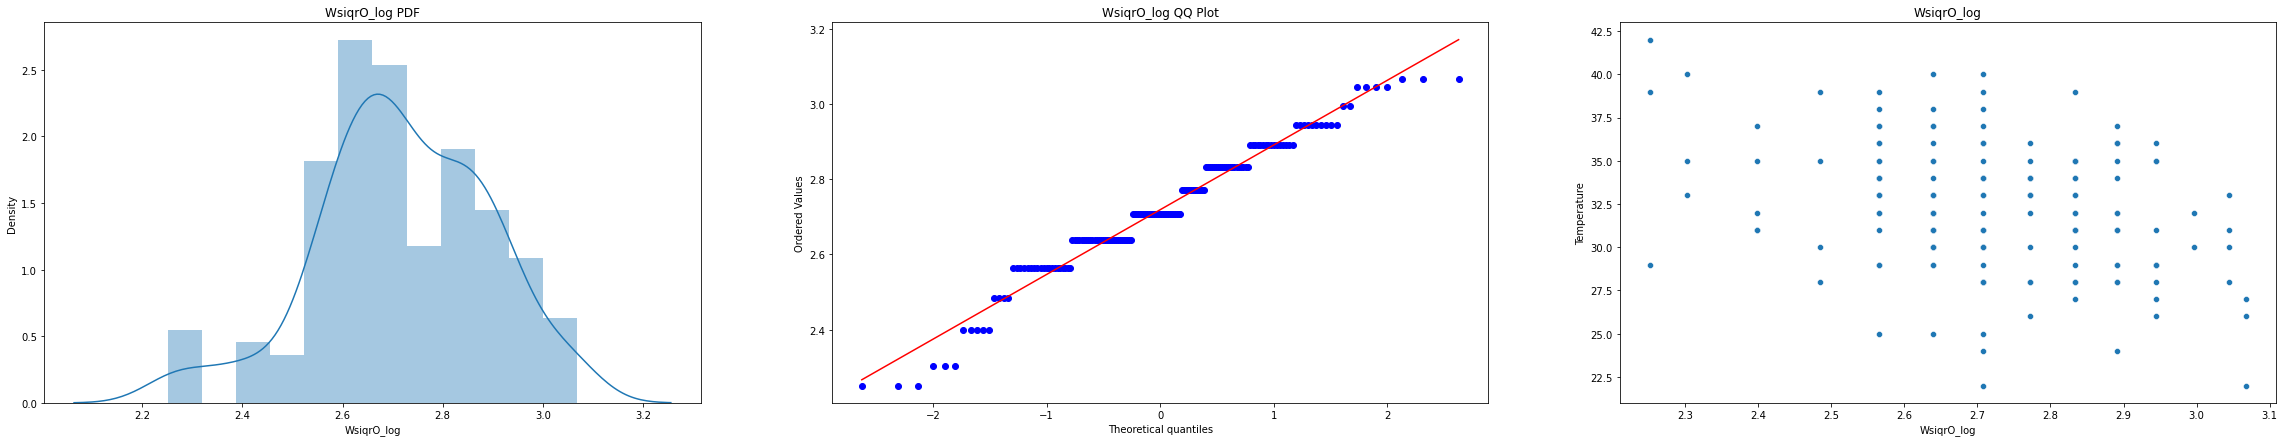

----------------- Reciprocal Transformation -------------------


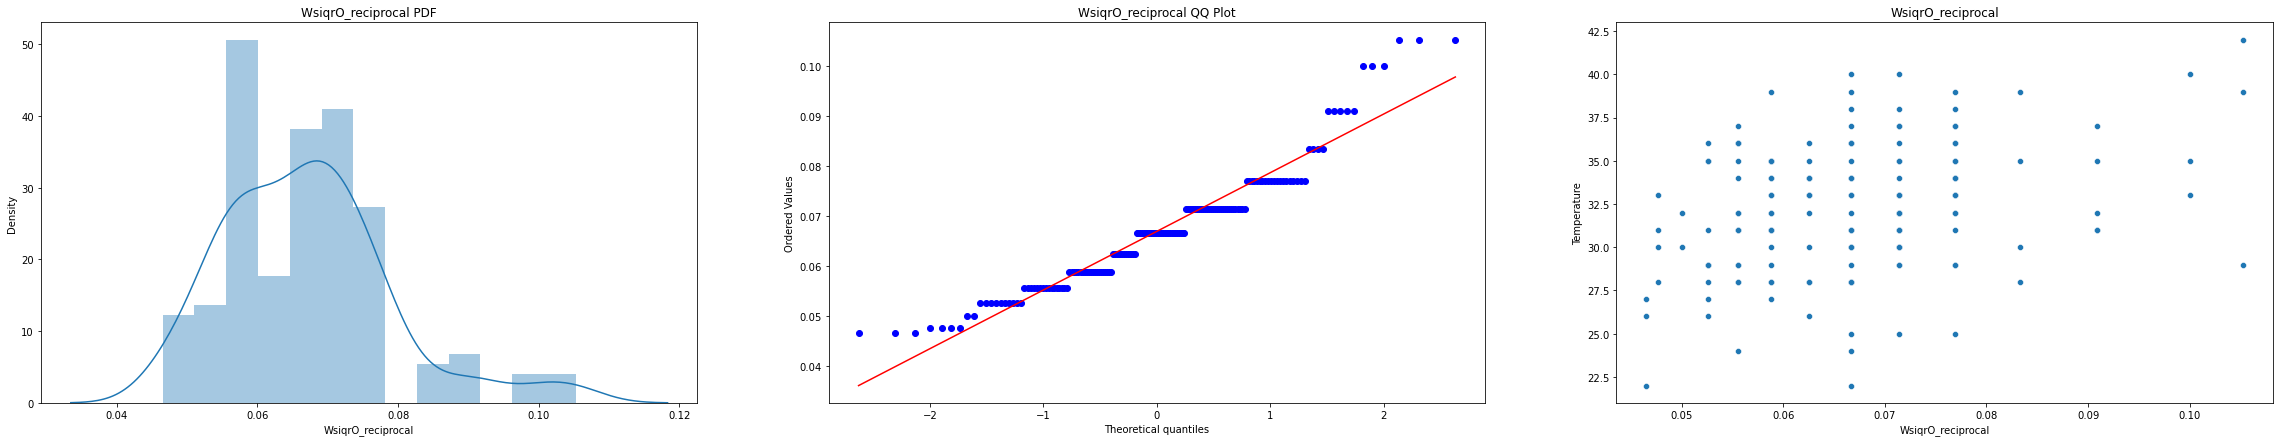

----------------- Square Transformation -------------------


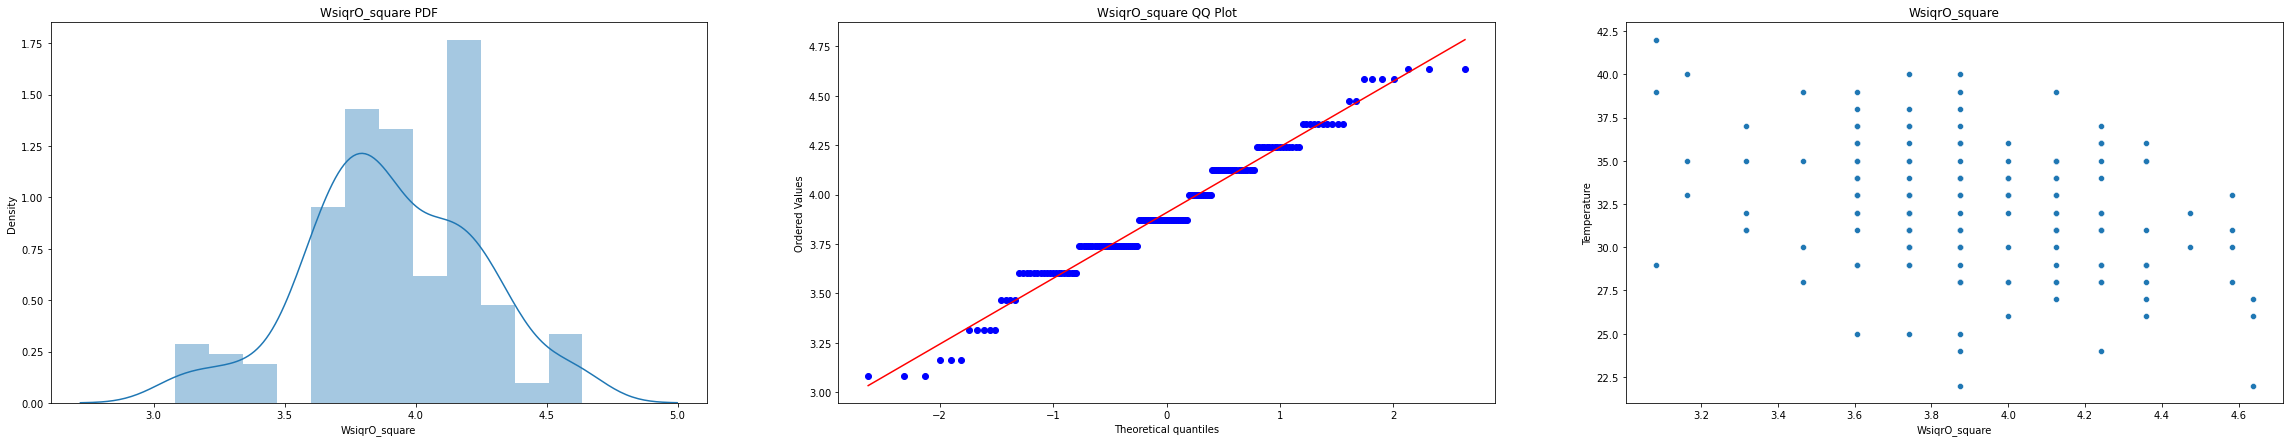

----------------- Exponential Transformation -------------------


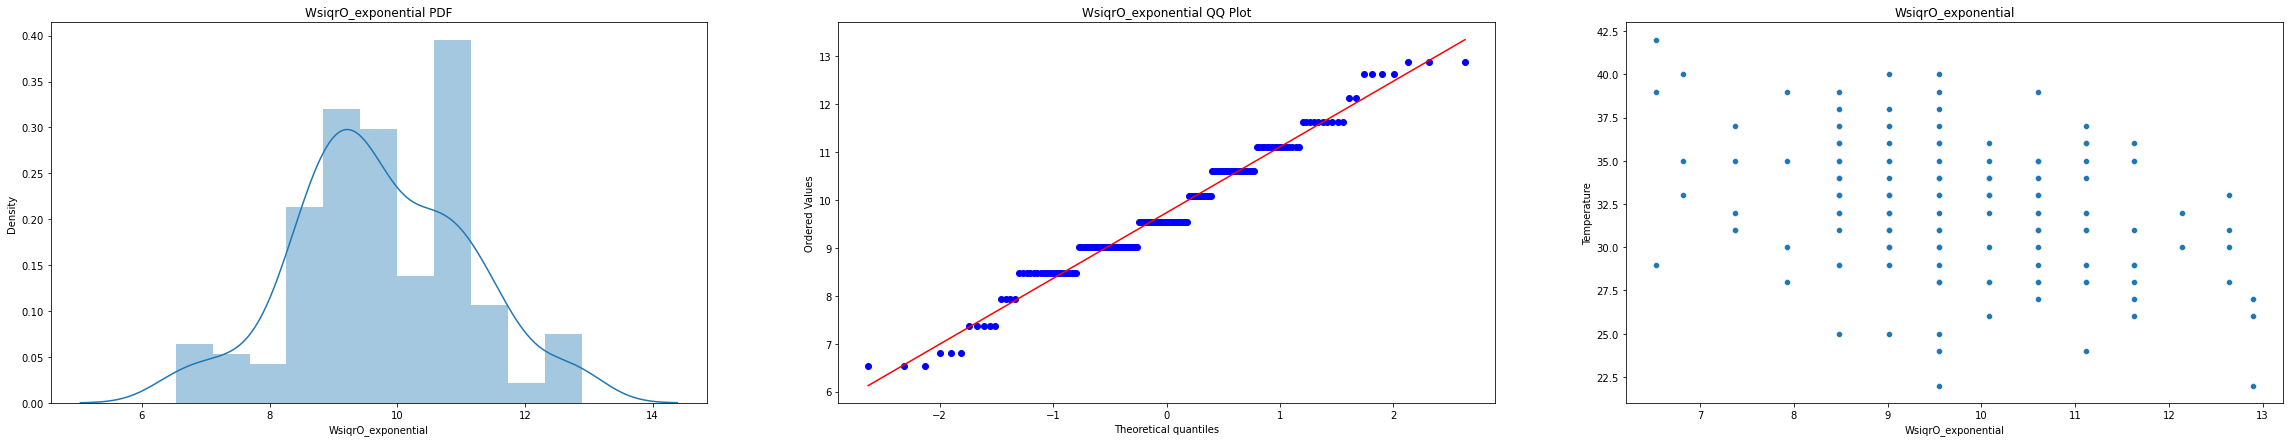

----------------- Boxcox Transformation -------------------


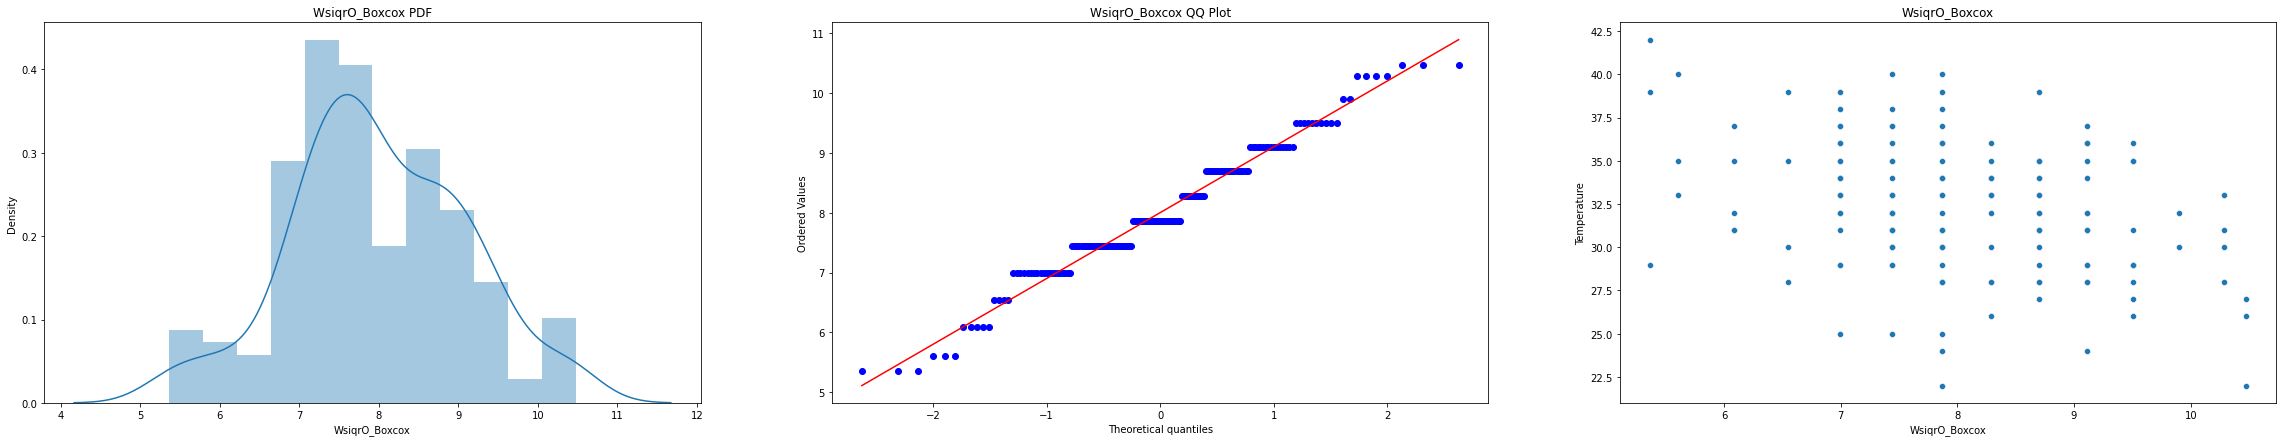

In [1109]:
import pylab
import scipy.stats as stat
transform_data(data,'WsiqrO')

In [1110]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox',
       'BUIiqrO_square', 'BUIiqrO_Boxcox', 'DCiqrO_square', 'DCiqrO_Boxcox',
       'WsiqrO_log', 'WsiqrO_reciprocal', 'WsiqrO_square',
       'WsiqrO_exponential', 'WsiqrO_Boxcox'],
      dtype='object')

In [1111]:
data.drop(['WsiqrO_log', 'WsiqrO_reciprocal', 'WsiqrO_square',
       'WsiqrO_exponential'],axis=1,inplace=True)
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region', 'WsiqrO',
       'DCiqrO', 'BUIiqrO', 'Classes_notfire', 'FFMCiqrO_Boxcox',
       'ISIiqrO_square', 'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox',
       'BUIiqrO_square', 'BUIiqrO_Boxcox', 'DCiqrO_square', 'DCiqrO_Boxcox',
       'WsiqrO_Boxcox'],
      dtype='object')

In [1112]:
data.head()

day  month  year  Temperature  RH  Region  WsiqrO  DCiqrO  BUIiqrO  \
0   11      7  2012           33  76     0.0    14.0    18.7      8.1   
1   14      6  2012           30  78     0.0    20.0     7.8      4.4   
2    4      6  2012           25  89     0.0    13.0     6.9      1.7   
3   16      6  2012           29  87     1.0    15.0     8.0      4.1   
4   25      6  2012           31  64     0.0    15.0    63.8     18.3   

   Classes_notfire  FFMCiqrO_Boxcox  ISIiqrO_square  FWIiqrO_square  \
0                1     2.246811e+07        1.612452        1.483240   
1                1     5.950505e+06        1.000000        0.632456   
2                1     2.849455e+06        0.000000        0.000000   
3                1     2.849455e+06        0.447214        0.316228   
4                0     2.969391e+07        2.387467        2.898275   

   DMCiqrO_square  DMCiqrO_Boxcox  BUIiqrO_square  BUIiqrO_Boxcox  \
0        2.846050        2.753811        2.846050        2.631687   
1        2.144761        1.860759        2.097618        1.740271   
2        1.140175        0.271226        1.303840        0.561578   
3        2.049390        1.728677        2.024846        1.644357   
4        3.768289        3.774977        4.277850        4.016839   

   DCiqrO_square  DCiqrO_Boxcox  WsiqrO_Boxcox  
0       4.324350       3.168744       7.437860  
1       2.792848       2.170453       9.899631  
2       2.626785       2.034151       6.997559  
3       2.828427       2.198710       7.868350  
4       7.987490       4.650468       7.868350

In [265]:
#data.corr()['Temperature'].sort_values().index


In [266]:
#data.corr()['Temperature'].sort_values().values

In [267]:
#data.corr()['Temperature'].nlargest(38)


In [268]:
#data.corr()['Temperature'].nsmallest(12)

In [269]:
#list(data.corr()['Temperature'].nlargest(38).index) + list(data.corr()['Temperature'].nsmallest(12).index)

In [270]:
#data = data[list(data.corr()['Temperature'].nlargest(38).index) + list(data.corr()['Temperature'].nsmallest(12).index)]

In [1113]:
data

day  month  year  Temperature  RH  Region  WsiqrO  DCiqrO  BUIiqrO  \
0     11      7  2012           33  76     0.0    14.0    18.7      8.1   
1     14      6  2012           30  78     0.0    20.0     7.8      4.4   
2      4      6  2012           25  89     0.0    13.0     6.9      1.7   
3     16      6  2012           29  87     1.0    15.0     8.0      4.1   
4     25      6  2012           31  64     0.0    15.0    63.8     18.3   
..   ...    ...   ...          ...  ..     ...     ...     ...      ...   
157    7      8  2012           32  69     0.0    16.0    48.6     17.2   
158   11      8  2012           40  31     1.0    15.0    46.3     22.4   
159   26      9  2012           31  54     0.0    11.0    16.3      6.2   
160   18      7  2012           31  68     0.0    14.0    43.1     14.2   
161   22      7  2012           32  48     1.0    18.0    90.1     44.0   

     Classes_notfire  FFMCiqrO_Boxcox  ISIiqrO_square  FWIiqrO_square  \
0                  1     2.246811e+07        1.612452        1.483240   
1                  1     5.950505e+06        1.000000        0.632456   
2                  1     2.849455e+06        0.000000        0.000000   
3                  1     2.849455e+06        0.447214        0.316228   
4                  0     2.969391e+07        2.387467        2.898275   
..               ...              ...             ...             ...   
157                0     2.940889e+07        2.345208        2.828427   
158                0     4.198955e+07        4.068169        4.647580   
159                1     2.352788e+07        1.581139        1.303840   
160                0     2.787833e+07        2.144761        2.449490   
161                0     3.718753e+07        3.633180        5.039841   

     DMCiqrO_square  DMCiqrO_Boxcox  BUIiqrO_square  BUIiqrO_Boxcox  \
0          2.846050        2.753811        2.846050        2.631687   
1          2.144761        1.860759        2.097618        1.740271   
2          1.140175        0.271226        1.303840        0.561578   
3          2.049390        1.728677        2.024846        1.644357   
4          3.768289        3.774977        4.277850        4.016839   
..              ...             ...             ...             ...   
157        3.937004        3.947748        4.147288        3.902884   
158        4.743416        4.726909        4.732864        4.399019   
159        2.449490        2.264318        2.489980        2.227009   
160        3.478505        3.469010        3.768289        3.559867   
161        6.593557        6.296191        6.633250        5.800615   

     DCiqrO_square  DCiqrO_Boxcox  WsiqrO_Boxcox  
0         4.324350       3.168744       7.437860  
1         2.792848       2.170453       9.899631  
2         2.626785       2.034151       6.997559  
3         2.828427       2.198710       7.868350  
4         7.987490       4.650468       7.868350  
..             ...            ...            ...  
157       6.971370       4.313516       8.289879  
158       6.804410       4.253996       7.868350  
159       4.037326       3.008836       6.083296  
160       6.565059       4.166351       7.437860  
161       9.492102       5.084926       9.108882  

[162 rows x 20 columns]

In [1114]:
data=data.drop(['WsiqrO'	,'DCiqrO'	,'BUIiqrO'],axis = 1)
data

day  month  year  Temperature  RH  Region  Classes_notfire  \
0     11      7  2012           33  76     0.0                1   
1     14      6  2012           30  78     0.0                1   
2      4      6  2012           25  89     0.0                1   
3     16      6  2012           29  87     1.0                1   
4     25      6  2012           31  64     0.0                0   
..   ...    ...   ...          ...  ..     ...              ...   
157    7      8  2012           32  69     0.0                0   
158   11      8  2012           40  31     1.0                0   
159   26      9  2012           31  54     0.0                1   
160   18      7  2012           31  68     0.0                0   
161   22      7  2012           32  48     1.0                0   

     FFMCiqrO_Boxcox  ISIiqrO_square  FWIiqrO_square  DMCiqrO_square  \
0       2.246811e+07        1.612452        1.483240        2.846050   
1       5.950505e+06        1.000000        0.632456        2.144761   
2       2.849455e+06        0.000000        0.000000        1.140175   
3       2.849455e+06        0.447214        0.316228        2.049390   
4       2.969391e+07        2.387467        2.898275        3.768289   
..               ...             ...             ...             ...   
157     2.940889e+07        2.345208        2.828427        3.937004   
158     4.198955e+07        4.068169        4.647580        4.743416   
159     2.352788e+07        1.581139        1.303840        2.449490   
160     2.787833e+07        2.144761        2.449490        3.478505   
161     3.718753e+07        3.633180        5.039841        6.593557   

     DMCiqrO_Boxcox  BUIiqrO_square  BUIiqrO_Boxcox  DCiqrO_square  \
0          2.753811        2.846050        2.631687       4.324350   
1          1.860759        2.097618        1.740271       2.792848   
2          0.271226        1.303840        0.561578       2.626785   
3          1.728677        2.024846        1.644357       2.828427   
4          3.774977        4.277850        4.016839       7.987490   
..              ...             ...             ...            ...   
157        3.947748        4.147288        3.902884       6.971370   
158        4.726909        4.732864        4.399019       6.804410   
159        2.264318        2.489980        2.227009       4.037326   
160        3.469010        3.768289        3.559867       6.565059   
161        6.296191        6.633250        5.800615       9.492102   

     DCiqrO_Boxcox  WsiqrO_Boxcox  
0         3.168744       7.437860  
1         2.170453       9.899631  
2         2.034151       6.997559  
3         2.198710       7.868350  
4         4.650468       7.868350  
..             ...            ...  
157       4.313516       8.289879  
158       4.253996       7.868350  
159       3.008836       6.083296  
160       4.166351       7.437860  
161       5.084926       9.108882  

[162 rows x 17 columns]

# Visualizing Scatter Plot: Is it Linear with the Target or Not.

In [1115]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Region',
       'Classes_notfire', 'FFMCiqrO_Boxcox', 'ISIiqrO_square',
       'FWIiqrO_square', 'DMCiqrO_square', 'DMCiqrO_Boxcox', 'BUIiqrO_square',
       'BUIiqrO_Boxcox', 'DCiqrO_square', 'DCiqrO_Boxcox', 'WsiqrO_Boxcox'],
      dtype='object')

In [1116]:
# Compairing plots
def create_comparison_plot(df,col1):
    '''
    This function compairs the distribution of the features with or without outliers.
    '''
    plt.figure(figsize=(40,5))
    plt.subplot(1,3,1)
    sns.histplot(df[col1], bins=50, kde=True,color='g')
    plt.title(col1,loc='center')

    plt.subplot(1,3,2)
    sns.boxplot(df[col1])
    plt.title(col1)

    plt.subplot(1,3,3)
    sns.scatterplot(x=data[col1], y = data['Temperature'])
    plt.title(col1)



    plt.show()


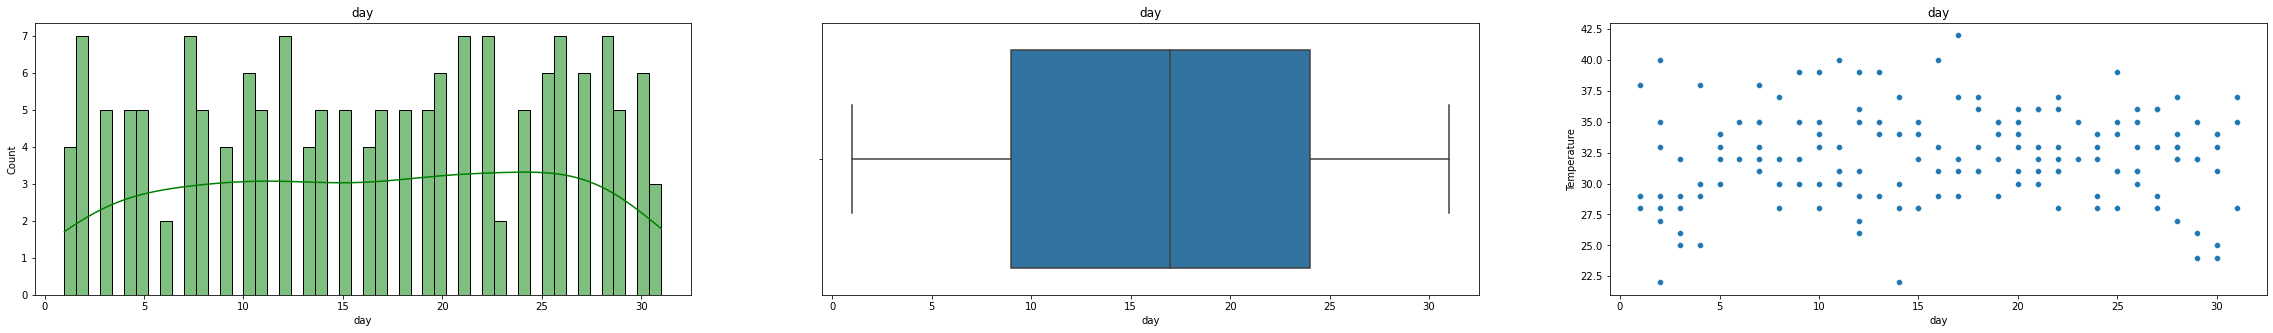

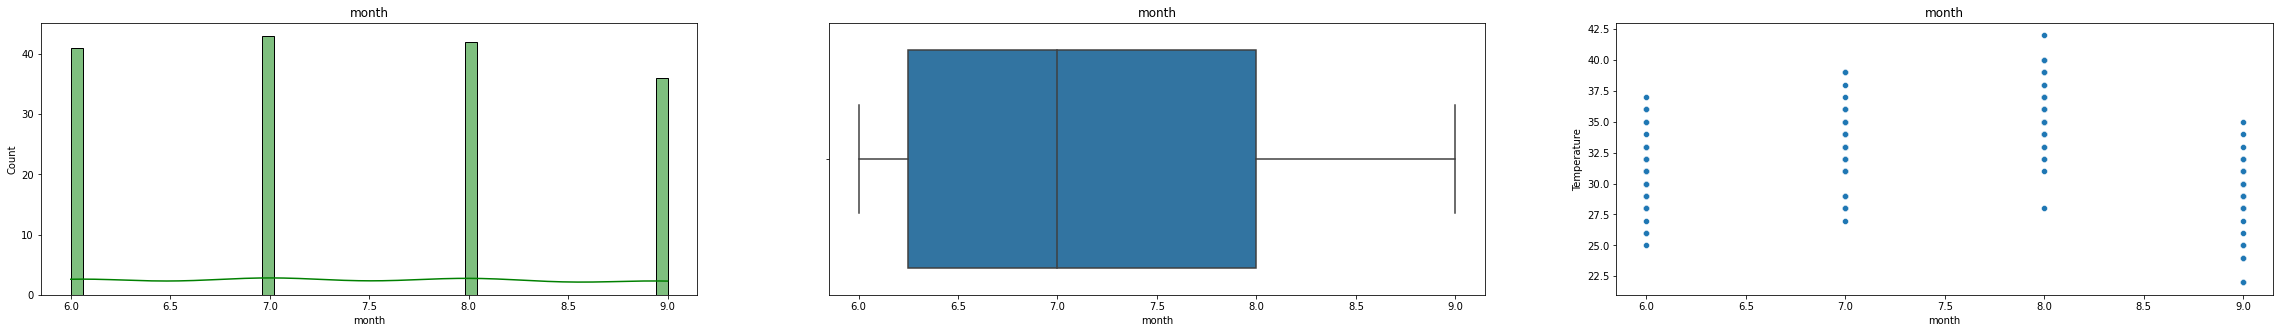

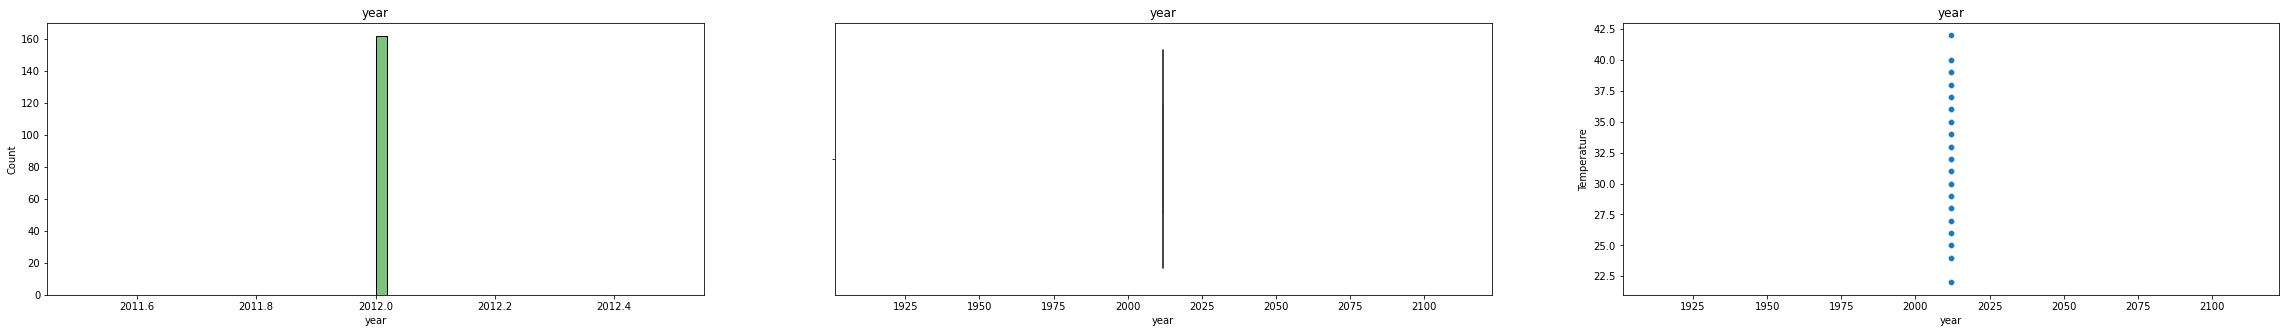

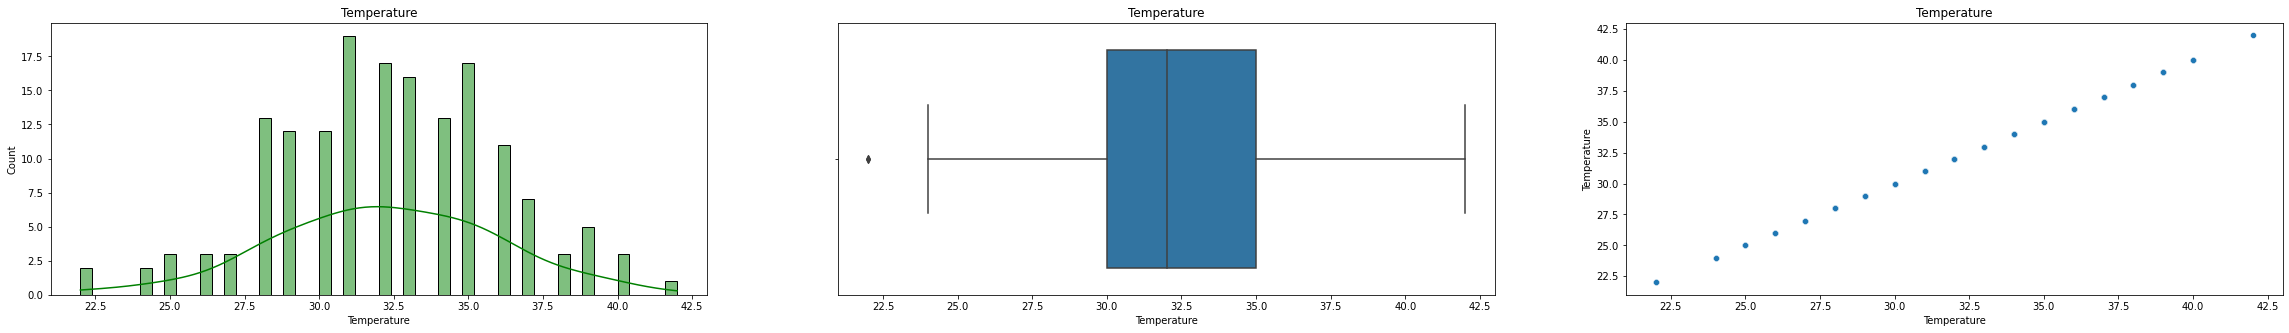

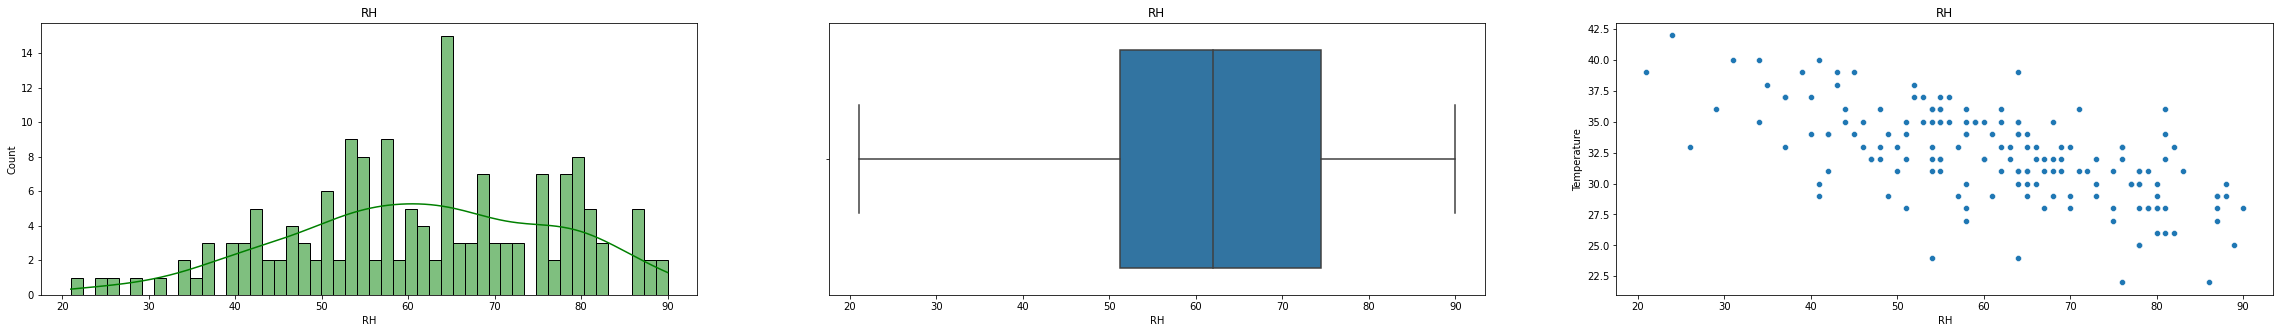

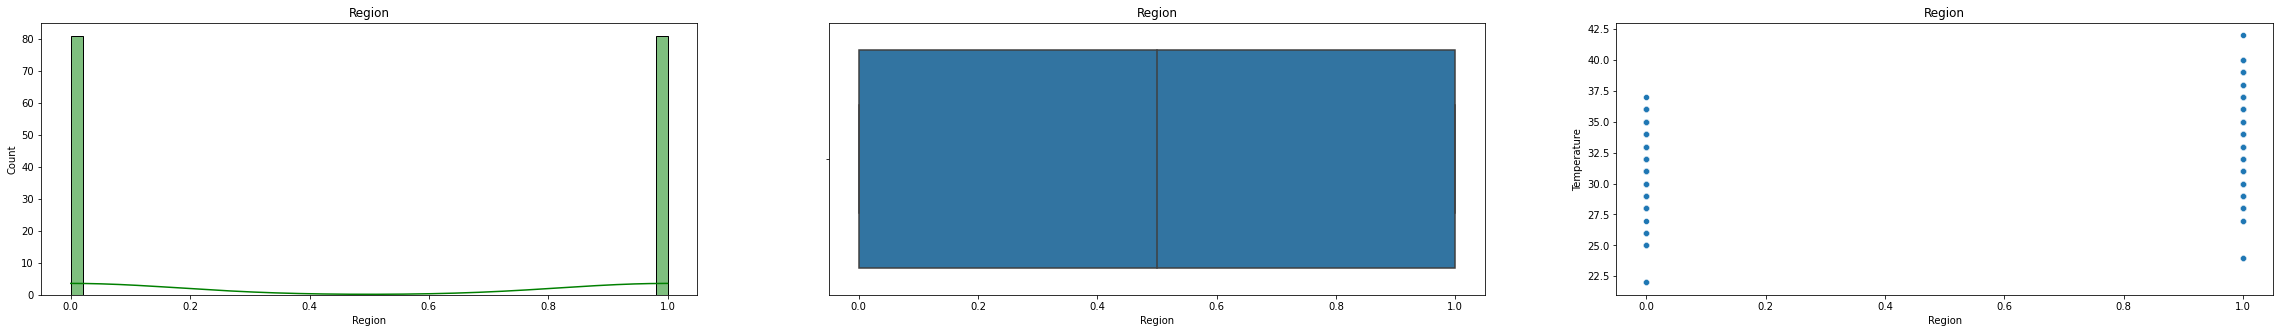

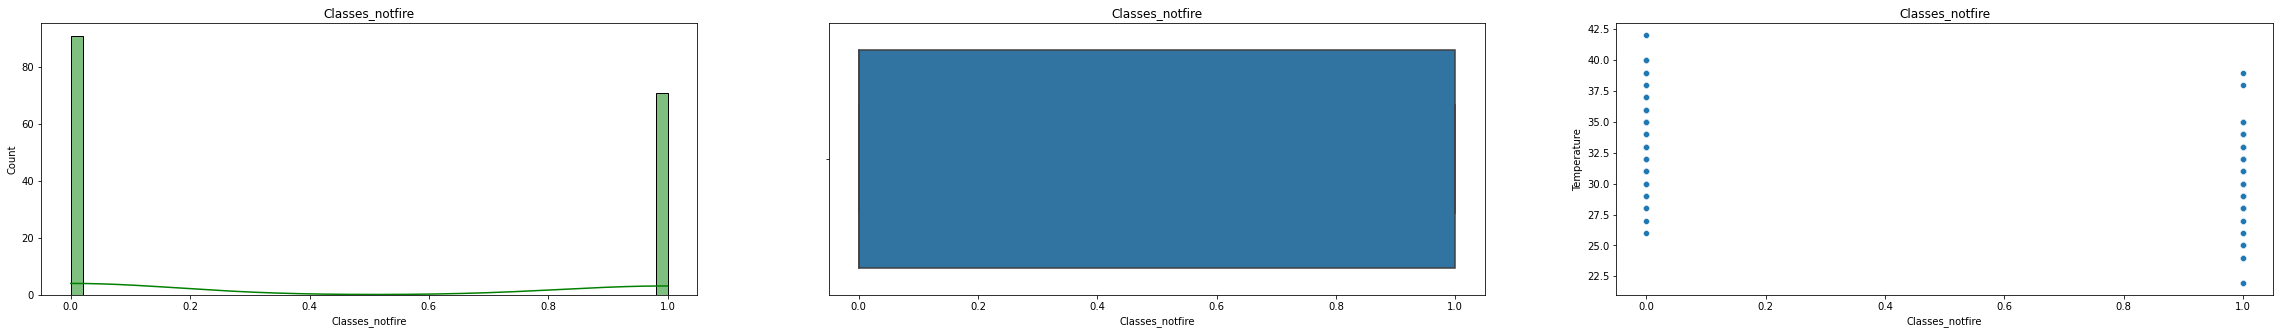

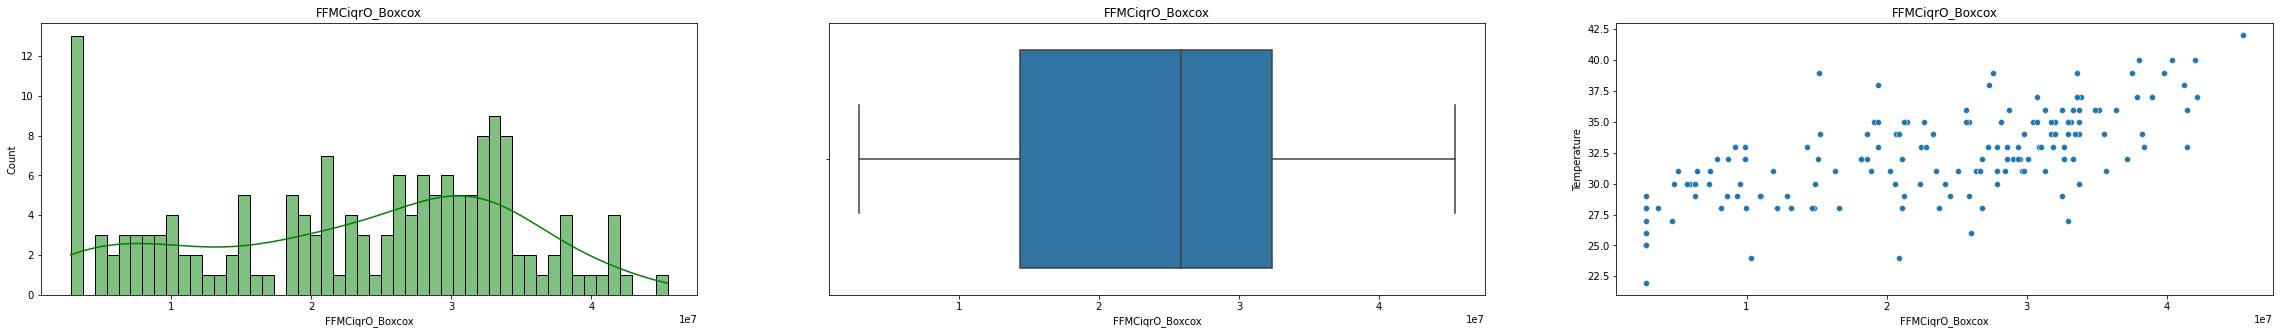

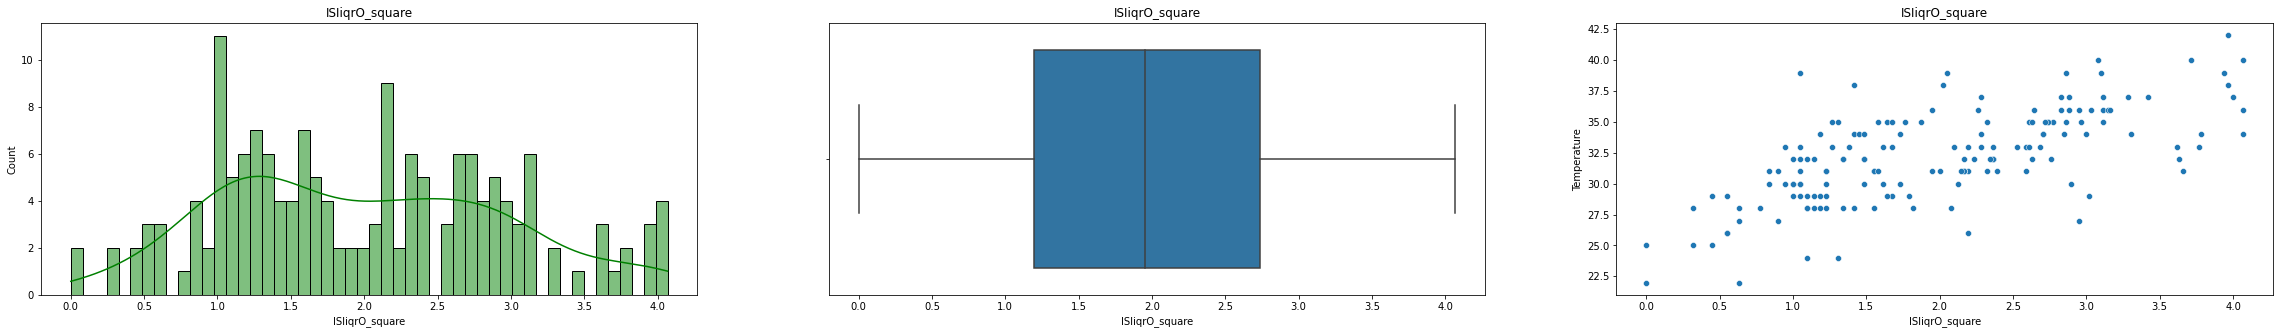

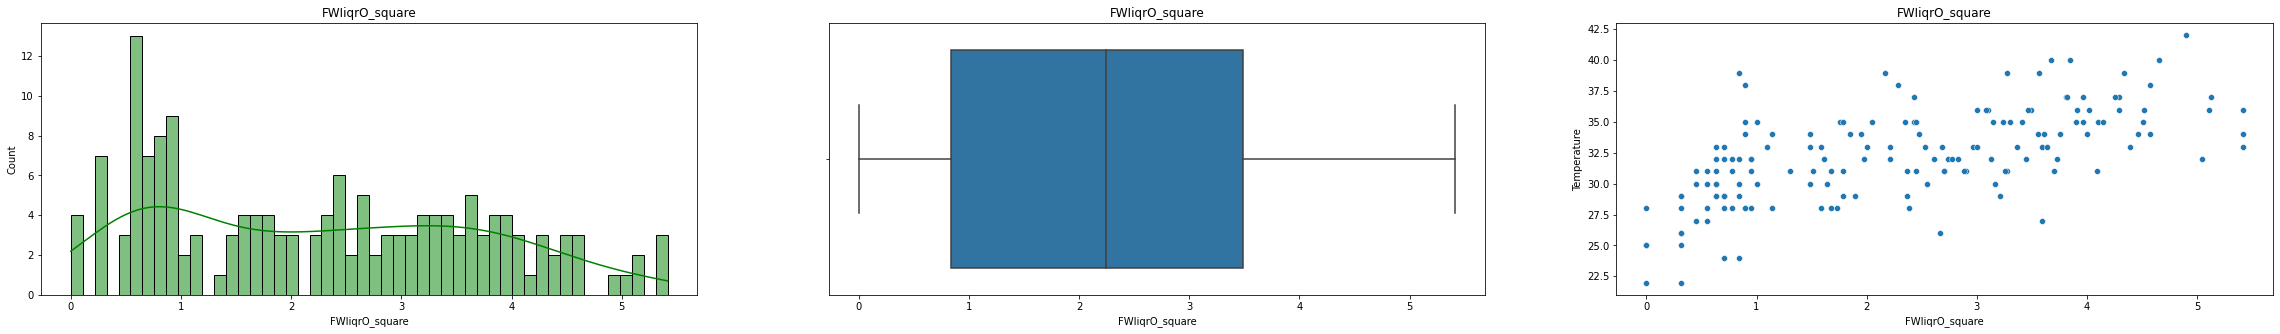

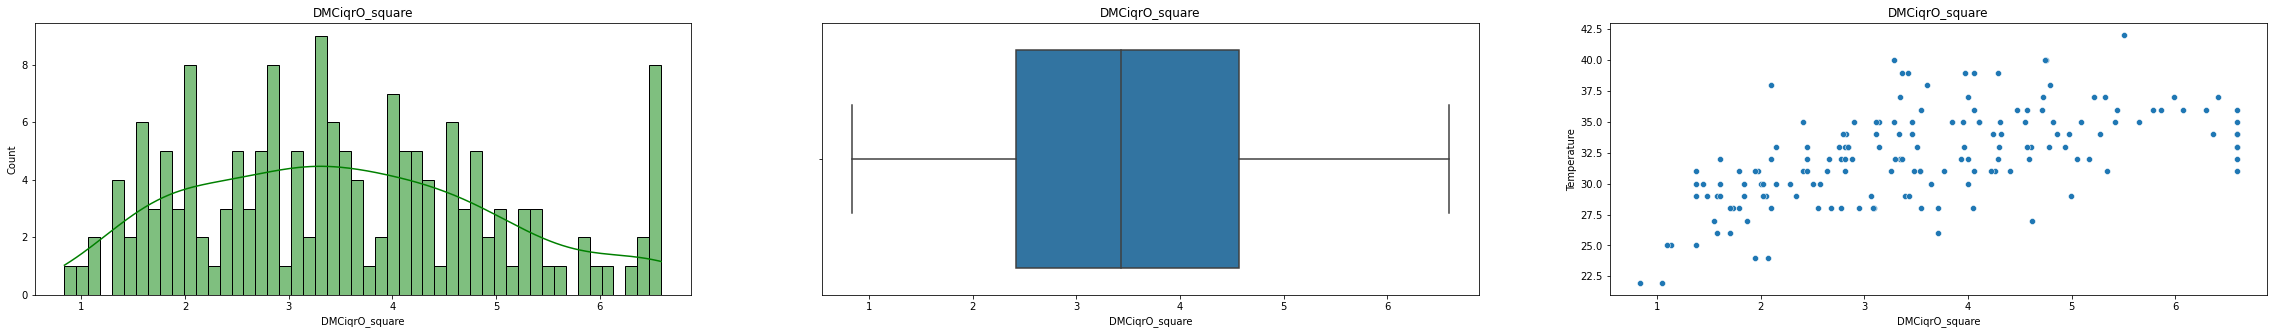

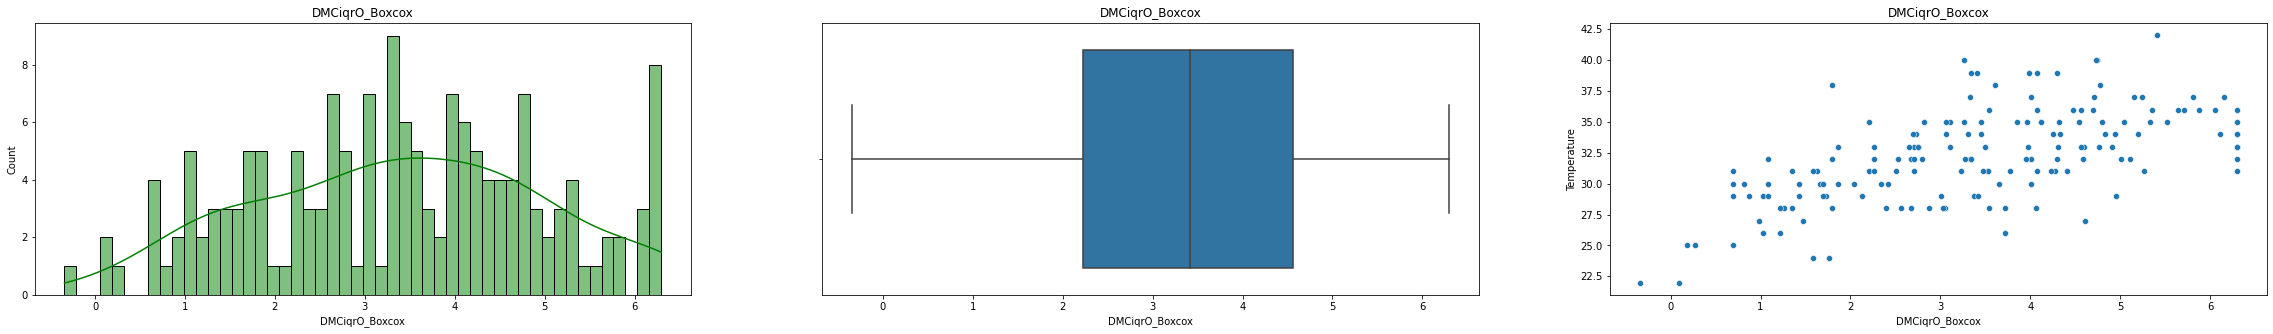

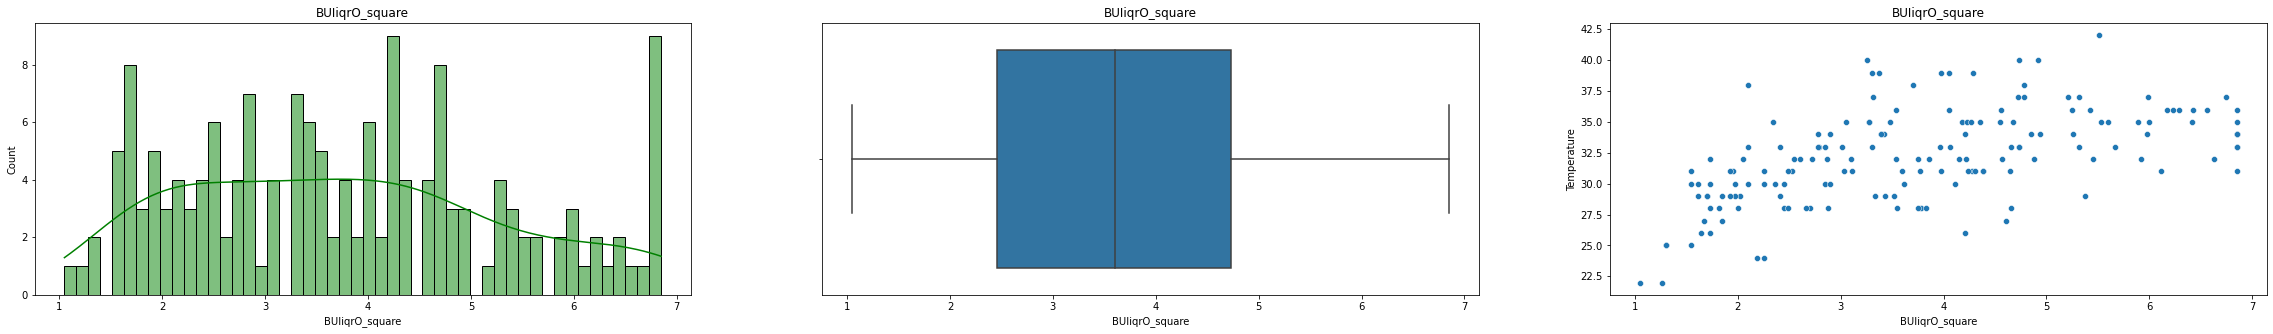

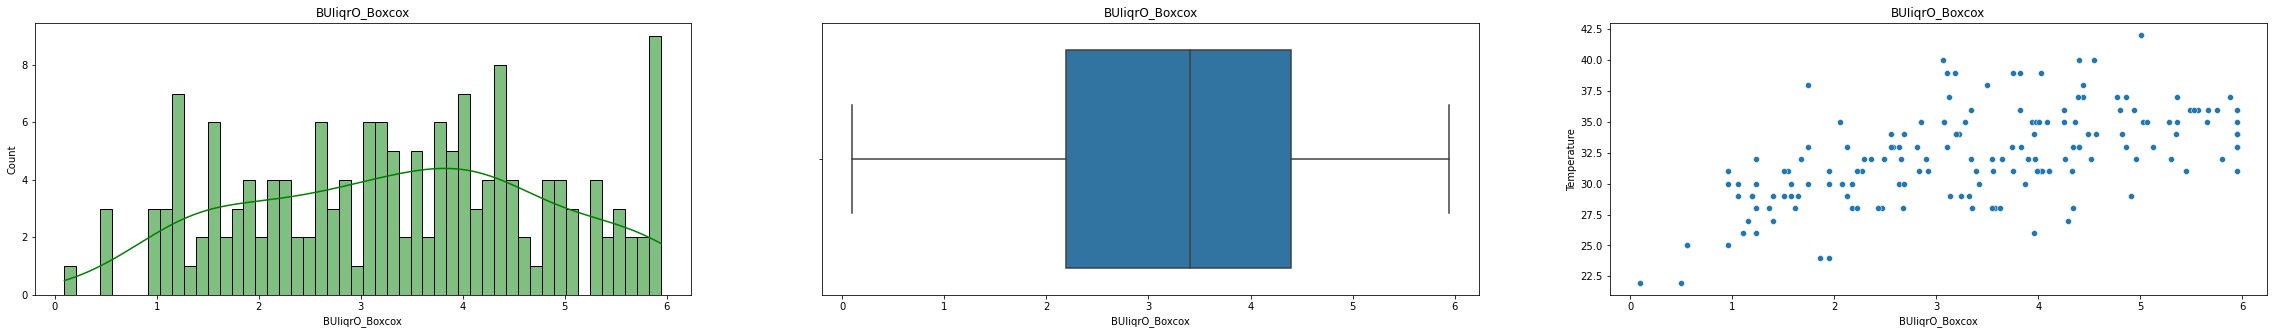

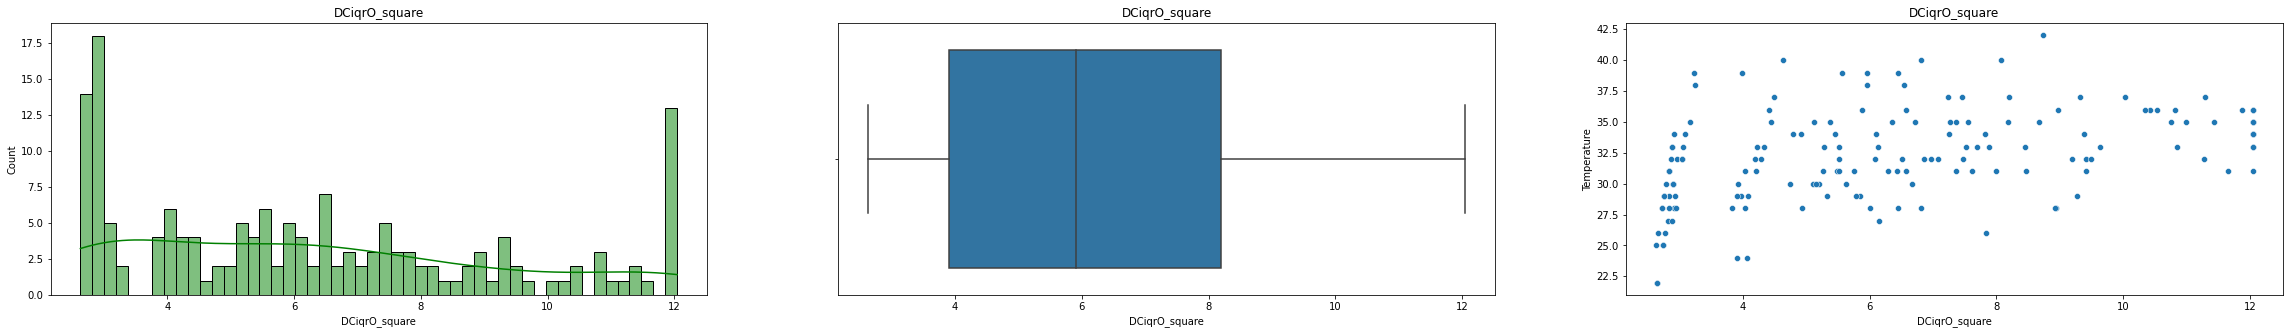

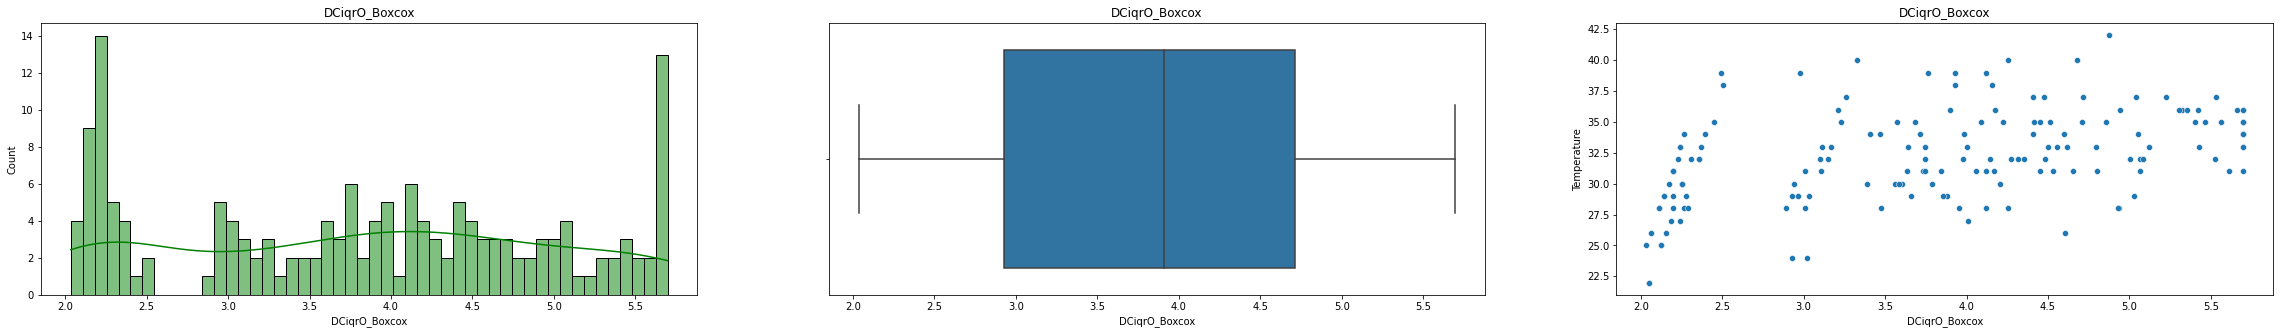

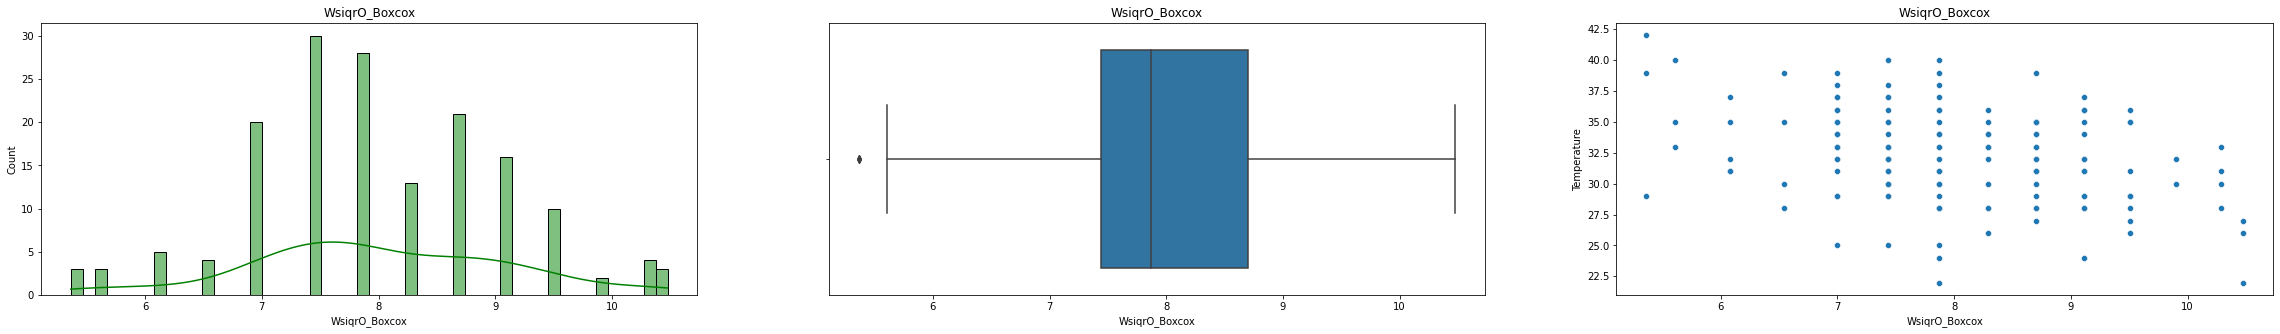

In [1117]:
for col in data.columns:
    create_comparison_plot(df = data,col1= col)

In [1118]:
data.month.unique()

array([7, 6, 9, 8], dtype=int64)

In [1119]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in data.columns:
    dataToTest = data[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[data.columns, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

Column Name Shapiro Hypothesis Result
0               day  Not Normally Distributed
1             month  Not Normally Distributed
2              year      Normally Distributed
3       Temperature      Normally Distributed
4                RH  Not Normally Distributed
5            Region  Not Normally Distributed
6   Classes_notfire  Not Normally Distributed
7   FFMCiqrO_Boxcox  Not Normally Distributed
8    ISIiqrO_square  Not Normally Distributed
9    FWIiqrO_square  Not Normally Distributed
10   DMCiqrO_square  Not Normally Distributed
11   DMCiqrO_Boxcox  Not Normally Distributed
12   BUIiqrO_square  Not Normally Distributed
13   BUIiqrO_Boxcox  Not Normally Distributed
14    DCiqrO_square  Not Normally Distributed
15    DCiqrO_Boxcox  Not Normally Distributed
16    WsiqrO_Boxcox  Not Normally Distributed

In [1120]:
from scipy.stats import normaltest
normaltest_test = []
for column in data.columns:
    dataToTest = data[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[data.columns, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

Column Name normaltest Hypothesis Result
0               day     Not Normally Distributed
1             month     Not Normally Distributed
2              year     Not Normally Distributed
3       Temperature         Normally Distributed
4                RH         Normally Distributed
5            Region     Not Normally Distributed
6   Classes_notfire     Not Normally Distributed
7   FFMCiqrO_Boxcox     Not Normally Distributed
8    ISIiqrO_square     Not Normally Distributed
9    FWIiqrO_square     Not Normally Distributed
10   DMCiqrO_square     Not Normally Distributed
11   DMCiqrO_Boxcox     Not Normally Distributed
12   BUIiqrO_square     Not Normally Distributed
13   BUIiqrO_Boxcox     Not Normally Distributed
14    DCiqrO_square     Not Normally Distributed
15    DCiqrO_Boxcox     Not Normally Distributed
16    WsiqrO_Boxcox         Normally Distributed

In [1121]:
# Saving dataset after handling outliers data
data.to_csv('prepared_tranformed_new_data_train.csv',index=False)